In [2]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# grab the nice dataset from sklearn
# Load data
#dataset = np.loadtxt('./chennai_reservoir_levels.csv', delimiter='|', skiprows=1, usecols=(1,2,3,4))
Geometry1 = pd.read_csv('VOF.csv',header=0, usecols=(3,7,8,9,10,11,14))
Geometry = pd.read_csv('VOF.csv',header=0).as_matrix(columns=['krms_ch',
                                                              'incx_ch','incz_ch','pro_ch','ESx_ch','ESz_ch',
                                                              'sk_ch','ku_ch'])

Ra_ch = pd.read_csv('VOF.csv',header=0).as_matrix(columns=['Ra_ch'])
Ra_ch = Ra_ch[:,0]
ks = pd.read_csv('VOF.csv',header=0).as_matrix(columns=['ks'])
ks = ks[:,0]
print(ks)


Geometry1["ks"]= np.divide(ks,Ra_ch)
Geometry1["krms_ch"]= np.divide(Geometry1["krms_ch"],Ra_ch)
#Geometry1["Flack"]=4.43*np.transpose(X[:,2]*(1+X[:,8])**1.37)
#print(np.shape(X))

Geometry1.rename({'krms_ch': '$k_{rms}/Ra$',
                  'pro_ch': '$por$',
                  'ESx_ch': '$ES_x$',
                  'ESz_ch': '$ES_z$',
                  'sk_ch': '$skw$',
                  'ku_ch': '$kur$',
                  'ks': '$k_s/Ra$',
                  'label': 'Label',
                  }, axis='columns', errors="raise",inplace = True)
print((Geometry1))
print(type(Geometry1))

[0.064 0.124 0.059 0.094 0.217 0.174 0.188 0.354 0.185 0.141 0.157 0.077
 0.26  0.247 0.102 0.132 0.089 0.212 0.177 0.123 0.065 0.071 0.112 0.064
 0.049 0.109 0.05  0.093 0.024 0.15  0.052 0.05  0.058 0.056 0.043 0.035
 0.053 0.034 0.065 0.2   0.16  0.18  0.245 0.435 0.23 ]
    $k_{rms}/Ra$   $por$  $ES_x$  $ES_z$   $skw$   $kur$ Label   $k_s/Ra$
0       1.128866  0.5971  0.5949  0.5900 -0.1671  1.6007   DNS   3.298969
1       1.093960  0.6535  0.9158  0.6427  0.1093  1.4355   DNS   4.161074
2       1.129534  0.5989  0.5876  0.5583 -0.0874  1.5898   DNS   3.056995
3       1.173684  0.7736  0.5114  0.5594  0.5600  2.2435   DNS   4.947368
4       1.173228  0.8191  0.8612  0.6044  0.8702  2.6269   DNS   8.543307
5       1.182320  0.7529  0.5168  0.4822  0.5141  2.2923   DNS   9.613260
6       1.177866  0.8351  0.4979  0.5784  0.9671  2.8736   DNS   7.430830
7       1.190736  0.8416  0.7579  0.5429  1.1501  3.1762   DNS   9.645777
8       1.184211  0.7837  0.5076  0.4713  0.7575  2.6415   

/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


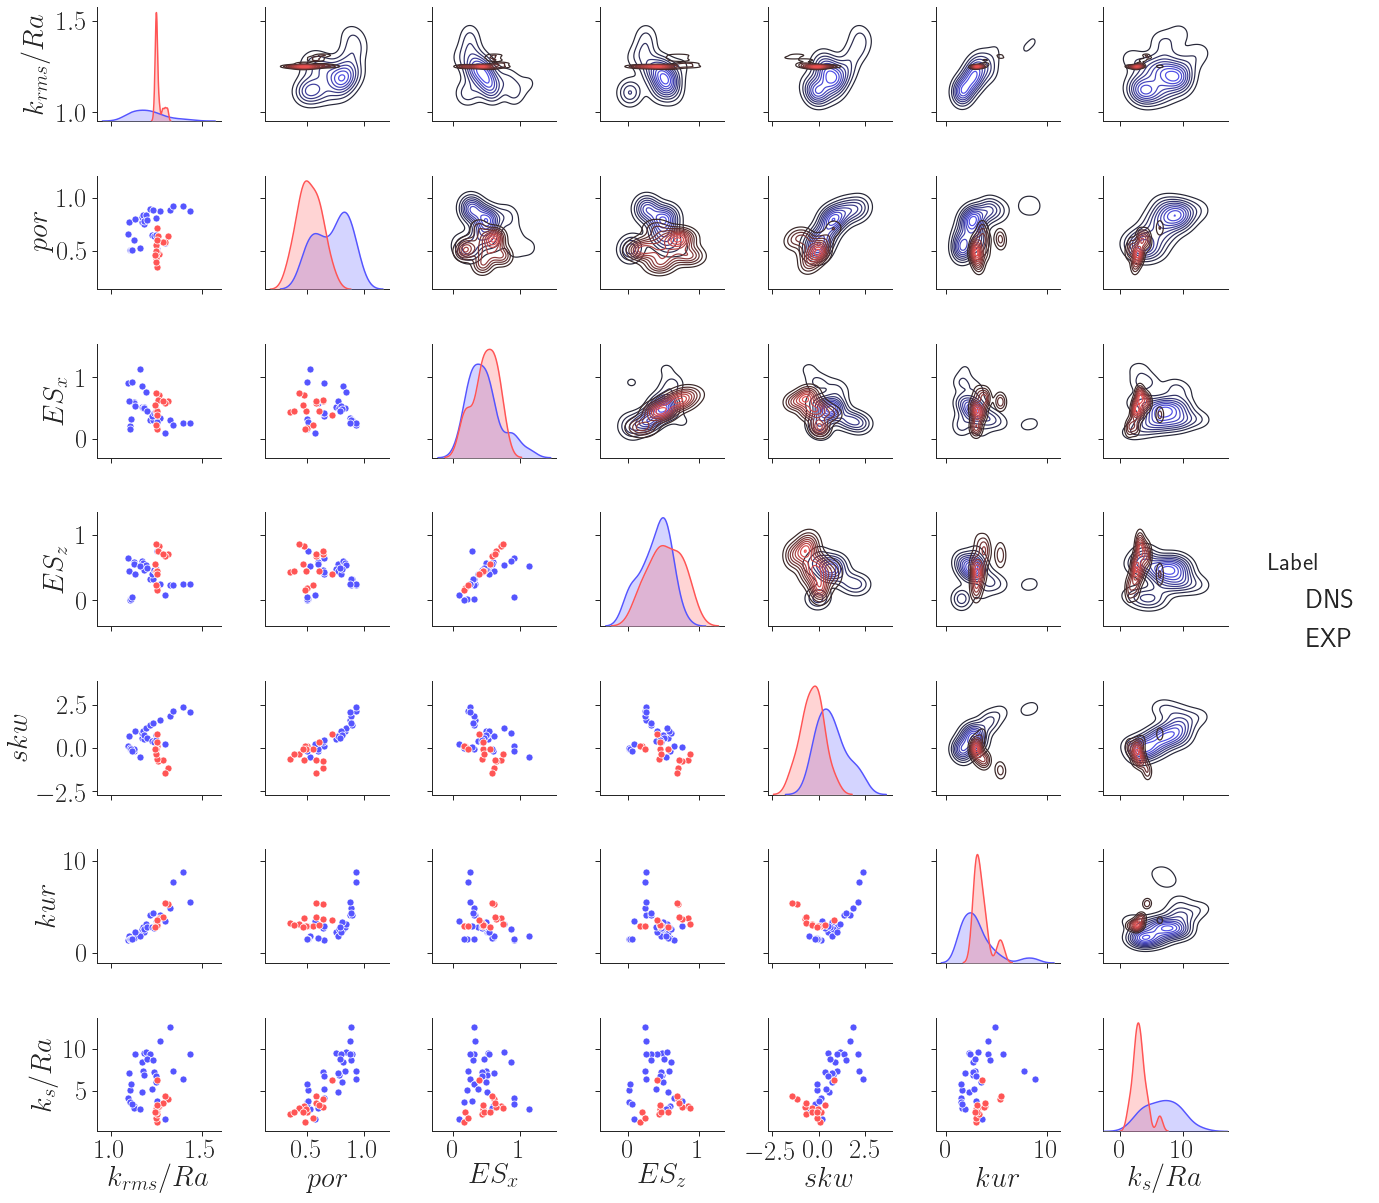

In [19]:


plt.rc('text', usetex=True)

sns.set(context='paper',
            style='ticks', 
            palette='deep',
            font='sans-serif', 
            font_scale=3, color_codes=True, rc=None)


g = sns.pairplot(Geometry1,diag_kind="kde",hue='Label', palette="seismic",
                 plot_kws=dict(s=70,facecolor="w", edgecolor="w", linewidth=1),
                 diag_kws=dict(linewidth=1.5))
g.map_upper(sns.kdeplot
            #shade=True,color="m",n_levels=30,cmap="Purples_d",shade_lowest=False, shade=True,
           )
g.map_lower(sns.scatterplot, s=50,
            #size=Geometry1["ks"],sizes=(10, 200),
            #shade=True,color="m",n_levels=30,cmap="Purples_d"
           )

plt.savefig('pair.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



In [4]:
#'krms_ch','incx_ch','incz_ch','pro_ch','ESx_ch','ESz_ch','sk_ch','ku_ch'




# separate the features and the labels
X = Geometry
y = np.divide(ks,Ra_ch)

y_Flack=2.91*np.transpose(X[:,0]*(2.+X[:,6])**-.284)
print(100*(y_Flack-ks)/ks)



X[:,0] = np.divide(X[:,0],Ra_ch)
X[:,2] = np.abs(X[:,2])
#X[:,7] = np.abs(X[:,7]-3.)


n,m = X.shape # for generality
X0 = np.ones((n,1))
X1 = np.ones((n,1))
X2 = np.ones((n,1))
X3 = np.ones((n,1))
X4 = np.ones((n,1))
X5 = np.ones((n,1))
X6 = np.ones((n,1))
X7 = np.ones((n,1))
X8 = np.ones((n,1))
X9 = np.ones((n,1))


X1[:,0] = np.transpose(X[:,0]*X[:,4])
X2[:,0] = np.transpose(X[:,1]*X[:,4])
X3[:,0] = np.transpose(X[:,2]*X[:,4])
X4[:,0] = np.transpose(X[:,3]*X[:,4])
X5[:,0] = np.transpose(X[:,5]*X[:,6])
X6[:,0] = np.transpose(X[:,6]*X[:,7])
X7[:,0] = np.transpose(X[:,6]*X[:,4])
X8[:,0] = np.transpose(X[:,7]*X[:,4])
X9[:,0] = np.transpose(X[:,0]*X[:,6])




X = np.hstack((X,X1))
X = np.hstack((X,X2))
X = np.hstack((X,X3))
X = np.hstack((X,X4))
X = np.hstack((X,X5))
X = np.hstack((X,X6))
X = np.hstack((X,X7))
X = np.hstack((X,X8))
X = np.hstack((X,X9))




print((X))
#my_stand_scaler_obj = StandardScaler()
#my_stand_scaler_obj.fit(X)





[-16.16493241 -38.10812899 -10.56320825 -47.13967265 -70.37881246
 -72.45461351 -66.1304783  -74.06734089 -62.85285796 -66.25025465
 -76.63733809   3.13486088 -74.56024682 -79.19010871 -55.60913412
 -73.5547704  -64.90376646 -69.93824857 -71.24181279 -58.76013186
 -48.36158915 -28.9971757  -54.72551545 -21.84837879 -47.06131419
 -61.33473161 -22.96777581 -58.63900935  78.33883394 -70.37298392
   6.21807246   3.28033458  -2.17379826   1.33635064  10.86662447
  -3.02810375  17.29429929 120.65773783  66.84498835   5.79169262
  47.43654269  24.13322787 -16.55750122 -56.80689416  19.80925703]
[[ 1.12886598e+00 -9.77900000e-01  1.61000000e-02  5.97100000e-01
   5.94900000e-01  5.90000000e-01 -1.67100000e-01  1.60070000e+00
   6.71562371e-01 -5.81752710e-01  9.57789000e-03  3.55214790e-01
  -9.85890000e-02 -2.67476970e-01 -9.94077900e-02  9.52256430e-01
  -1.88633505e-01]
 [ 1.09395973e+00  2.45000000e-02  6.42000000e-02  6.53500000e-01
   9.15800000e-01  6.42700000e-01  1.09300000e-01  1.435

In [4]:
n,m = X.shape # for generality
X0 = np.ones((n,1))
Xsta = np.hstack((X,X0))
yn=(np.linalg.pinv(Xsta).dot(y.T)).T.dot(Xsta.T)
print("Max err: %f" % max(100.*abs(yn-y)/(y)))

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)
yn=reg.predict(X)
print("Max err: %f" % max(100.*abs(yn-y)/(y)))






X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
n,m = X_train.shape # for generality
X0 = np.ones((n,1))
Xsta_train = np.hstack((X_train,X0))
n,m = X.shape # for generality
X0 = np.ones((n,1))
Xsta_test = np.hstack((X,X0))
yn=(np.linalg.pinv(Xsta_train).dot(y_train.T)).T.dot(Xsta_test.T)
print("Max err: %f" % max(100.*abs(yn-y)/(y)))

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y)
yn=reg.predict(X)
print("Max err: %f" % max(100.*abs(yn-y)/(y)))




Max err: 70.743919
Max err: 70.743919
Max err: 91.352951
Max err: 91.352951


/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


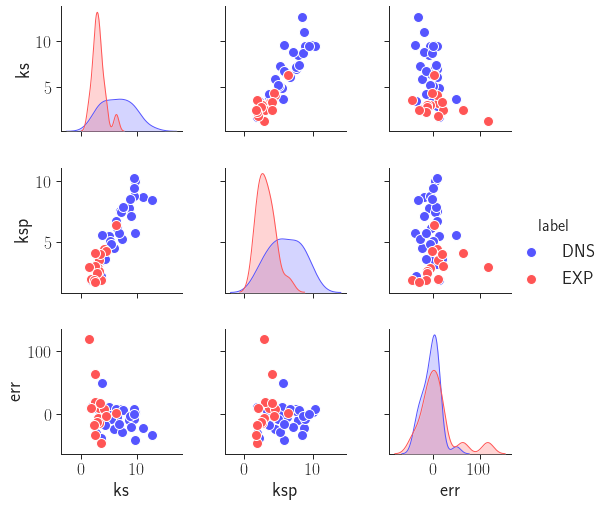

In [95]:
Error=pd.DataFrame()
Error["ks"]= y
Error["ksp"]= yn
Error["err"]= (100.*(yn-y)/(y))
Error["label"]= Geometry1["Label"]
g = sns.pairplot(Error,diag_kind="kde",hue='label', palette="seismic",
                 plot_kws=dict(s=100, linewidth=1),
                 diag_kws=dict(linewidth=1))


plt.savefig('pair_error_lin.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



In [140]:
from sklearn.svm import SVR


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svr = SVR(kernel='rbf', degree=3, gamma='scale', 
          coef0=0.0, tol=0.0001, C=100.0, 
          epsilon=.1)
svr.fit(X_train, y_train)
svr.score(X, y)




yn=svr.predict(X)
print("Max err: %f" % max(100.*abs(yn-y)/(y)))
print((100.*(yn-y)/(y)))



Max err: 67.883411
[16.1585077  11.01144226  2.40295901  3.09603195 19.57513007  2.8526913
 41.00031784  1.34662148  1.03668698  1.43830824  5.16479907  0.91066984
  3.40274845 13.55151074  8.41017664  8.13393949  1.05285185  1.34870744
 30.0978766   1.14136511  1.54424407 54.22667272 35.35064566 56.33719728
 12.39441297 14.552728   36.43050226 28.75913078 24.4928157  22.18658667
  5.91763272  1.06049976  3.09633139  2.71471391  2.43091404 10.12674959
  1.19718078 14.2547573   3.98167866 67.88341074  5.53732483  3.5117134
 15.9589539  19.80884548 29.21134966  2.66331444 35.18111119]


/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


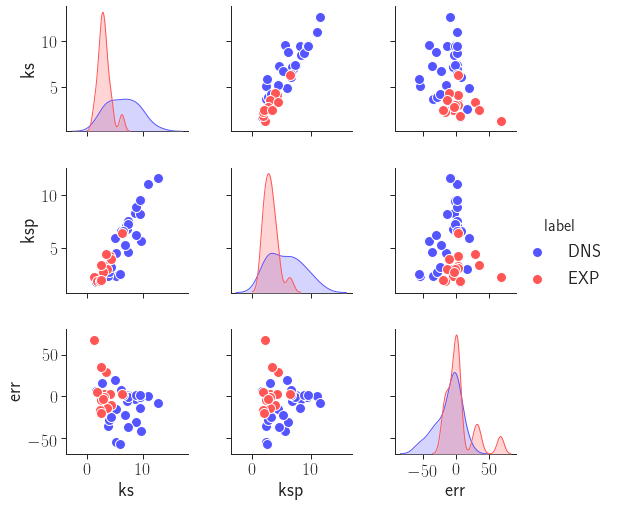

In [141]:
Error=pd.DataFrame()
Error["ks"]= y
Error["ksp"]= yn
Error["err"]= (100.*(yn-y)/(y))
Error["label"]= Geometry1["Label"]
g = sns.pairplot(Error,diag_kind="kde",hue='label', palette="seismic",
                 plot_kws=dict(s=100, linewidth=1),
                 diag_kws=dict(linewidth=1))


plt.savefig('pair_error_svg.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



In [272]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, ExpSineSquared,DotProduct

while max(100.*abs(yn-y)/(y))>40:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # Instantiate a Gaussian Process Regression model: note hyperparameters
    kernel1 = RBF(10, (1e-3, 1e2))
    kernel2 = RBF(5, (1e-3, 1e2))
    kernel3 = RationalQuadratic(length_scale=1.0, alpha=0.1)
    kernel4 = Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=4.5)
    kernel5 = ExpSineSquared(length_scale=2.0, 
                        periodicity=3.0, 
                        length_scale_bounds=(1e-05, 100000.0), 
                        periodicity_bounds=(1e-05, 100000.0))
    kernel6 = DotProduct()
    gpr = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=1000)
    gpr = GaussianProcessRegressor(kernel=kernel3, n_restarts_optimizer=1000,alpha=.1)
    # Fit to data
    gpr.fit(X_train, y_train)
    # Make the prediction on the finer grid as well, includin
    # getting information on the confidence intervals. 
    yn, sigma = gpr.predict(X, return_std=True)
    print("Max err: %f" % max(100.*abs(yn-y)/(y)))
    
print((100.*(yn-y)/(y)))


Max err: 55.624452
Max err: 58.808926
Max err: 138.702723
Max err: 36.105938
[ 7.84973271  4.06351216  0.54205878  8.15055598 16.55257716  3.22848298
 36.10593823  0.88781408  3.95553111  2.08029663 11.50211047  3.61123653
  2.51769876 22.25453099  5.64717554 14.40944304  2.04049507  2.33635375
  7.58856967  2.33422399  1.98485505  1.26882467 35.66134876  7.77501218
  0.18728178  2.09022013 10.29706638 14.72023854  5.25820916  5.28206603
 24.2385534   2.89326343  3.12645221  1.73260189  0.25454871  1.53133421
 11.34117704  2.32286733 23.90464193 31.8000341  12.11861283  0.59327507
  8.39829033  8.51426489 18.44037705  3.34390899  9.66229577]


/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


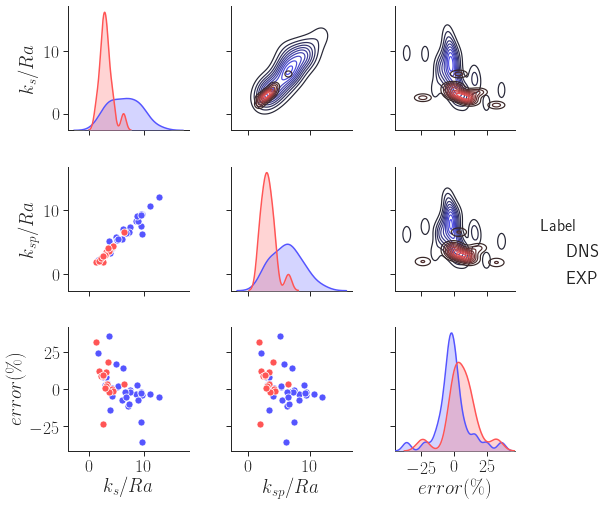

In [346]:
yn, sigma = gpr.predict(X, return_std=True)

Error=pd.DataFrame()
Error["$k_s/Ra$"]= y
Error["$k_{sp}/Ra$"]= yn
Error["$error(\%)$"]= (100.*(yn-y)/(y))
Error["Label"]= Geometry1["Label"]


plt.rc('text', usetex=True)

sns.set(context='paper',
            style='ticks', 
            palette='deep',
            font='sans-serif', 
            font_scale=2, color_codes=True, rc=None)

g = sns.pairplot(Error,diag_kind="kde",hue='Label', palette="seismic",
                 #height=1.5, 
                 aspect=1.,
                 plot_kws=dict(s=50,facecolor="w", edgecolor="w", linewidth=1.),
                 diag_kws=dict(linewidth=1.5,kernel='gau'))

g.map_upper(sns.kdeplot
            #shade=True,color="m",,cmap="Purples_d",shade_lowest=False, shade=True,n_levels=10
           )
g.map_lower(sns.scatterplot, s=50,legend='full'
            #size=abs(Error['err']),sizes=(20,200)
            #shade=True,color="m",n_levels=30,cmap="Purples_d"
           )





plt.savefig('pair_error_gpr.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


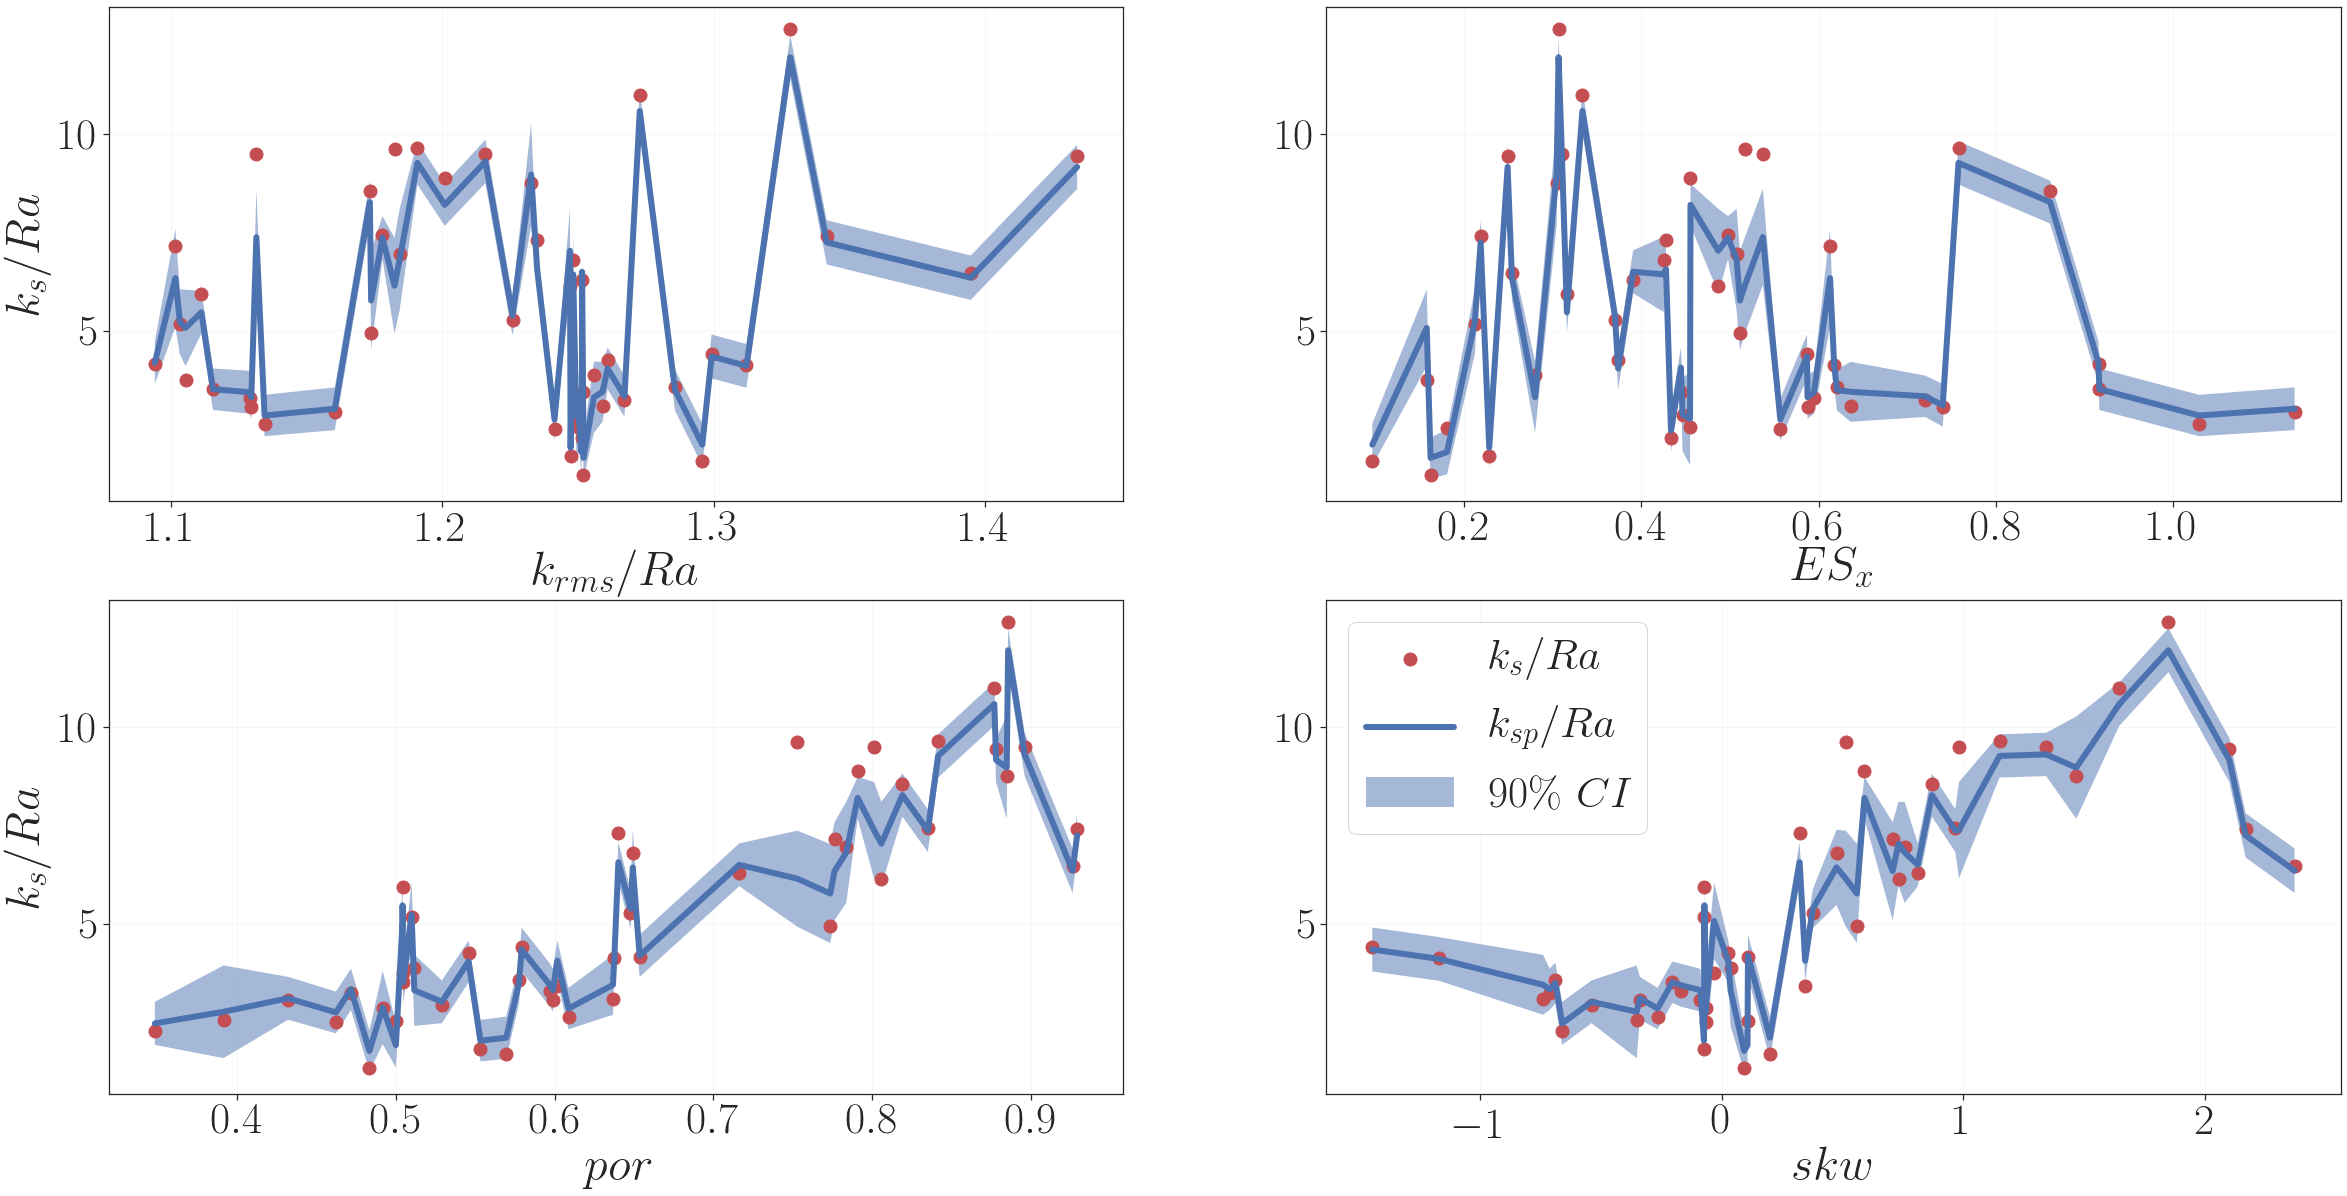

In [274]:
sns.set(context='notebook',
            style='ticks', 
            palette='seismic',
            font='sans-serif', 
            font_scale=4, color_codes=True, rc=None)
plt.rc('text', usetex=True)
fig = plt.figure(figsize=(40,20))

plt.subplot(221)
Xm=X[np.argsort(X[:,0])]
Xm=Xm[:,0]
ym=y[np.argsort(X[:,0])]
ymp=yn[np.argsort(X[:,0])]
sigmap=sigma[np.argsort(X[:,0])]
# Plot your function, the prediction and 95% confidence interval

plt.plot(Xm, ym, 'r.', markersize=26)
plt.plot(Xm, ymp, 'b-',linewidth=6)
plt.fill(np.concatenate([Xm, Xm[::-1]]),
         np.concatenate([ymp - 1.900 * sigmap,
                        (ymp + 1.900 * sigmap)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.xlabel('$k_{rms}/Ra$')
#plt.ylim(0, 8)
plt.ylabel('$k_s/Ra$')
plt.grid(alpha=0.15)
#plt.legend(loc='best')


plt.subplot(222)
Xm=X[np.argsort(X[:,4])]
Xm=Xm[:,4]
ym=y[np.argsort(X[:,4])]
ymp=yn[np.argsort(X[:,4])]
sigmap=sigma[np.argsort(X[:,4])]
# Plot your function, the prediction and 95% confidence interval

plt.plot(Xm, ym, 'r.', markersize=26)
plt.plot(Xm, ymp, 'b-',linewidth=6)
plt.fill(np.concatenate([Xm, Xm[::-1]]),
         np.concatenate([ymp - 1.900 * sigmap,
                        (ymp + 1.900 * sigmap)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.xlabel('$ES_x$')
#plt.ylim(0, 8)
#plt.ylabel('$k_s$')
plt.grid(alpha=0.15)
#plt.legend(loc='best')


plt.subplot(223)
Xm=X[np.argsort(X[:,3])]
Xm=Xm[:,3]
ym=y[np.argsort(X[:,3])]
ymp=yn[np.argsort(X[:,3])]
sigmap=sigma[np.argsort(X[:,3])]
# Plot your function, the prediction and 95% confidence interval

plt.plot(Xm, ym, 'r.', markersize=26)
plt.plot(Xm, ymp, 'b-',linewidth=6)
plt.fill(np.concatenate([Xm, Xm[::-1]]),
         np.concatenate([ymp - 1.900 * sigmap,
                        (ymp + 1.900 * sigmap)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.xlabel('$por$')
#plt.ylim(0, 8)
plt.ylabel('$k_s/Ra$')
plt.grid(alpha=0.15)
#plt.legend(loc='best')

plt.subplot(224)
Xm=X[np.argsort(X[:,6])]
Xm=Xm[:,6]
ym=y[np.argsort(X[:,6])]
ymp=yn[np.argsort(X[:,6])]
sigmap=sigma[np.argsort(X[:,6])]
# Plot your function, the prediction and 95% confidence interval

plt.plot(Xm, ym, 'r.', markersize=26, label='$k_s/Ra$')
plt.plot(Xm, ymp, 'b-', linewidth=6,label='$k_{sp}/Ra$')
plt.fill(np.concatenate([Xm, Xm[::-1]]),
         np.concatenate([ymp - 1.900 * sigmap,
                        (ymp + 1.900 * sigmap)[::-1]]),
         alpha=.5, fc='b', ec='None', label='$90\%$ $CI$')
plt.xlabel('$skw$')
#plt.ylim(0, 8)
#plt.ylabel('$k_s$')
plt.grid(alpha=0.15)
plt.legend(loc='best')


plt.savefig('gpr.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


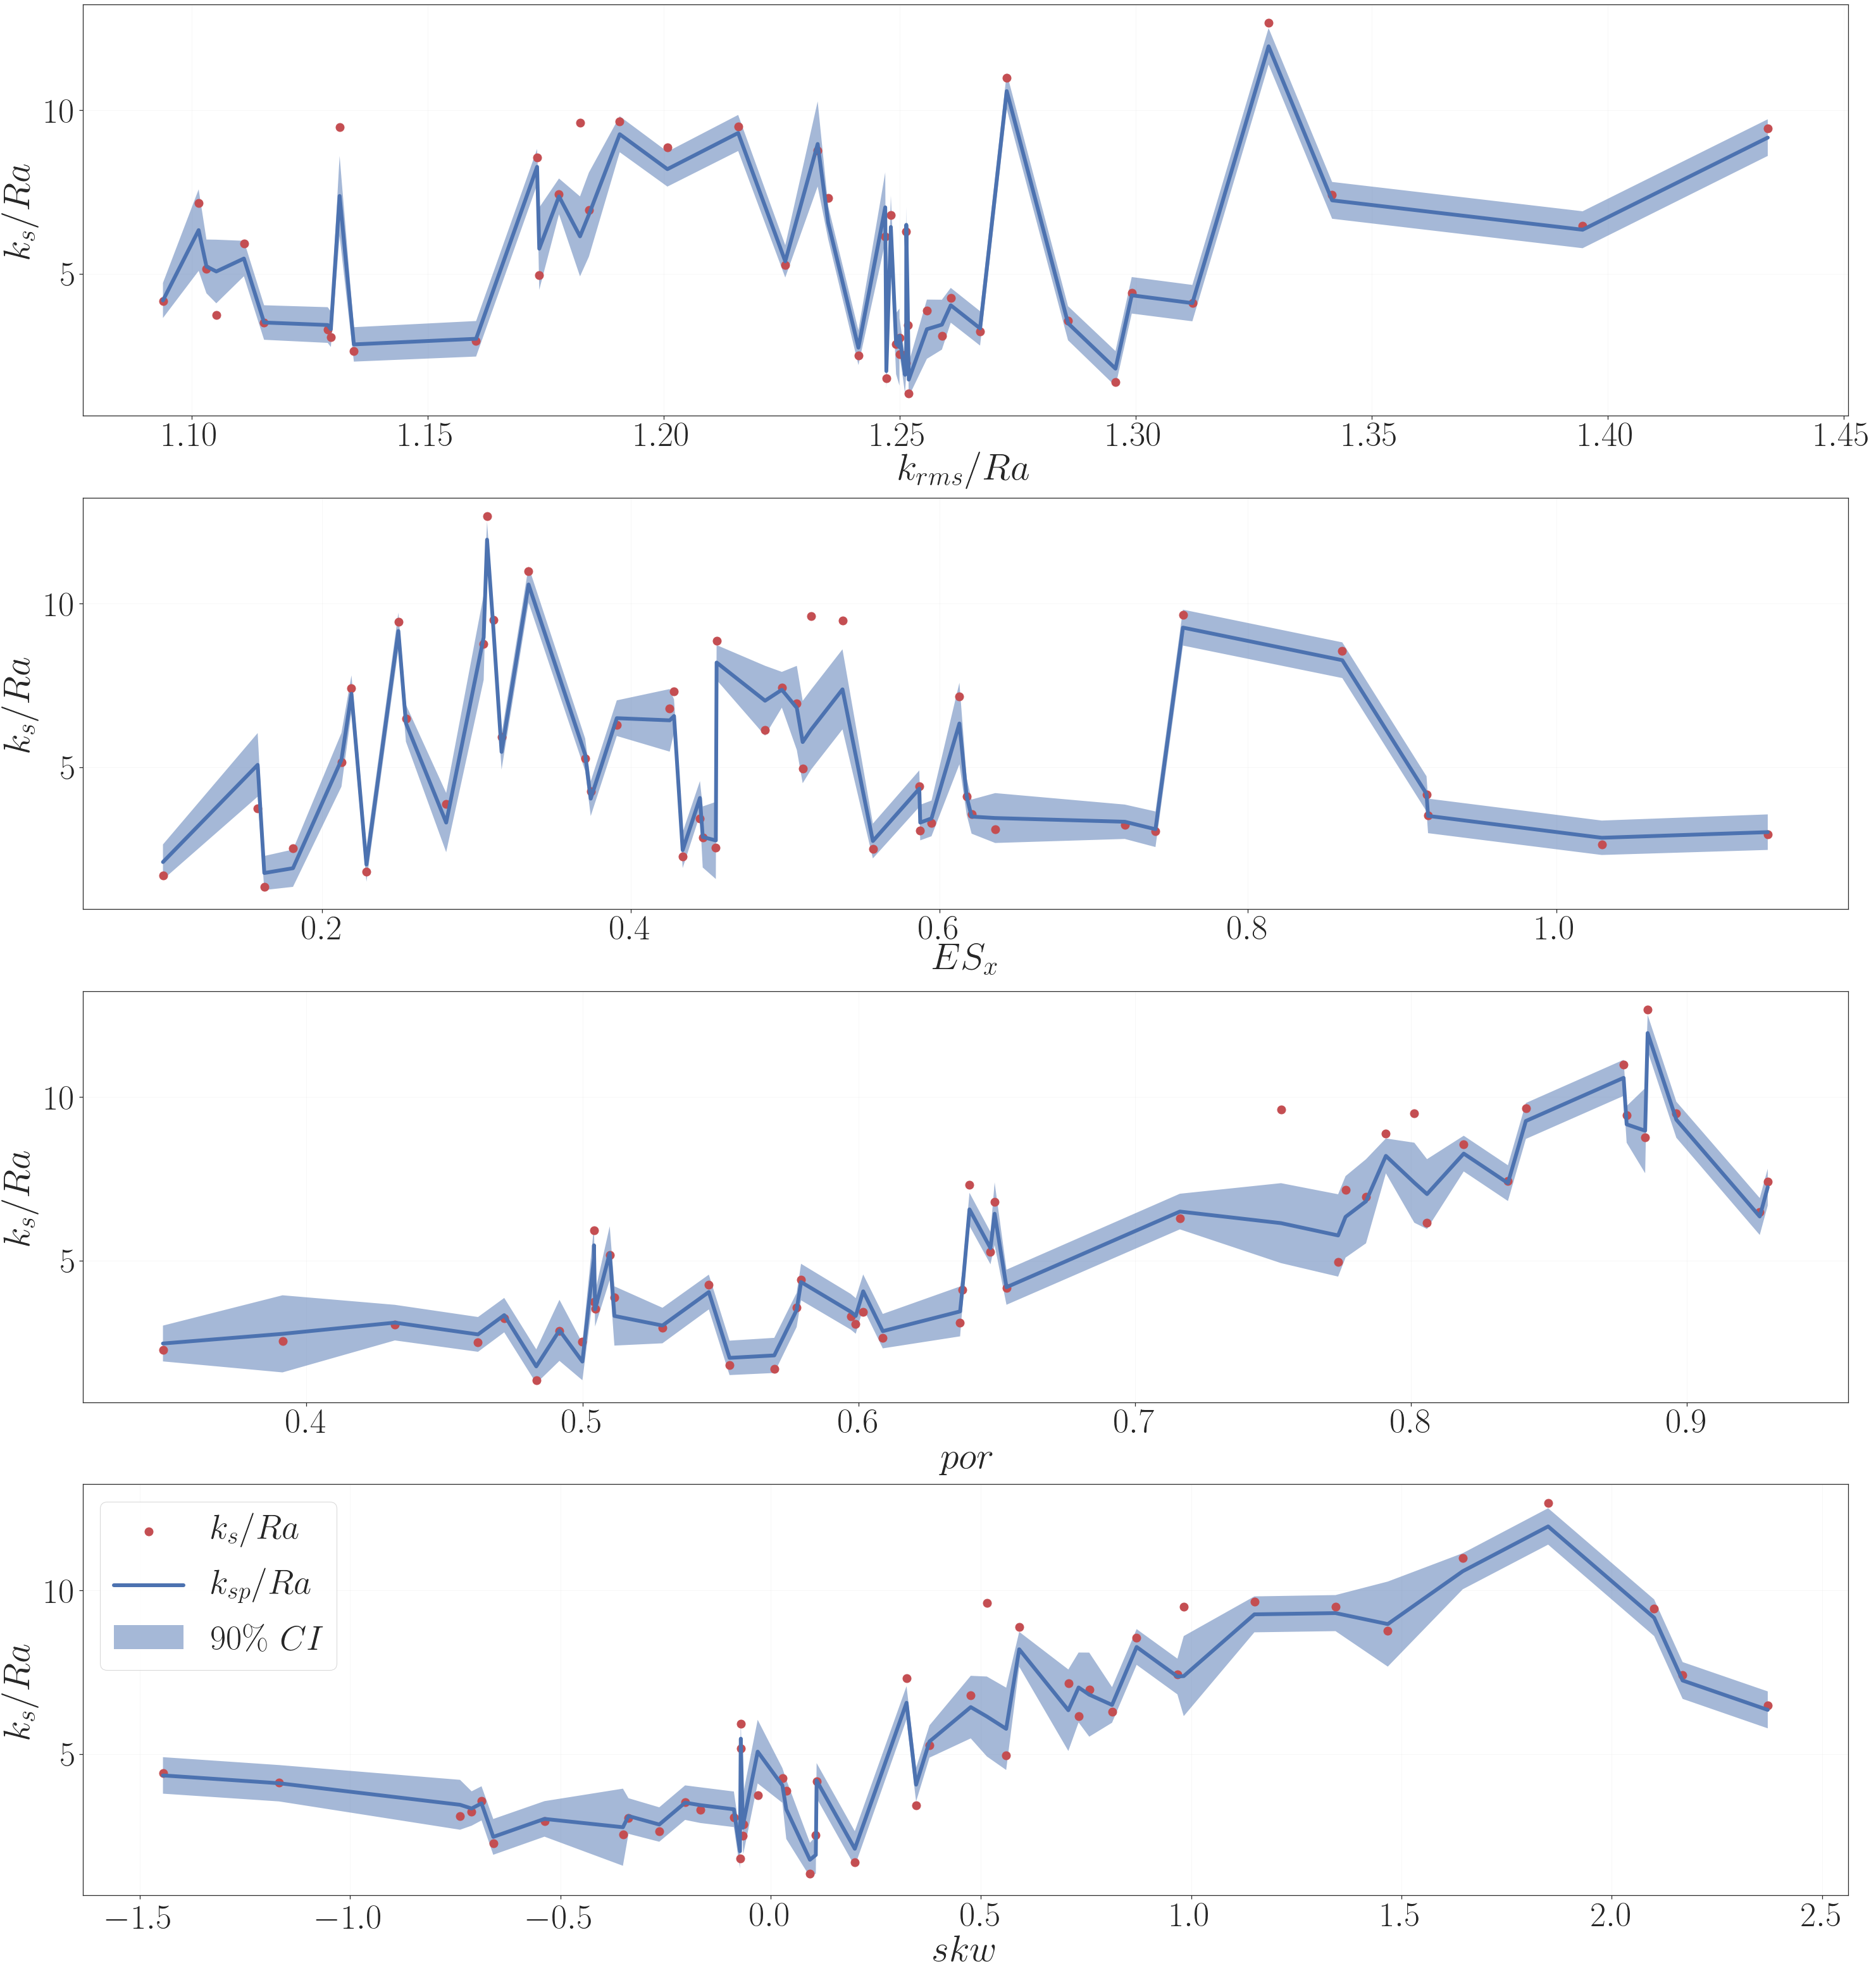

In [275]:
sns.set(context='notebook',
            style='ticks', 
            palette='seismic',
            font='sans-serif', 
            font_scale=5, color_codes=True, rc=None)
plt.rc('text', usetex=True)
fig = plt.figure(figsize=(50,55))

plt.subplot(411)
Xm=X[np.argsort(X[:,0])]
Xm=Xm[:,0]
ym=y[np.argsort(X[:,0])]
ymp=yn[np.argsort(X[:,0])]
sigmap=sigma[np.argsort(X[:,0])]
# Plot your function, the prediction and 95% confidence interval

plt.plot(Xm, ym, 'r.', markersize=26)
plt.plot(Xm, ymp, 'b-',linewidth=6)
plt.fill(np.concatenate([Xm, Xm[::-1]]),
         np.concatenate([ymp - 1.900 * sigmap,
                        (ymp + 1.900 * sigmap)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.xlabel('$k_{rms}/Ra$')
#plt.ylim(0, 8)
plt.ylabel('$k_s/Ra$')
plt.grid(alpha=0.15)
#plt.legend(loc='best')


plt.subplot(412)
Xm=X[np.argsort(X[:,4])]
Xm=Xm[:,4]
ym=y[np.argsort(X[:,4])]
ymp=yn[np.argsort(X[:,4])]
sigmap=sigma[np.argsort(X[:,4])]
# Plot your function, the prediction and 95% confidence interval

plt.plot(Xm, ym, 'r.', markersize=26)
plt.plot(Xm, ymp, 'b-',linewidth=6)
plt.fill(np.concatenate([Xm, Xm[::-1]]),
         np.concatenate([ymp - 1.900 * sigmap,
                        (ymp + 1.900 * sigmap)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.xlabel('$ES_x$')
#plt.ylim(0, 8)
plt.ylabel('$k_s/Ra$')
plt.grid(alpha=0.15)
#plt.legend(loc='best')


plt.subplot(413)
Xm=X[np.argsort(X[:,3])]
Xm=Xm[:,3]
ym=y[np.argsort(X[:,3])]
ymp=yn[np.argsort(X[:,3])]
sigmap=sigma[np.argsort(X[:,3])]
# Plot your function, the prediction and 95% confidence interval

plt.plot(Xm, ym, 'r.', markersize=26)
plt.plot(Xm, ymp, 'b-',linewidth=6)
plt.fill(np.concatenate([Xm, Xm[::-1]]),
         np.concatenate([ymp - 1.900 * sigmap,
                        (ymp + 1.900 * sigmap)[::-1]]),
         alpha=.5, fc='b', ec='None')
plt.xlabel('$por$')
#plt.ylim(0, 8)
plt.ylabel('$k_s/Ra$')
plt.grid(alpha=0.15)
#plt.legend(loc='best')

plt.subplot(414)
Xm=X[np.argsort(X[:,6])]
Xm=Xm[:,6]
ym=y[np.argsort(X[:,6])]
ymp=yn[np.argsort(X[:,6])]
sigmap=sigma[np.argsort(X[:,6])]
# Plot your function, the prediction and 95% confidence interval

plt.plot(Xm, ym, 'r.', markersize=26, label='$k_s/Ra$')
plt.plot(Xm, ymp, 'b-', linewidth=6,label='$k_{sp}/Ra$')
plt.fill(np.concatenate([Xm, Xm[::-1]]),
         np.concatenate([ymp - 1.900 * sigmap,
                        (ymp + 1.900 * sigmap)[::-1]]),
         alpha=.5, fc='b', ec='None', label='$90\%$ $CI$')
plt.xlabel('$skw$')
#plt.ylim(0, 8)
plt.ylabel('$k_s/Ra$')
plt.grid(alpha=0.15)
plt.legend(loc='best')


plt.savefig('gpr2.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



In [5]:

print('X size = ', X.size)
print('X_train size = ', X_train.size)
print('X_test size = ', X_test.size)


from sklearn.neural_network import MLPRegressor
yn=0
for by1 in range(16,21):
    for by2 in range(14,16):
        for by3 in range(7,10):
            if max(100.*abs(yn-y)/(y))<25:
                break
            
            my_mlp_obj_1 = MLPRegressor(hidden_layer_sizes=(by1,by2,by3), max_iter=200000, alpha=1,
                    solver='lbfgs', verbose=0, tol=1e-5,activation = 'relu',
                    learning_rate_init=.001)
            by4=0.
            print("by1: %f" % by1)
            print("by2: %f" % by2)
            print("by3: %f" % by3)
            
            while max(100.*abs(yn-y)/(y))>25 and by4<1000.:
                by4=by4+1
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                my_mlp_obj_1.fit(X_train, y_train)
                yn=my_mlp_obj_1.predict((X))
                print("Max err: %f" % max(100.*abs(yn-y)/(y)))
    
    
print((100.*(yn-y)/(y)))



X size =  765
X_train size =  527
X_test size =  238
by1: 16.000000
by2: 14.000000
by3: 7.000000
Max err: 148.813870
Max err: 63.508968
Max err: 59.667571
Max err: 73.628029
Max err: 82.456484
Max err: 74.872206
Max err: 67.022052
Max err: 122.017827
Max err: 230.787589
Max err: 48.664260
Max err: 51.184403
Max err: 68.084545
Max err: 57.901687
Max err: 81.982850
Max err: 77.897128
Max err: 94.625322
Max err: 206.626603
Max err: 133.121592
Max err: 122.982429
Max err: 118.557121
Max err: 132.152579
Max err: 162.168357
Max err: 110.423277
Max err: 182.370149
Max err: 245.987631
Max err: 49.401110
Max err: 59.142158
Max err: 53.514172
Max err: 156.285675
Max err: 126.745206
Max err: 80.760919
Max err: 105.562052
Max err: 249.224486
Max err: 113.819053
Max err: 187.945206
Max err: 35.925957
Max err: 91.424248
Max err: 113.556995
Max err: 178.435420
Max err: 45.440111
Max err: 57.614597
Max err: 134.606918
Max err: 262.899296
Max err: 82.700855
Max err: 48.578745
Max err: 176.881667
Max er

Max err: 81.915469
Max err: 95.025063
Max err: 128.623799
Max err: 163.155553
Max err: 58.954356
Max err: 87.645917
Max err: 83.378347
Max err: 35.974947
Max err: 229.063383
Max err: 123.424556
Max err: 234.737187
Max err: 60.244691
Max err: 64.130037
Max err: 53.515462
Max err: 70.530285
Max err: 68.860011
Max err: 59.793327
Max err: 67.254562
Max err: 58.157452
Max err: 65.024619
Max err: 61.857471
Max err: 93.268855
Max err: 176.496181
Max err: 55.576792
Max err: 89.957564
Max err: 63.236779
Max err: 117.626314
Max err: 92.659812
Max err: 70.443180
Max err: 229.581514
Max err: 97.497537
Max err: 184.090762
Max err: 75.232667
Max err: 97.964229
Max err: 48.622362
Max err: 105.925455
Max err: 89.923932
Max err: 164.773202
Max err: 261.570793
Max err: 76.428797
Max err: 244.481505
Max err: 185.522564
Max err: 47.833329
Max err: 102.098577
Max err: 108.868611
Max err: 78.568449
Max err: 56.151556
Max err: 260.901011
Max err: 48.675660
Max err: 132.048664
Max err: 44.143392
Max err: 80.7

Max err: 69.122323
Max err: 57.357482
Max err: 107.133086
Max err: 96.983336
Max err: 47.922767
Max err: 86.409791
Max err: 88.632790
Max err: 98.376543
Max err: 90.217221
Max err: 56.149749
Max err: 68.151530
Max err: 38.788909
Max err: 189.165329
Max err: 146.651526
Max err: 129.334382
Max err: 134.724682
Max err: 90.017986
Max err: 69.250689
Max err: 141.703792
Max err: 90.805235
Max err: 188.498346
Max err: 137.818895
Max err: 77.061135
Max err: 84.806101
Max err: 67.388906
Max err: 47.843517
Max err: 91.671575
Max err: 76.106512
Max err: 79.011838
Max err: 76.326128
Max err: 133.076986
Max err: 62.378932
Max err: 62.915900
Max err: 27.720643
Max err: 218.029754
Max err: 74.548812
Max err: 61.058196
Max err: 58.840409
Max err: 47.235590
Max err: 97.611138
Max err: 61.397156
Max err: 175.379794
Max err: 50.010505
Max err: 81.616883
Max err: 91.209639
Max err: 44.969621
Max err: 47.463070
Max err: 44.473209
Max err: 62.506157
Max err: 78.555653
Max err: 45.994534
Max err: 33.543585
M

Max err: 217.994037
Max err: 80.082655
Max err: 117.483846
Max err: 51.252528
Max err: 52.275028
Max err: 64.447836
Max err: 70.031031
Max err: 55.655433
Max err: 123.074355
Max err: 83.757745
Max err: 80.518787
Max err: 65.558347
Max err: 134.740834
Max err: 55.402522
Max err: 125.661352
Max err: 48.300128
Max err: 224.463974
Max err: 47.936376
Max err: 52.338771
Max err: 76.086832
Max err: 51.740594
Max err: 82.830615
Max err: 49.782760
Max err: 66.958814
Max err: 85.594777
Max err: 183.893070
Max err: 83.536696
Max err: 74.842116
Max err: 152.994772
Max err: 113.005312
Max err: 185.363342
Max err: 51.160995
Max err: 49.907240
Max err: 114.500067
Max err: 40.056127
Max err: 49.573132
Max err: 124.852399
Max err: 96.505409
Max err: 39.847572
Max err: 89.820784
Max err: 37.763132
Max err: 49.208672
Max err: 67.549217
Max err: 60.575961
Max err: 47.948534
Max err: 76.022641
Max err: 72.629562
Max err: 89.540946
Max err: 70.695541
Max err: 181.454980
Max err: 250.038694
Max err: 87.66220

Max err: 65.298759
Max err: 80.466720
Max err: 139.188735
Max err: 53.016495
Max err: 69.721322
Max err: 49.679062
Max err: 107.338989
Max err: 50.825708
Max err: 54.780924
Max err: 64.720683
Max err: 129.062920
Max err: 68.776032
Max err: 66.122122
Max err: 151.387597
Max err: 120.966788
Max err: 68.125437
Max err: 97.517362
Max err: 72.525189
Max err: 126.900138
Max err: 58.675707
Max err: 90.180400
Max err: 56.364675
Max err: 92.754774
Max err: 69.033737
Max err: 217.212331
Max err: 80.421941
Max err: 165.135645
Max err: 79.256333
Max err: 151.947083
Max err: 77.562277
Max err: 69.670512
Max err: 51.695843
Max err: 57.501675
Max err: 57.469288
Max err: 216.295763
Max err: 93.774077
Max err: 59.351992
Max err: 72.700646
Max err: 173.890288
Max err: 204.291794
Max err: 103.248079
Max err: 194.744726
Max err: 75.597487
Max err: 76.038744
Max err: 46.581634
Max err: 48.262449
Max err: 148.043436
Max err: 120.120430
Max err: 123.866965
Max err: 113.530646
Max err: 109.679829
Max err: 133

Max err: 83.508456
Max err: 96.201569
Max err: 47.639013
Max err: 62.979305
Max err: 108.930757
Max err: 74.527551
Max err: 132.236147
Max err: 71.690993
Max err: 36.797683
Max err: 52.549064
Max err: 76.580495
Max err: 140.347120
Max err: 75.183654
Max err: 107.917188
Max err: 45.168347
Max err: 47.849217
Max err: 202.863446
Max err: 53.393683
Max err: 47.543429
Max err: 160.836125
Max err: 35.745740
Max err: 55.574349
Max err: 106.398717
Max err: 47.926813
Max err: 90.822335
Max err: 144.713863
Max err: 90.940399
Max err: 57.629268
Max err: 82.627452
Max err: 55.215823
Max err: 49.682129
Max err: 61.499498
Max err: 96.791564
Max err: 121.970004
Max err: 211.639991
Max err: 42.291183
Max err: 273.802419
Max err: 153.846949
Max err: 94.866930
Max err: 52.470867
Max err: 130.337564
Max err: 118.371388
Max err: 53.599767
Max err: 67.405468
Max err: 72.648244
Max err: 109.774010
Max err: 215.150801
Max err: 69.649408
Max err: 48.839488
Max err: 64.186905
Max err: 61.262453
Max err: 137.95

Max err: 50.017243
Max err: 127.168544
Max err: 153.206931
Max err: 50.539006
Max err: 205.828037
Max err: 78.542247
Max err: 94.708535
Max err: 68.653284
Max err: 120.170626
Max err: 68.374583
Max err: 131.932632
Max err: 228.315365
Max err: 109.761109
Max err: 199.484866
Max err: 57.840764
Max err: 118.624682
Max err: 48.735504
Max err: 67.999083
Max err: 179.999883
Max err: 188.025930
Max err: 70.133330
Max err: 51.324653
Max err: 68.323107
Max err: 83.722337
Max err: 247.261131
Max err: 121.938586
Max err: 81.627246
Max err: 118.239377
Max err: 61.032230
Max err: 102.579615
Max err: 147.558841
Max err: 112.371375
Max err: 70.292940
Max err: 114.099053
Max err: 74.351560
Max err: 40.738235
Max err: 50.510400
Max err: 49.473542
Max err: 134.231470
Max err: 125.373463
Max err: 46.443866
Max err: 64.340733
Max err: 52.039872
Max err: 43.970954
Max err: 61.689520
Max err: 89.660114
Max err: 77.725966
Max err: 99.762029
Max err: 155.412887
Max err: 48.886661
Max err: 79.317942
Max err: 1

Max err: 78.472378
Max err: 41.025909
Max err: 50.695688
Max err: 116.192291
Max err: 109.029241
Max err: 121.682564
Max err: 89.453159
Max err: 58.252673
Max err: 44.291815
Max err: 89.215905
Max err: 69.108291
Max err: 88.063666
Max err: 50.928568
Max err: 93.038220
Max err: 47.416756
Max err: 53.283217
Max err: 150.602077
Max err: 52.991921
Max err: 57.642461
Max err: 74.468296
Max err: 74.318107
Max err: 202.688434
Max err: 54.729455
Max err: 168.890893
Max err: 67.906146
Max err: 75.328998
Max err: 60.297367
Max err: 84.945054
Max err: 78.591980
Max err: 249.983728
Max err: 111.884263
Max err: 50.517720
Max err: 86.432418
Max err: 237.179236
Max err: 43.146430
Max err: 63.872175
Max err: 80.162236
Max err: 141.411507
Max err: 49.962267
Max err: 70.175723
Max err: 79.026382
by1: 16.000000
by2: 15.000000
by3: 7.000000
Max err: 118.667219
Max err: 207.939291
Max err: 61.895547
Max err: 132.597489
Max err: 95.442269
Max err: 51.710044
Max err: 40.194812
Max err: 61.345287
Max err: 60.

Max err: 148.661323
Max err: 118.689660
Max err: 143.915626
Max err: 88.942101
Max err: 115.256204
Max err: 44.196084
Max err: 157.909585
Max err: 58.235275
Max err: 49.819264
Max err: 73.398218
Max err: 154.714448
Max err: 217.003675
Max err: 96.880661
Max err: 241.902068
Max err: 152.655500
Max err: 61.540441
Max err: 117.718334
Max err: 87.675032
Max err: 74.519774
Max err: 101.332117
Max err: 90.934801
Max err: 61.085648
Max err: 48.687996
Max err: 67.897350
Max err: 98.791366
Max err: 100.855897
Max err: 102.075285
Max err: 84.350246
Max err: 93.868840
Max err: 60.111856
Max err: 159.235197
Max err: 51.193791
Max err: 55.181500
Max err: 101.717723
Max err: 68.064342
Max err: 135.919703
Max err: 74.832904
Max err: 148.236662
Max err: 40.046920
Max err: 62.532448
Max err: 77.556025
Max err: 67.463989
Max err: 126.078731
Max err: 82.212776
Max err: 91.619696
Max err: 49.088455
Max err: 81.767833
Max err: 73.783318
Max err: 54.018009
Max err: 49.378237
Max err: 77.320992
Max err: 144.

Max err: 71.921033
Max err: 56.548321
Max err: 52.178131
Max err: 69.746436
Max err: 65.017533
Max err: 71.510883
Max err: 72.057060
Max err: 58.529927
Max err: 85.737750
Max err: 88.798588
Max err: 143.063531
Max err: 86.747296
Max err: 40.228500
Max err: 86.188209
Max err: 89.937316
Max err: 85.664652
Max err: 43.368148
Max err: 50.829687
Max err: 86.386165
Max err: 51.793688
Max err: 323.615129
Max err: 191.316943
Max err: 51.009369
Max err: 42.918174
Max err: 55.834438
Max err: 232.082732
Max err: 81.164990
Max err: 117.303661
Max err: 203.522769
Max err: 205.616793
Max err: 89.807541
Max err: 184.503152
Max err: 75.196069
Max err: 158.788395
Max err: 192.077421
Max err: 33.523129
Max err: 159.359535
Max err: 60.296640
Max err: 81.868748
Max err: 230.078290
Max err: 75.218246
Max err: 178.047428
Max err: 66.600523
Max err: 59.091854
Max err: 191.039734
Max err: 80.734770
Max err: 104.089113
Max err: 88.119477
Max err: 60.700666
Max err: 78.610186
Max err: 115.216867
Max err: 77.523

Max err: 53.264093
Max err: 65.218118
Max err: 69.239738
Max err: 96.001438
Max err: 276.801808
Max err: 159.406018
Max err: 80.947906
Max err: 54.443731
Max err: 116.301426
Max err: 58.273301
Max err: 146.091698
Max err: 80.517660
Max err: 126.643396
Max err: 50.454725
Max err: 52.698558
Max err: 107.247758
Max err: 46.396594
Max err: 59.408460
Max err: 68.955032
Max err: 215.304539
Max err: 78.233265
Max err: 58.919270
Max err: 67.879542
Max err: 97.189925
Max err: 53.319040
Max err: 117.918138
Max err: 47.086559
Max err: 50.343270
Max err: 111.996687
Max err: 85.207883
Max err: 144.153001
Max err: 71.693280
Max err: 170.768543
Max err: 62.526244
Max err: 48.597431
Max err: 44.576971
Max err: 136.466867
Max err: 99.084974
Max err: 68.972863
Max err: 113.971142
Max err: 115.687439
Max err: 68.363222
Max err: 66.772705
Max err: 175.104067
Max err: 53.684801
Max err: 78.973162
Max err: 50.734344
Max err: 85.559588
Max err: 91.691654
Max err: 59.046217
Max err: 168.544583
Max err: 57.153

Max err: 75.995675
Max err: 85.874652
Max err: 72.009652
Max err: 127.715063
Max err: 43.805971
Max err: 106.551160
Max err: 68.279213
Max err: 146.800750
Max err: 140.031236
Max err: 71.539461
Max err: 64.158684
Max err: 47.443831
Max err: 74.761962
Max err: 89.766562
Max err: 55.040435
Max err: 118.925092
Max err: 75.955289
Max err: 105.796002
Max err: 103.494797
Max err: 235.575888
Max err: 58.217404
Max err: 97.452364
Max err: 80.075680
Max err: 140.914320
Max err: 79.119136
Max err: 166.877540
Max err: 56.385239
Max err: 182.173830
Max err: 102.515068
Max err: 219.718338
Max err: 92.774165
Max err: 52.148440
Max err: 72.345281
Max err: 120.564167
Max err: 82.249512
Max err: 53.200617
Max err: 74.654034
Max err: 67.944215
Max err: 65.500045
Max err: 91.909143
Max err: 202.944938
Max err: 75.045190
Max err: 54.779446
Max err: 44.904022
Max err: 49.872537
Max err: 89.731906
Max err: 98.717517
Max err: 70.593841
Max err: 47.158982
Max err: 71.322635
Max err: 124.121312
Max err: 80.573

Max err: 46.786939
Max err: 84.302009
Max err: 59.266237
Max err: 59.400969
Max err: 60.163240
Max err: 76.166727
Max err: 120.444600
Max err: 87.936583
Max err: 81.562715
Max err: 88.264542
Max err: 75.632434
Max err: 103.067216
Max err: 65.349376
Max err: 85.397219
Max err: 80.944178
Max err: 78.181044
Max err: 80.886497
Max err: 42.995163
Max err: 263.413521
Max err: 54.849294
Max err: 50.510470
Max err: 58.347932
Max err: 195.573536
Max err: 128.350356
Max err: 90.750329
Max err: 75.880771
Max err: 165.529780
Max err: 113.891203
Max err: 67.774890
Max err: 116.648122
Max err: 80.252253
Max err: 62.664155
Max err: 83.538250
Max err: 64.845396
Max err: 73.651461
Max err: 84.201713
Max err: 123.530796
Max err: 168.098168
Max err: 52.791055
Max err: 95.991693
Max err: 60.100939
Max err: 78.038051
Max err: 125.288341
Max err: 52.539062
Max err: 55.965025
Max err: 97.330840
Max err: 53.503226
Max err: 70.247784
Max err: 189.533462
Max err: 40.943623
Max err: 102.980491
Max err: 83.243919

Max err: 43.408057
Max err: 87.473294
Max err: 61.809888
Max err: 47.955030
Max err: 48.650029
Max err: 120.480379
Max err: 63.556063
Max err: 98.205305
Max err: 120.512493
Max err: 75.770033
Max err: 39.882903
Max err: 88.687684
Max err: 61.971287
Max err: 47.958682
Max err: 59.987393
Max err: 84.334363
Max err: 127.454865
Max err: 49.774364
Max err: 65.250335
Max err: 90.911778
Max err: 50.258424
Max err: 218.147520
Max err: 204.581836
Max err: 52.762488
Max err: 53.071252
Max err: 203.272151
Max err: 131.752781
Max err: 93.827129
Max err: 67.493287
Max err: 92.353663
Max err: 117.366399
Max err: 110.093678
Max err: 92.339772
Max err: 54.029415
Max err: 81.303238
Max err: 229.025199
Max err: 113.003329
Max err: 39.595991
Max err: 66.040791
Max err: 122.370536
Max err: 51.620301
Max err: 45.675144
Max err: 85.365733
Max err: 61.680556
Max err: 117.425235
Max err: 72.960387
Max err: 57.038835
Max err: 52.316405
Max err: 117.961553
Max err: 86.033383
Max err: 75.962618
Max err: 143.4120

Max err: 211.154104
Max err: 77.640496
Max err: 55.224454
Max err: 39.618197
Max err: 95.409529
Max err: 53.609933
Max err: 39.158365
Max err: 49.599125
Max err: 91.510363
Max err: 191.954160
Max err: 196.481749
Max err: 77.366269
Max err: 108.532534
Max err: 68.275039
Max err: 73.989168
Max err: 145.674062
Max err: 45.828767
Max err: 48.986565
Max err: 79.601316
Max err: 67.186031
Max err: 205.053550
Max err: 112.791477
Max err: 102.329491
Max err: 56.780292
Max err: 67.758683
Max err: 53.043037
Max err: 148.999910
Max err: 65.065834
Max err: 83.954711
Max err: 55.106778
Max err: 97.117660
Max err: 254.192311
Max err: 76.501937
Max err: 138.044481
Max err: 120.311199
Max err: 54.696044
Max err: 129.522830
Max err: 235.076250
Max err: 80.548914
Max err: 183.842198
Max err: 50.615522
Max err: 87.342339
Max err: 136.329823
Max err: 195.989628
Max err: 96.415833
Max err: 204.999907
Max err: 53.699880
Max err: 63.618205
Max err: 81.768511
Max err: 134.678205
Max err: 138.067794
Max err: 41

Max err: 99.109523
Max err: 59.778494
Max err: 73.550125
Max err: 47.358333
Max err: 87.840860
Max err: 162.832724
Max err: 74.596595
Max err: 61.967519
Max err: 105.099801
Max err: 298.973283
Max err: 44.495888
Max err: 64.336102
Max err: 51.355940
Max err: 199.825691
Max err: 91.152571
Max err: 58.897702
Max err: 79.359233
Max err: 49.004033
Max err: 202.988125
Max err: 175.450625
Max err: 41.324965
Max err: 149.413043
Max err: 43.478266
Max err: 97.052808
Max err: 130.270158
Max err: 97.420712
Max err: 52.961077
Max err: 76.870233
Max err: 159.880832
Max err: 213.049507
Max err: 60.891930
Max err: 60.257697
Max err: 57.469007
Max err: 98.314526
Max err: 93.932993
Max err: 52.015004
Max err: 48.886389
Max err: 70.321691
Max err: 63.789769
Max err: 66.657568
Max err: 56.618683
Max err: 91.683318
Max err: 94.414777
Max err: 70.347785
Max err: 62.592344
Max err: 112.497309
Max err: 101.521736
Max err: 56.141409
Max err: 74.772608
Max err: 50.490324
Max err: 146.300599
Max err: 92.742633

Max err: 46.367155
Max err: 57.115579
Max err: 143.796325
Max err: 79.821460
Max err: 66.906704
Max err: 97.593951
Max err: 77.745196
Max err: 42.660905
Max err: 78.735716
Max err: 77.572329
Max err: 60.289778
Max err: 61.670034
Max err: 125.912071
Max err: 59.186147
Max err: 59.008598
Max err: 168.371475
Max err: 50.192417
Max err: 100.691820
Max err: 63.684076
Max err: 99.136080
Max err: 52.247816
Max err: 212.135126
Max err: 89.031204
Max err: 71.065767
Max err: 69.848471
Max err: 57.401824
Max err: 77.248836
Max err: 159.085401
Max err: 51.925404
Max err: 51.356342
Max err: 78.772994
Max err: 94.486225
Max err: 111.701401
Max err: 133.303879
Max err: 64.630680
Max err: 80.854424
Max err: 98.966077
Max err: 60.450859
Max err: 86.373088
Max err: 138.475426
Max err: 169.669937
Max err: 37.702037
Max err: 115.040540
Max err: 54.024837
Max err: 76.691990
Max err: 226.231001
Max err: 49.483186
Max err: 64.201459
Max err: 186.906216
Max err: 108.094424
Max err: 208.382762
Max err: 55.2061

Max err: 134.212896
Max err: 93.013315
Max err: 193.251358
Max err: 92.339572
Max err: 91.238973
Max err: 60.171693
Max err: 149.080396
Max err: 47.805337
Max err: 133.470031
Max err: 150.643639
Max err: 55.799831
Max err: 49.274222
Max err: 53.198676
Max err: 75.246468
Max err: 127.072913
Max err: 84.444213
Max err: 68.249902
Max err: 76.556102
Max err: 201.948769
Max err: 58.059930
Max err: 53.098741
Max err: 117.070658
Max err: 61.191926
Max err: 78.025005
Max err: 91.859995
Max err: 71.735077
Max err: 104.289026
Max err: 47.767151
Max err: 55.757368
Max err: 65.172960
Max err: 54.900223
Max err: 117.045522
Max err: 59.581390
Max err: 62.405759
Max err: 49.744192
Max err: 84.635886
Max err: 75.110312
Max err: 59.634552
Max err: 57.881398
Max err: 118.839173
Max err: 57.906903
Max err: 215.168431
Max err: 75.733885
Max err: 53.196731
Max err: 46.260562
Max err: 52.798478
Max err: 77.759617
Max err: 135.613465
Max err: 130.027445
Max err: 79.860907
Max err: 264.802774
Max err: 60.4800

Max err: 146.373401
Max err: 65.208193
Max err: 118.035161
Max err: 62.299960
Max err: 47.294495
Max err: 60.545511
Max err: 91.223207
Max err: 138.415043
Max err: 56.919291
Max err: 218.158570
Max err: 61.289236
Max err: 233.131291
Max err: 101.642499
Max err: 48.275693
Max err: 199.621473
Max err: 96.231139
Max err: 122.136307
Max err: 39.295891
Max err: 86.114681
Max err: 57.484945
Max err: 116.581713
Max err: 69.154589
Max err: 274.863320
Max err: 35.155178
Max err: 209.354394
Max err: 34.304461
Max err: 41.421838
Max err: 248.618664
Max err: 66.037630
Max err: 88.342192
Max err: 153.551331
Max err: 177.683188
Max err: 161.835058
Max err: 51.840642
Max err: 142.835189
Max err: 202.681816
Max err: 87.929975
Max err: 231.174317
Max err: 74.537803
Max err: 243.158516
Max err: 165.549378
Max err: 81.892213
Max err: 115.468046
Max err: 56.718991
Max err: 136.925913
Max err: 165.040795
Max err: 66.412320
Max err: 141.577876
Max err: 91.843794
Max err: 66.456971
Max err: 145.721868
Max er

Max err: 109.610294
Max err: 55.162960
Max err: 53.402778
Max err: 86.380325
Max err: 80.098072
Max err: 135.704090
Max err: 152.968777
Max err: 72.413443
Max err: 60.753694
Max err: 67.803636
Max err: 55.299803
Max err: 67.139692
Max err: 124.884120
Max err: 183.203040
Max err: 50.613368
Max err: 176.540118
Max err: 109.044258
Max err: 49.788590
Max err: 50.280993
Max err: 85.814116
Max err: 63.526931
Max err: 153.579573
Max err: 178.960078
Max err: 118.873416
Max err: 56.414088
Max err: 116.113863
Max err: 78.781943
Max err: 141.614022
Max err: 164.985994
Max err: 40.418068
Max err: 128.213769
Max err: 47.068558
Max err: 215.407635
Max err: 58.242961
Max err: 54.717503
Max err: 49.653612
Max err: 107.849631
Max err: 54.076819
Max err: 204.479597
Max err: 79.293206
Max err: 73.415451
Max err: 85.602570
Max err: 145.481610
Max err: 57.555504
Max err: 51.871725
Max err: 76.997418
Max err: 72.261005
Max err: 57.348464
Max err: 123.640455
Max err: 65.626182
Max err: 86.555994
Max err: 71.

Max err: 48.220085
Max err: 58.470024
Max err: 75.398209
Max err: 112.047542
Max err: 109.355804
Max err: 64.943454
Max err: 54.643693
Max err: 42.379805
Max err: 60.927360
Max err: 87.364608
Max err: 143.536831
Max err: 102.999161
Max err: 46.363474
Max err: 48.559166
Max err: 74.884128
Max err: 107.591712
Max err: 86.269844
Max err: 69.731062
Max err: 71.577806
Max err: 52.660377
Max err: 87.088596
Max err: 153.974825
Max err: 143.040257
Max err: 64.903027
Max err: 59.518663
Max err: 46.339803
Max err: 54.023699
Max err: 70.815503
Max err: 80.431234
Max err: 117.651108
Max err: 44.072403
Max err: 47.150904
Max err: 71.557534
Max err: 58.996192
Max err: 88.919104
Max err: 67.286213
Max err: 57.050191
Max err: 76.500742
Max err: 48.901628
Max err: 350.505272
Max err: 65.300423
Max err: 78.235151
Max err: 50.807378
Max err: 43.826580
Max err: 61.451003
Max err: 85.568919
Max err: 167.950179
Max err: 79.525063
Max err: 45.114053
Max err: 153.381677
Max err: 49.306940
Max err: 37.603548
M

Max err: 196.315589
Max err: 122.755542
Max err: 149.529380
Max err: 70.009728
Max err: 116.448094
Max err: 45.844505
Max err: 56.054850
Max err: 138.643205
Max err: 73.421490
Max err: 89.097094
Max err: 47.598260
Max err: 51.906147
Max err: 48.274785
Max err: 49.314424
Max err: 174.606796
Max err: 94.201395
Max err: 50.348555
Max err: 54.571987
Max err: 120.456292
Max err: 130.012130
Max err: 83.280898
Max err: 130.192304
Max err: 52.028930
Max err: 62.151517
Max err: 54.809654
Max err: 102.080648
Max err: 80.872175
Max err: 147.066799
Max err: 153.079208
Max err: 124.574723
Max err: 76.284567
Max err: 98.993977
Max err: 58.137517
Max err: 122.752163
Max err: 83.136087
Max err: 142.445936
Max err: 155.515244
Max err: 80.746605
Max err: 85.778553
Max err: 48.757387
Max err: 129.662860
Max err: 58.905296
Max err: 254.106990
Max err: 37.583006
Max err: 86.219270
Max err: 74.664026
Max err: 63.966803
Max err: 89.910009
Max err: 61.550365
Max err: 57.220383
Max err: 84.378973
Max err: 193.

Max err: 70.651924
Max err: 89.485873
Max err: 62.513850
Max err: 48.232963
Max err: 126.828153
Max err: 57.399006
Max err: 79.414073
Max err: 163.681828
Max err: 75.296283
Max err: 92.672969
Max err: 57.295313
Max err: 77.227787
Max err: 66.259658
Max err: 69.088326
Max err: 215.812210
Max err: 164.746809
Max err: 94.486077
Max err: 56.400062
Max err: 101.749975
Max err: 72.540167
Max err: 64.586162
Max err: 170.839365
Max err: 51.454441
Max err: 133.529998
Max err: 155.055279
Max err: 177.826683
Max err: 142.940761
Max err: 63.885683
Max err: 39.001580
Max err: 41.790352
Max err: 46.536388
Max err: 61.566934
Max err: 199.141935
Max err: 77.325149
Max err: 65.446361
Max err: 121.309636
Max err: 49.747507
Max err: 128.335130
Max err: 67.454955
Max err: 273.383778
Max err: 119.264061
Max err: 46.115804
Max err: 278.224407
Max err: 61.190577
Max err: 69.320451
Max err: 85.903376
Max err: 70.452813
Max err: 55.723306
Max err: 145.326607
Max err: 192.320728
Max err: 57.202865
Max err: 51.5

Max err: 135.330105
Max err: 96.941090
Max err: 71.513393
Max err: 62.432214
Max err: 83.932111
Max err: 51.006089
Max err: 56.681820
Max err: 80.690982
Max err: 47.344491
Max err: 38.784638
Max err: 91.202502
Max err: 39.471932
Max err: 56.969266
Max err: 80.469864
Max err: 89.347333
Max err: 175.932931
Max err: 123.305243
Max err: 132.671294
Max err: 117.227503
Max err: 58.767956
Max err: 60.949200
Max err: 142.728641
Max err: 63.123251
Max err: 47.041534
Max err: 49.417923
Max err: 224.029229
Max err: 76.523059
Max err: 59.666806
Max err: 67.221395
Max err: 182.892039
Max err: 43.879419
Max err: 54.640339
Max err: 56.059745
Max err: 83.863458
Max err: 128.243741
Max err: 70.796372
Max err: 57.434427
Max err: 59.316290
Max err: 53.401895
Max err: 62.472615
Max err: 189.182380
Max err: 69.116321
Max err: 40.591696
Max err: 72.202144
Max err: 52.878236
Max err: 100.731970
Max err: 130.363895
Max err: 72.801752
Max err: 115.503443
Max err: 45.743939
Max err: 95.791632
Max err: 96.191083

Max err: 50.426670
Max err: 64.882258
Max err: 104.646751
Max err: 132.613196
Max err: 42.878355
Max err: 161.242350
Max err: 79.430116
Max err: 175.641613
Max err: 166.807056
Max err: 57.798627
Max err: 45.648956
Max err: 102.266047
Max err: 83.881970
Max err: 62.216423
Max err: 206.024730
Max err: 171.662560
Max err: 46.721492
Max err: 62.974369
Max err: 64.075050
Max err: 57.511001
Max err: 149.036213
Max err: 58.963854
Max err: 54.473525
Max err: 79.424620
Max err: 51.193655
Max err: 61.948889
Max err: 172.994971
Max err: 49.224263
Max err: 147.691402
Max err: 204.670874
Max err: 115.984348
Max err: 104.090270
Max err: 150.130290
Max err: 85.258518
Max err: 187.847878
Max err: 78.783094
Max err: 31.395840
Max err: 50.390716
Max err: 88.749339
Max err: 122.904934
Max err: 149.593249
Max err: 95.872300
Max err: 87.922651
Max err: 244.531029
Max err: 276.447808
Max err: 48.955138
Max err: 134.878460
Max err: 159.518039
Max err: 85.815110
Max err: 62.813559
Max err: 43.615987
Max err: 

Max err: 135.438981
Max err: 64.834848
Max err: 99.277944
Max err: 154.503448
Max err: 66.197345
Max err: 51.894159
Max err: 51.213343
Max err: 105.432489
Max err: 66.963443
Max err: 86.470241
Max err: 45.416706
Max err: 200.971574
Max err: 48.546367
Max err: 82.324026
Max err: 70.486411
Max err: 88.039732
Max err: 90.958342
Max err: 56.147060
Max err: 108.181496
Max err: 69.078643
Max err: 89.342013
Max err: 253.246107
Max err: 83.868073
Max err: 49.386699
Max err: 115.159223
Max err: 57.011173
Max err: 205.613230
Max err: 183.666646
Max err: 85.372569
Max err: 55.253021
Max err: 79.793254
Max err: 241.336070
Max err: 45.172258
Max err: 54.083082
Max err: 171.121704
Max err: 133.437044
Max err: 62.399592
Max err: 48.984462
Max err: 60.501851
Max err: 68.414074
Max err: 158.183399
Max err: 158.188567
Max err: 76.026919
Max err: 165.717070
Max err: 71.076528
Max err: 141.671181
Max err: 156.248217
Max err: 72.192974
Max err: 47.775943
Max err: 90.454115
Max err: 50.003532
Max err: 128.4

Max err: 132.847527
Max err: 71.738931
Max err: 159.601558
Max err: 61.638166
Max err: 89.865003
Max err: 51.392722
Max err: 243.045453
Max err: 131.590094
Max err: 149.305551
Max err: 77.364467
Max err: 172.655105
Max err: 42.673113
Max err: 61.146208
Max err: 47.472172
Max err: 122.488212
Max err: 77.829056
Max err: 70.641334
Max err: 41.756588
Max err: 77.499566
Max err: 52.842065
Max err: 84.682496
Max err: 128.486080
Max err: 241.077269
Max err: 48.952060
Max err: 52.283518
Max err: 63.058261
Max err: 74.975659
Max err: 54.740383
Max err: 93.687247
Max err: 67.989258
Max err: 185.978851
Max err: 151.550573
Max err: 38.032308
Max err: 59.170143
Max err: 91.735932
Max err: 137.009290
Max err: 113.425378
Max err: 92.082562
Max err: 219.113688
Max err: 54.702977
Max err: 57.493935
Max err: 52.311798
Max err: 94.361134
Max err: 71.023689
Max err: 95.561327
Max err: 235.098308
Max err: 52.467059
Max err: 133.391915
Max err: 217.584246
Max err: 52.522646
Max err: 163.922483
Max err: 53.3

Max err: 70.693485
Max err: 118.420614
Max err: 74.662769
Max err: 63.405072
Max err: 55.693596
Max err: 80.461024
Max err: 142.087743
Max err: 55.033916
Max err: 55.599329
Max err: 44.413277
Max err: 48.568906
Max err: 44.979014
Max err: 65.897359
Max err: 58.060783
Max err: 110.573588
Max err: 35.164283
Max err: 70.430544
Max err: 77.882902
Max err: 72.625078
Max err: 64.942496
Max err: 75.361776
Max err: 167.360781
Max err: 56.885155
Max err: 149.589605
Max err: 259.948687
Max err: 50.836705
Max err: 56.680388
Max err: 51.000523
Max err: 85.318465
Max err: 55.707303
Max err: 140.690366
Max err: 70.110693
Max err: 134.063653
Max err: 78.741452
Max err: 126.769478
Max err: 81.972995
Max err: 79.835313
Max err: 120.513362
Max err: 57.903242
Max err: 122.186213
Max err: 173.836663
Max err: 142.256928
Max err: 45.894616
Max err: 55.167282
Max err: 67.672618
Max err: 105.306044
Max err: 224.876699
Max err: 59.139146
Max err: 131.357832
Max err: 49.348728
Max err: 184.320031
Max err: 94.25

Max err: 192.235990
Max err: 38.989234
Max err: 129.953305
Max err: 46.002244
Max err: 84.627478
Max err: 47.395856
Max err: 62.239082
Max err: 137.311525
Max err: 91.773246
Max err: 97.409902
Max err: 56.852548
Max err: 81.328208
Max err: 22.865692
[-1.78119136e-02  1.93197566e+00  6.02948909e+00  1.70825072e+01
 -9.81291882e-01 -4.25201206e+00  1.71957595e-01 -2.95019340e+00
  6.28531973e+00  1.92046728e+00 -3.41363948e+00 -3.75492810e+00
 -1.88774129e+01 -1.91636479e+00  1.74973045e+01  2.77755865e+00
 -2.07868958e+01 -2.28656925e+01  2.19235520e+01  3.20467729e-01
 -1.02991942e+01  1.59425481e+01 -3.68176680e+00 -1.93992353e+01
  3.16890836e+00 -6.00790447e+00 -3.31270875e+00 -4.92341204e+00
 -1.03603590e+01  1.43377230e+00 -3.66654943e-01 -1.31002993e+01
  1.05580601e+00  3.24196552e-01  1.38501015e+00 -1.20935528e+01
 -1.87575843e+01  1.86871275e+01  1.07940848e+01 -2.47159895e+00
  1.63451836e+01  1.35747722e+00  1.70786888e+01  1.20834637e+01
  3.31408784e+00]


In [6]:
import pickle
filename = 'finalized_model_MLP.sav'
pickle.dump(my_mlp_obj_1, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
resulttt = loaded_model.predict(X)
print("Max err: %f" % max(100.*abs(resulttt-y)/(y)))
    
print((100.*(resulttt-y)/(y)))

print(resulttt)

Max err: 22.865692
[-1.78119136e-02  1.93197566e+00  6.02948909e+00  1.70825072e+01
 -9.81291882e-01 -4.25201206e+00  1.71957595e-01 -2.95019340e+00
  6.28531973e+00  1.92046728e+00 -3.41363948e+00 -3.75492810e+00
 -1.88774129e+01 -1.91636479e+00  1.74973045e+01  2.77755865e+00
 -2.07868958e+01 -2.28656925e+01  2.19235520e+01  3.20467729e-01
 -1.02991942e+01  1.59425481e+01 -3.68176680e+00 -1.93992353e+01
  3.16890836e+00 -6.00790447e+00 -3.31270875e+00 -4.92341204e+00
 -1.03603590e+01  1.43377230e+00 -3.66654943e-01 -1.31002993e+01
  1.05580601e+00  3.24196552e-01  1.38501015e+00 -1.20935528e+01
 -1.87575843e+01  1.86871275e+01  1.07940848e+01 -2.47159895e+00
  1.63451836e+01  1.35747722e+00  1.70786888e+01  1.20834637e+01
  3.31408784e+00]
[ 3.29838146  4.24146476  3.24131599  5.79250299  8.45947231  9.20450271
  7.44360792  9.3612075   7.39202412  7.29481517 10.60423678  2.82857654
  7.69776374 12.42392713  7.21971389  9.76017104  5.87497189  6.84203899
 10.68340035  6.49443028  4.6

/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


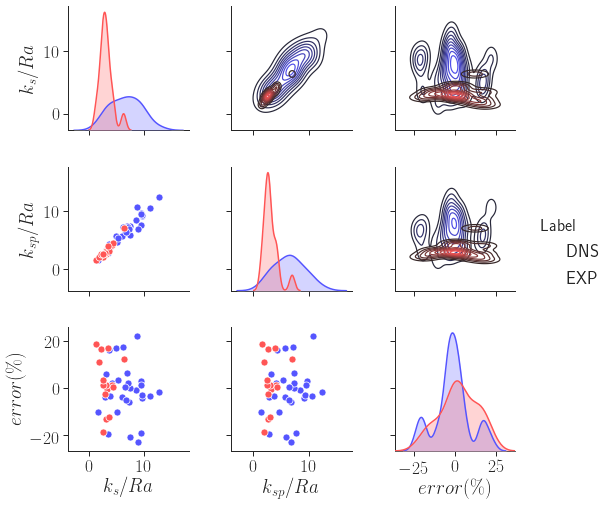

In [7]:


Error=pd.DataFrame()
Error["$k_s/Ra$"]= y
Error["$k_{sp}/Ra$"]= yn
Error["$error(\%)$"]= (100.*(yn-y)/(y))
Error["Label"]= Geometry1["Label"]


plt.rc('text', usetex=True)

sns.set(context='paper',
            style='ticks', 
            palette='deep',
            font='sans-serif', 
            font_scale=2, color_codes=True, rc=None)

g = sns.pairplot(Error,diag_kind="kde",hue='Label', palette="seismic",
                 #height=1.5, 
                 aspect=1.,
                 plot_kws=dict(s=50,facecolor="w", edgecolor="w", linewidth=1.),
                 diag_kws=dict(linewidth=1.5,kernel='gau'))

g.map_upper(sns.kdeplot
            #shade=True,color="m",,cmap="Purples_d",shade_lowest=False, shade=True,n_levels=10
           )
g.map_lower(sns.scatterplot, s=50,legend='full'
            #size=abs(Error['err']),sizes=(20,200)
            #shade=True,color="m",n_levels=30,cmap="Purples_d"
           )





plt.savefig('pair_error.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



In [13]:
 print("mean err: %f" % np.mean(100.*abs(yn-y)/(y)))

mean err: 8.077810


In [ ]:
#Geometry = pd.read_csv('VOF.csv',header=0).as_matrix(columns=['krms_ch',
#                                                              'incx_ch','incz_ch','pro_ch','ESx_ch','ESz_ch',
#                                                              'sk_ch','ku_ch'])


In [9]:
from scipy.optimize import curve_fit
import random

def fitFunc(x, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9,
            a10, a11, a12, a13, a14, a15, a16, a17, a18, a19,
            a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30):
    f = (a0 + 
         a1*x[:,0]**a2   + a3*x[:,1] + a4*abs(x[:,1])**a5  + a6*x[:,2] + a7*abs(x[:,2])**a8   + a9*x[:,3]**a10 +
         a11*x[:,4]**a12 + a13*x[:,5]**a14 + a15*x[:,6] + a16*abs(x[:,6])**a17 + a18*(x[:,7]-3.) +
         a19*abs(x[:,7]-3.)**a20 +
         a21*(abs(x[:,6])**a22)*(x[:,3])**a23+a24*x[:,0]*abs(x[:,6])**a25+a26*x[:,4]*x[:,6]+a27*x[:,4]*x[:,0]+
        +a28*x[:,4]*x[:,3]+a29*x[:,4]*x[:,7]+a30*x[:,6]*x[:,7])
    return f


nbnd=31

bndd=(np.zeros([nbnd])-10.)
bndu=(np.zeros([nbnd])+10.)


miny=1000
while max(100.*abs(yn-y)/(y))>30:
    p0 = [(random.random()-.5)*10 for i in range(nbnd)] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    fitParams, fitCovariances = curve_fit(fitFunc, X_train, y_train, p0,
                                         bounds=(bndd,bndu),method='trf',maxfev=100000)
    yn=fitFunc(X, *fitParams)
    if miny>max(100.*abs(yn-y)/(y)):
        fitParams_opt=fitParams
        miny=max(100.*abs(yn-y)/(y))
    print("Max err: %f" % max(100.*abs(yn-y)/(y)))
    print("Miny: %f" % miny)
    



In [502]:
yn=fitFunc(X, *fitParams_opt)    
print (' fit coefficients:\n', fitParams_opt)
print("Max err: %f" % max(100.*abs(yn-y)/(y)))
print("Mean err: %f" % np.mean(100.*abs(yn-y)/(y)))
print((100.*(yn-y)/(y)))


 fit coefficients:
 [ 5.71899662e+00  9.81430143e+00  2.95164620e-01  1.05600568e+00
  7.94330355e+00 -5.60236376e-03 -1.65414597e+00 -9.99996992e+00
  6.16029449e-03 -9.99981562e+00 -2.40628977e-01 -3.42275474e-01
 -1.19194022e+00  9.28870270e-01 -4.15813562e-01  2.37705367e+00
  2.50769541e+00  1.25084954e+00  1.18212406e-01  5.81067253e-07
 -3.93847465e+00 -1.24360039e-01  5.48950382e+00  2.15727841e+00]
Max err: 51.627009
Mean err: 16.052434
[32.07695046 41.43564428  6.63153265 22.5111938  10.0246781   0.77499376
 24.59958084  3.90538776  3.04122678 22.61015941  2.02895758  7.41415163
  1.06240324  7.51450156  7.74244198 24.95236291  0.07693289  6.04792488
 29.94280962  0.52728501  4.33275023  4.08913145 19.82607427 13.00200008
 38.12867606  1.57145864 33.80124994  3.06891971 26.47093014  6.64316003
 22.76693536  5.26598589  0.08982062 12.11520858 12.42659181  4.07435851
 25.08261363  6.40756577 20.68982381 41.88124022 47.66603126 11.93372737
 37.93002836 10.93592264 51.62700887 28

/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


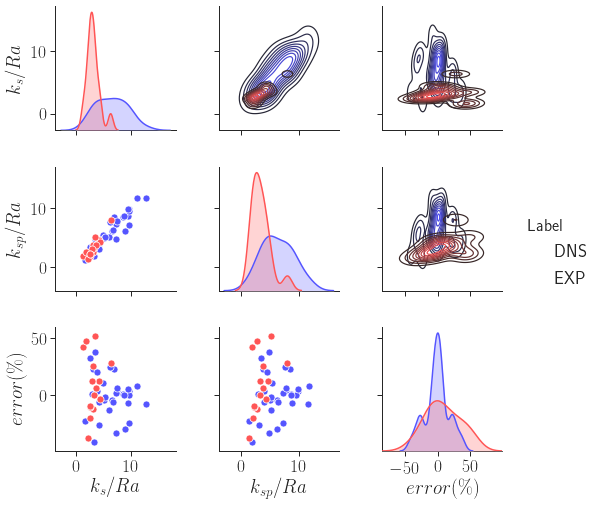

In [503]:


Error=pd.DataFrame()
Error["$k_s/Ra$"]= y
Error["$k_{sp}/Ra$"]= yn
Error["$error(\%)$"]= (100.*(yn-y)/(y))
Error["Label"]= Geometry1["Label"]


plt.rc('text', usetex=True)

sns.set(context='paper',
            style='ticks', 
            palette='deep',
            font='sans-serif', 
            font_scale=2, color_codes=True, rc=None)

g = sns.pairplot(Error,diag_kind="kde",hue='Label', palette="seismic",
                 #height=1.5, 
                 aspect=1.,
                 plot_kws=dict(s=50,facecolor="w", edgecolor="w", linewidth=1.),
                 diag_kws=dict(linewidth=1.5,kernel='gau'))

g.map_upper(sns.kdeplot
            #shade=True,color="m",,cmap="Purples_d",shade_lowest=False, shade=True,n_levels=10
           )
g.map_lower(sns.scatterplot, s=50,legend='full'
            #size=abs(Error['err']),sizes=(20,200)
            #shade=True,color="m",n_levels=30,cmap="Purples_d"
           )





plt.savefig('pair_error_curvefit.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



In [571]:
from scipy.optimize import differential_evolution
import random


def fitFunc1(a,x, y_train):
    f = (a[0] + 
         a[1]*x[:,0]**a[2]   + a[3]*x[:,1] + a[4]*abs(x[:,1])**a[5]  + a[6]*x[:,2] + a[7]*abs(x[:,2])**a[8] + 
         a[9]*x[:,3]**a[10] +
         a[11]*x[:,4]**a[12] + a[13]*x[:,5]**a[14] + a[15]*x[:,6] + a[16]*abs(x[:,6])**a[17] + a[18]*(x[:,7]-3.) +
         a[19]*abs(x[:,7]-3.)**a[20] +
         a[21]*(abs(x[:,6])**a[22])*(x[:,3])**a[23]+a[24]*x[:,0]*abs(x[:,6])**a[25]+a[26]*x[:,4]*x[:,6]+
         a[27]*x[:,4]*x[:,0]+
         a[28]*x[:,4]*x[:,3]+a[29]*x[:,4]*x[:,7]+a[30]*x[:,6]*x[:,7])
    h=max(100.*abs(f- y_train)/ y_train)
    return h

def fitFunc2(a,x):
    f = (a[0] + 
         a[1]*x[:,0]**a[2]   + a[3]*x[:,1] + a[4]*abs(x[:,1])**a[5]  + a[6]*x[:,2] + a[7]*abs(x[:,2])**a[8] + 
         a[9]*x[:,3]**a[10] +
         a[11]*x[:,4]**a[12] + a[13]*x[:,5]**a[14] + a[15]*x[:,6] + a[16]*abs(x[:,6])**a[17] + a[18]*(x[:,7]-3.) +
         a[19]*abs(x[:,7]-3.)**a[20] +
         a[21]*(abs(x[:,6])**a[22])*(x[:,3])**a[23]+a[24]*x[:,0]*abs(x[:,6])**a[25]+a[26]*x[:,4]*x[:,6]+
         a[27]*x[:,4]*x[:,0]+
         a[28]*x[:,4]*x[:,3]+a[29]*x[:,4]*x[:,7]+a[30]*x[:,6]*x[:,7])
    return f


nbnd=31


miny=1000
while max(100.*abs(yn-y)/(y))>30:
    bounds = [(-10,10) for i in range(nbnd)] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    DE = differential_evolution(fitFunc1,bounds, args=(X, y),
                                strategy='best2exp', maxiter=1000, popsize=500,
                                tol=0.01, mutation=(0.5, 1), recombination=0.85, seed=None, 
                                callback=None, disp=True, polish=True, 
                                init='latinhypercube', atol=0, updating='immediate', workers=4, )
    
    yn=fitFunc2(DE.x, X)
    if miny>max(100.*abs(yn-y)/(y)):
        fitParams_opt=DE.x
        miny=max(100.*abs(yn-y)/(y))
    print("Max err: %f" % max(100.*abs(yn-y)/(y)))
    print("Miny: %f" % miny)
    



differential_evolution step 1: f(x)= 1090.24
differential_evolution step 2: f(x)= 1090.24
differential_evolution step 3: f(x)= 1090.24
differential_evolution step 4: f(x)= 1090.24
differential_evolution step 5: f(x)= 1090.24
differential_evolution step 6: f(x)= 1090.24
differential_evolution step 7: f(x)= 1090.24
differential_evolution step 8: f(x)= 632.679
differential_evolution step 9: f(x)= 631.234
differential_evolution step 10: f(x)= 631.234
differential_evolution step 11: f(x)= 631.234
differential_evolution step 12: f(x)= 631.234
differential_evolution step 13: f(x)= 629.858
differential_evolution step 14: f(x)= 629.858
differential_evolution step 15: f(x)= 629.858
differential_evolution step 16: f(x)= 431.928
differential_evolution step 17: f(x)= 431.928
differential_evolution step 18: f(x)= 431.928
differential_evolution step 19: f(x)= 431.928
differential_evolution step 20: f(x)= 431.928
differential_evolution step 21: f(x)= 427.849
differential_evolution step 22: f(x)= 427.8

differential_evolution step 178: f(x)= 142.836
differential_evolution step 179: f(x)= 142.836
differential_evolution step 180: f(x)= 142.836
differential_evolution step 181: f(x)= 142.836
differential_evolution step 182: f(x)= 142.836
differential_evolution step 183: f(x)= 123.458
differential_evolution step 184: f(x)= 123.458
differential_evolution step 185: f(x)= 123.458
differential_evolution step 186: f(x)= 123.458
differential_evolution step 187: f(x)= 123.458
differential_evolution step 188: f(x)= 123.458
differential_evolution step 189: f(x)= 123.458
differential_evolution step 190: f(x)= 123.458
differential_evolution step 191: f(x)= 123.458
differential_evolution step 192: f(x)= 123.458
differential_evolution step 193: f(x)= 123.458
differential_evolution step 194: f(x)= 123.458
differential_evolution step 195: f(x)= 123.458
differential_evolution step 196: f(x)= 123.458
differential_evolution step 197: f(x)= 123.458
differential_evolution step 198: f(x)= 123.458
differential_

differential_evolution step 353: f(x)= 107.383
differential_evolution step 354: f(x)= 107.383
differential_evolution step 355: f(x)= 107.383
differential_evolution step 356: f(x)= 107.383
differential_evolution step 357: f(x)= 107.383
differential_evolution step 358: f(x)= 107.383
differential_evolution step 359: f(x)= 103.869
differential_evolution step 360: f(x)= 103.869
differential_evolution step 361: f(x)= 103.869
differential_evolution step 362: f(x)= 103.869
differential_evolution step 363: f(x)= 103.869
differential_evolution step 364: f(x)= 103.869
differential_evolution step 365: f(x)= 103.869
differential_evolution step 366: f(x)= 103.869
differential_evolution step 367: f(x)= 103.869
differential_evolution step 368: f(x)= 103.869
differential_evolution step 369: f(x)= 103.869
differential_evolution step 370: f(x)= 103.869
differential_evolution step 371: f(x)= 103.869
differential_evolution step 372: f(x)= 103.869
differential_evolution step 373: f(x)= 103.869
differential_

differential_evolution step 528: f(x)= 92.9253
differential_evolution step 529: f(x)= 92.9253
differential_evolution step 530: f(x)= 92.9253
differential_evolution step 531: f(x)= 92.9253
differential_evolution step 532: f(x)= 92.9253
differential_evolution step 533: f(x)= 92.9253
differential_evolution step 534: f(x)= 92.9253
differential_evolution step 535: f(x)= 92.9253
differential_evolution step 536: f(x)= 92.9253
differential_evolution step 537: f(x)= 92.9253
differential_evolution step 538: f(x)= 92.2786
differential_evolution step 539: f(x)= 92.2786
differential_evolution step 540: f(x)= 92.2786
differential_evolution step 541: f(x)= 92.2786
differential_evolution step 542: f(x)= 92.2786
differential_evolution step 543: f(x)= 92.2786
differential_evolution step 544: f(x)= 92.2786
differential_evolution step 545: f(x)= 92.2786
differential_evolution step 546: f(x)= 92.2786
differential_evolution step 547: f(x)= 92.2786
differential_evolution step 548: f(x)= 92.2786
differential_

differential_evolution step 703: f(x)= 87.8755
differential_evolution step 704: f(x)= 87.8755
differential_evolution step 705: f(x)= 87.8755
differential_evolution step 706: f(x)= 87.8755
differential_evolution step 707: f(x)= 87.8755
differential_evolution step 708: f(x)= 87.8755
differential_evolution step 709: f(x)= 87.8755
differential_evolution step 710: f(x)= 87.8755
differential_evolution step 711: f(x)= 87.8755
differential_evolution step 712: f(x)= 87.8755
differential_evolution step 713: f(x)= 87.8755
differential_evolution step 714: f(x)= 87.8755
differential_evolution step 715: f(x)= 87.8755
differential_evolution step 716: f(x)= 87.8755
differential_evolution step 717: f(x)= 87.8755
differential_evolution step 718: f(x)= 87.8755
differential_evolution step 719: f(x)= 87.8755
differential_evolution step 720: f(x)= 87.8755
differential_evolution step 721: f(x)= 87.8755
differential_evolution step 722: f(x)= 87.8755
differential_evolution step 723: f(x)= 87.8755
differential_

differential_evolution step 878: f(x)= 70.3188
differential_evolution step 879: f(x)= 70.2922
differential_evolution step 880: f(x)= 70.2922
differential_evolution step 881: f(x)= 70.2922
differential_evolution step 882: f(x)= 70.2922
differential_evolution step 883: f(x)= 70.2922
differential_evolution step 884: f(x)= 70.2922
differential_evolution step 885: f(x)= 70.2922
differential_evolution step 886: f(x)= 70.2922
differential_evolution step 887: f(x)= 70.2922
differential_evolution step 888: f(x)= 70.2922
differential_evolution step 889: f(x)= 70.2922
differential_evolution step 890: f(x)= 70.2922
differential_evolution step 891: f(x)= 70.2922
differential_evolution step 892: f(x)= 70.2922
differential_evolution step 893: f(x)= 70.2922
differential_evolution step 894: f(x)= 70.2922
differential_evolution step 895: f(x)= 70.2922
differential_evolution step 896: f(x)= 70.2922
differential_evolution step 897: f(x)= 70.2922
differential_evolution step 898: f(x)= 70.2922
differential_

differential_evolution step 53: f(x)= 250.55
differential_evolution step 54: f(x)= 250.55
differential_evolution step 55: f(x)= 250.55
differential_evolution step 56: f(x)= 250.55
differential_evolution step 57: f(x)= 250.55
differential_evolution step 58: f(x)= 250.55
differential_evolution step 59: f(x)= 250.55
differential_evolution step 60: f(x)= 250.55
differential_evolution step 61: f(x)= 250.55
differential_evolution step 62: f(x)= 250.55
differential_evolution step 63: f(x)= 250.55
differential_evolution step 64: f(x)= 250.55
differential_evolution step 65: f(x)= 250.55
differential_evolution step 66: f(x)= 250.55
differential_evolution step 67: f(x)= 250.55
differential_evolution step 68: f(x)= 192.381
differential_evolution step 69: f(x)= 192.381
differential_evolution step 70: f(x)= 192.381
differential_evolution step 71: f(x)= 192.381
differential_evolution step 72: f(x)= 192.381
differential_evolution step 73: f(x)= 192.381
differential_evolution step 74: f(x)= 192.381
dif

differential_evolution step 229: f(x)= 134.141
differential_evolution step 230: f(x)= 134.141
differential_evolution step 231: f(x)= 134.141
differential_evolution step 232: f(x)= 134.141
differential_evolution step 233: f(x)= 134.141
differential_evolution step 234: f(x)= 134.141
differential_evolution step 235: f(x)= 134.141
differential_evolution step 236: f(x)= 134.141
differential_evolution step 237: f(x)= 134.141
differential_evolution step 238: f(x)= 134.141
differential_evolution step 239: f(x)= 134.141
differential_evolution step 240: f(x)= 134.141
differential_evolution step 241: f(x)= 134.141
differential_evolution step 242: f(x)= 112.723
differential_evolution step 243: f(x)= 112.723
differential_evolution step 244: f(x)= 112.723
differential_evolution step 245: f(x)= 112.723
differential_evolution step 246: f(x)= 112.723
differential_evolution step 247: f(x)= 112.723
differential_evolution step 248: f(x)= 112.723
differential_evolution step 249: f(x)= 112.723
differential_

differential_evolution step 406: f(x)= 105.175
differential_evolution step 407: f(x)= 105.175
differential_evolution step 408: f(x)= 105.175
differential_evolution step 409: f(x)= 105.175
differential_evolution step 410: f(x)= 105.175
differential_evolution step 411: f(x)= 105.175
differential_evolution step 412: f(x)= 105.175
differential_evolution step 413: f(x)= 105.175
differential_evolution step 414: f(x)= 105.175
differential_evolution step 415: f(x)= 105.175
differential_evolution step 416: f(x)= 105.175
differential_evolution step 417: f(x)= 105.175
differential_evolution step 418: f(x)= 98.4873
differential_evolution step 419: f(x)= 98.4873
differential_evolution step 420: f(x)= 98.4873
differential_evolution step 421: f(x)= 98.4873
differential_evolution step 422: f(x)= 98.4873
differential_evolution step 423: f(x)= 98.4873
differential_evolution step 424: f(x)= 98.4873
differential_evolution step 425: f(x)= 98.4873
differential_evolution step 426: f(x)= 98.4873
differential_

differential_evolution step 581: f(x)= 86.2507
differential_evolution step 582: f(x)= 86.2507
differential_evolution step 583: f(x)= 86.2507
differential_evolution step 584: f(x)= 86.2507
differential_evolution step 585: f(x)= 86.2507
differential_evolution step 586: f(x)= 86.2507
differential_evolution step 587: f(x)= 86.2507
differential_evolution step 588: f(x)= 86.2507
differential_evolution step 589: f(x)= 86.2507
differential_evolution step 590: f(x)= 86.2507
differential_evolution step 591: f(x)= 86.2507
differential_evolution step 592: f(x)= 86.2507
differential_evolution step 593: f(x)= 86.2507
differential_evolution step 594: f(x)= 86.2507
differential_evolution step 595: f(x)= 86.2507
differential_evolution step 596: f(x)= 86.2507
differential_evolution step 597: f(x)= 86.2507
differential_evolution step 598: f(x)= 86.2507
differential_evolution step 599: f(x)= 86.2507
differential_evolution step 600: f(x)= 86.2507
differential_evolution step 601: f(x)= 86.2507
differential_

Process ForkPoolWorker-328:
Process ForkPoolWorker-326:
Process ForkPoolWorker-327:
Process ForkPoolWorker-329:


KeyboardInterrupt: 

In [572]:
yn=fitFunc2(fitParams_opt, X)
print(yn)
print("Max err: %f" % max(100.*abs(yn-y)/(y)))
print("Mean err: %f" % np.mean(100.*abs(yn-y)/(y)))
print((100.*abs(yn-y)/(y)))


[ 4.43757543  3.4206846   6.16358545  4.14271548  5.37776705  8.37060422
  5.26607004  5.44273371  8.63634961  5.66216193  7.58455441  6.28441548
  4.37640269  7.97865193  6.88532749  4.48826001  4.2647527   2.30810302
  5.21220812  4.80602664  3.75465814  3.34184621  3.26610176  3.90184762
  5.14927796  3.85040755  4.51614326  2.40741417  5.03925159  4.78617626
  0.55118442 11.45538008  4.09743775  4.6841359   4.51605459  7.44619859
  2.84953208  2.90191639  2.2868723   2.17340455  1.7477604   2.76800651
  3.83817067  2.98297512  3.82200785  4.43808125  4.22186309]
Max err: 68.879510
Mean err: 32.623068
[68.44674097  3.68950205 48.12487623 35.515947    8.69954683  2.021499
 45.22076569 26.75470066 10.4649631  18.58729329  5.9685971  42.7597826
 48.91136439 15.9172835  45.64215141 26.95576839 55.09086173 68.8795098
 41.23972918 45.15156035 42.00121569 35.21959656 12.59727691 34.15632141
 46.43259191 26.92083635 38.26556459 37.88871434 18.26814959 29.49396256
 67.38825503 21.42702885 26

In [ ]:


Error=pd.DataFrame()
Error["$k_s/Ra$"]= y
Error["$k_{sp}/Ra$"]= yn
Error["$error(\%)$"]= (100.*(yn-y)/(y))
Error["Label"]= Geometry1["Label"]


plt.rc('text', usetex=True)

sns.set(context='paper',
            style='ticks', 
            palette='deep',
            font='sans-serif', 
            font_scale=2, color_codes=True, rc=None)

g = sns.pairplot(Error,diag_kind="kde",hue='Label', palette="seismic",
                 #height=1.5, 
                 aspect=1.,
                 plot_kws=dict(s=50,facecolor="w", edgecolor="w", linewidth=1.),
                 diag_kws=dict(linewidth=1.5,kernel='gau'))

g.map_upper(sns.kdeplot
            #shade=True,color="m",,cmap="Purples_d",shade_lowest=False, shade=True,n_levels=10
           )
g.map_lower(sns.scatterplot, s=50,legend='full'
            #size=abs(Error['err']),sizes=(20,200)
            #shade=True,color="m",n_levels=30,cmap="Purples_d"
           )





plt.savefig('pair_error_DE.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



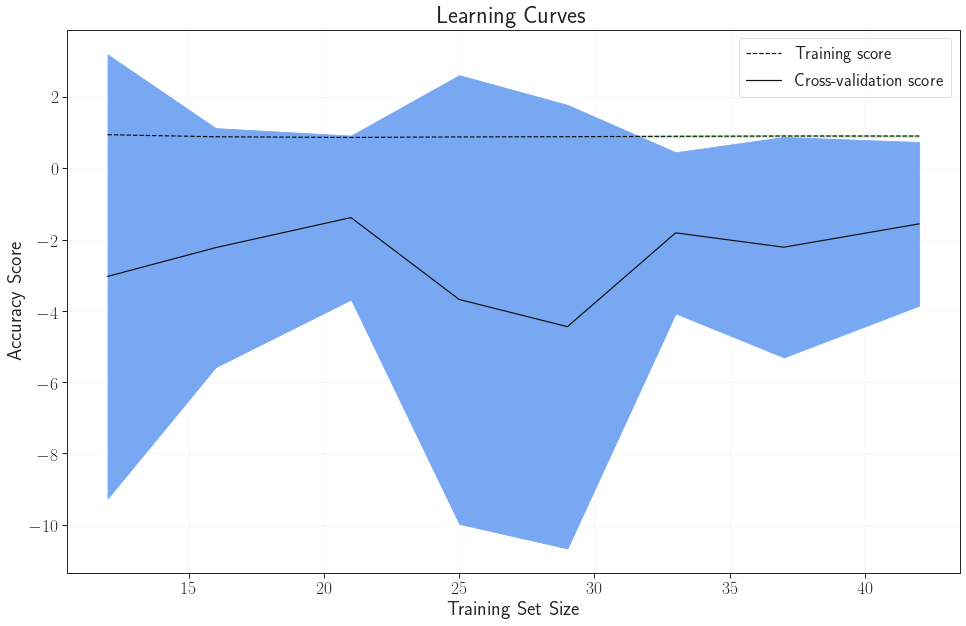

In [75]:
# Notice how this is set up - there are a lot of options, which makes the ML workflow
# complex, but also very powerful.
from sklearn.linear_model import LinearRegression
train_sizes, train_scores, test_scores = learning_curve(svr, 
                                                        X, 
                                                        y,
                                                        cv = 10,
                                                        scoring = 'r2',
                                                        n_jobs = -1, 
                                                        train_sizes = np.linspace(.3, 1., 8))

# Means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



fig = plt.figure(figsize=(16, 10))

# draw basic lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# error bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#b8f2b8")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#79a8f2")

# add labels, legend and grid
plt.xlabel("Training Set Size", fontsize=20)
plt.ylabel("Accuracy Score", fontsize=20)
plt.title("Learning Curves", fontsize=24)
plt.legend(loc="best")
plt.grid(alpha=0.16)

In [76]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

import copy
import types as python_types
import warnings
from keras import models
from keras import optimizers
from keras import layers
import keras.backend as K
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
from keras import regularizers
import tensorflow as tf
from keras.layers import Layer


from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.engine.base_layer import InputSpec
from keras.engine.base_layer import Layer
from keras.utils.generic_utils import func_dump
from keras.utils.generic_utils import func_load
from keras.utils.generic_utils import deserialize_keras_object
from keras.utils.generic_utils import has_arg
from keras.legacy import interfaces


class myDense(Layer):
    """Just your regular densely-connected NN layer.
    `Dense` implements the operation:
    `output = activation(dot(input, kernel) + bias)`
    where `activation` is the element-wise activation function
    passed as the `activation` argument, `kernel` is a weights matrix
    created by the layer, and `bias` is a bias vector created by the layer
    (only applicable if `use_bias` is `True`).
    Note: if the input to the layer has a rank greater than 2, then
    it is flattened prior to the initial dot product with `kernel`.
    # Example
    ```python
        # as first layer in a sequential model:
        model = Sequential()
        model.add(Dense(32, input_shape=(16,)))
        # now the model will take as input arrays of shape (*, 16)
        # and output arrays of shape (*, 32)
        # after the first layer, you don't need to specify
        # the size of the input anymore:
        model.add(Dense(32))
    ```
    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            If you don't specify anything, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
    # Input shape
        nD tensor with shape: `(batch_size, ..., input_dim)`.
        The most common situation would be
        a 2D input with shape `(batch_size, input_dim)`.
    # Output shape
        nD tensor with shape: `(batch_size, ..., units)`.
        For instance, for a 2D input with shape `(batch_size, input_dim)`,
        the output would have shape `(batch_size, units)`.
    """

    @interfaces.legacy_dense_support
    def __init__(self, units,
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(myDense, self).__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer=self.kernel_initializer,
                                      name='kernel',trainable=True,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),trainable=True,
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def call(self, inputs):
        output = K.dot(K.abs(inputs), self.kernel)
        if self.use_bias:
            output = K.bias_add(output, self.bias, data_format='channels_last')
        if self.activation is not None:
            output = self.activation(output)
        return output

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        assert input_shape[-1]
        output_shape = list(input_shape)
        output_shape[-1] = self.units
        return tuple(output_shape)

    def get_config(self):
        config = {
            'units': self.units,
            'activation': activations.serialize(self.activation),
            'use_bias': self.use_bias,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer':
                regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint)
        }
        base_config = super(Dense, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))




Using TensorFlow backend.


In [8]:
from keras import models
from keras import optimizers
from keras import layers
import keras.backend as K
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
from keras import regularizers
import tensorflow as tf
from keras.layers import Layer



class MyLayer(Layer):

    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(MyLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        return K.dot(K.abs(x), self.kernel)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    
    

# Define custom loss
def custom_loss():

    def loss(y_true, y_pred):
        diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None))
        return 100. * K.max(diff, axis=-1)
    
    return loss
    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('X size = ', X.size)
print('X_train size = ', X_train.size)
print('X_test size = ', X_test.size)

adam=optimizers.Adam(learning_rate=0.01, beta_1=.99, beta_2=0.999,amsgrad=False)
rmsprop=optimizers.RMSprop(learning_rate=0.01)
# Start neural network
network = models.Sequential()
#network.add(myDense( output_dim=20, input_shape=(17,)))
network.add(layers.Dense(units=19, activation='relu',kernel_regularizer=regularizers.l1(.5),input_shape=(17,)))
#network.add(layers.Dropout(.5, noise_shape=None, seed=None))
network.add(layers.Dense(units=14, activation='relu',kernel_regularizer=regularizers.l1(.5),))
network.add(layers.Dense(units=8, activation='relu',kernel_regularizer=regularizers.l1(.5),))
network.add(layers.Dense(units=1,kernel_regularizer=regularizers.l1(.5),))



#loss=custom_loss()
network.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
print(network.summary())

network.fit(X_train, y_train, epochs=20000, batch_size=100,verbose=1)



print(network.weights)
_, accuracy = network.evaluate(X_train, y_train)
print('Train Accuracy: %.2f' % (accuracy))
_, accuracy = network.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy))





X size =  765
X_train size =  527
X_test size =  238
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 19)                342       
_________________________________________________________________
dense_10 (Dense)             (None, 14)                280       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20000
31/31 [==============================] - 0s 3ms/step - loss: 122.4439 - accuracy: 0.0000e+00
Epoch 2/20000
31/31 [==============================] - 0s 40us/step - loss: 115.2477 - ac

Epoch 69/20000
31/31 [==============================] - 0s 35us/step - loss: 32.3447 - accuracy: 0.0000e+00
Epoch 70/20000
31/31 [==============================] - 0s 46us/step - loss: 32.1006 - accuracy: 0.0000e+00
Epoch 71/20000
31/31 [==============================] - 0s 39us/step - loss: 31.8646 - accuracy: 0.0000e+00
Epoch 72/20000
31/31 [==============================] - 0s 38us/step - loss: 31.6040 - accuracy: 0.0000e+00
Epoch 73/20000
31/31 [==============================] - 0s 42us/step - loss: 31.3346 - accuracy: 0.0000e+00
Epoch 74/20000
31/31 [==============================] - 0s 36us/step - loss: 31.0565 - accuracy: 0.0000e+00
Epoch 75/20000
31/31 [==============================] - 0s 42us/step - loss: 30.7718 - accuracy: 0.0000e+00
Epoch 76/20000
31/31 [==============================] - 0s 35us/step - loss: 30.4770 - accuracy: 0.0000e+00
Epoch 77/20000
31/31 [==============================] - 0s 32us/step - loss: 30.1847 - accuracy: 0.0000e+00
Epoch 78/20000
31/31 [======

Epoch 145/20000
31/31 [==============================] - 0s 35us/step - loss: 20.0142 - accuracy: 0.0000e+00
Epoch 146/20000
31/31 [==============================] - 0s 35us/step - loss: 19.8695 - accuracy: 0.0000e+00
Epoch 147/20000
31/31 [==============================] - 0s 37us/step - loss: 19.7396 - accuracy: 0.0000e+00
Epoch 148/20000
31/31 [==============================] - 0s 49us/step - loss: 19.6226 - accuracy: 0.0000e+00
Epoch 149/20000
31/31 [==============================] - 0s 40us/step - loss: 19.5101 - accuracy: 0.0000e+00
Epoch 150/20000
31/31 [==============================] - 0s 42us/step - loss: 19.4018 - accuracy: 0.0000e+00
Epoch 151/20000
31/31 [==============================] - 0s 52us/step - loss: 19.2949 - accuracy: 0.0000e+00
Epoch 152/20000
31/31 [==============================] - 0s 52us/step - loss: 19.1999 - accuracy: 0.0000e+00
Epoch 153/20000
31/31 [==============================] - 0s 37us/step - loss: 19.1035 - accuracy: 0.0000e+00
Epoch 154/20000
31/

Epoch 221/20000
31/31 [==============================] - 0s 49us/step - loss: 14.2366 - accuracy: 0.0000e+00
Epoch 222/20000
31/31 [==============================] - 0s 45us/step - loss: 14.1933 - accuracy: 0.0000e+00
Epoch 223/20000
31/31 [==============================] - 0s 30us/step - loss: 14.1462 - accuracy: 0.0000e+00
Epoch 224/20000
31/31 [==============================] - 0s 38us/step - loss: 14.0868 - accuracy: 0.0000e+00
Epoch 225/20000
31/31 [==============================] - 0s 48us/step - loss: 14.0238 - accuracy: 0.0000e+00
Epoch 226/20000
31/31 [==============================] - 0s 36us/step - loss: 13.9552 - accuracy: 0.0000e+00
Epoch 227/20000
31/31 [==============================] - 0s 73us/step - loss: 13.8880 - accuracy: 0.0000e+00
Epoch 228/20000
31/31 [==============================] - 0s 42us/step - loss: 13.8159 - accuracy: 0.0000e+00
Epoch 229/20000
31/31 [==============================] - 0s 109us/step - loss: 13.7487 - accuracy: 0.0000e+00
Epoch 230/20000
31

Epoch 297/20000
31/31 [==============================] - 0s 49us/step - loss: 11.1698 - accuracy: 0.0000e+00
Epoch 298/20000
31/31 [==============================] - 0s 36us/step - loss: 11.1340 - accuracy: 0.0000e+00
Epoch 299/20000
31/31 [==============================] - 0s 39us/step - loss: 11.1002 - accuracy: 0.0000e+00
Epoch 300/20000
31/31 [==============================] - 0s 37us/step - loss: 11.0643 - accuracy: 0.0000e+00
Epoch 301/20000
31/31 [==============================] - 0s 44us/step - loss: 11.0266 - accuracy: 0.0000e+00
Epoch 302/20000
31/31 [==============================] - 0s 42us/step - loss: 10.9912 - accuracy: 0.0000e+00
Epoch 303/20000
31/31 [==============================] - 0s 40us/step - loss: 10.9444 - accuracy: 0.0000e+00
Epoch 304/20000
31/31 [==============================] - 0s 35us/step - loss: 10.8941 - accuracy: 0.0000e+00
Epoch 305/20000
31/31 [==============================] - 0s 38us/step - loss: 10.8491 - accuracy: 0.0000e+00
Epoch 306/20000
31/

Epoch 373/20000
31/31 [==============================] - 0s 35us/step - loss: 9.1819 - accuracy: 0.0000e+00
Epoch 374/20000
31/31 [==============================] - 0s 35us/step - loss: 9.1558 - accuracy: 0.0000e+00
Epoch 375/20000
31/31 [==============================] - 0s 35us/step - loss: 9.1265 - accuracy: 0.0000e+00
Epoch 376/20000
31/31 [==============================] - 0s 36us/step - loss: 9.0969 - accuracy: 0.0000e+00
Epoch 377/20000
31/31 [==============================] - 0s 33us/step - loss: 9.0683 - accuracy: 0.0000e+00
Epoch 378/20000
31/31 [==============================] - 0s 29us/step - loss: 9.0464 - accuracy: 0.0000e+00
Epoch 379/20000
31/31 [==============================] - 0s 31us/step - loss: 9.0209 - accuracy: 0.0000e+00
Epoch 380/20000
31/31 [==============================] - 0s 35us/step - loss: 9.0000 - accuracy: 0.0000e+00
Epoch 381/20000
31/31 [==============================] - 0s 39us/step - loss: 8.9758 - accuracy: 0.0000e+00
Epoch 382/20000
31/31 [=====

Epoch 449/20000
31/31 [==============================] - 0s 31us/step - loss: 7.7218 - accuracy: 0.0000e+00
Epoch 450/20000
31/31 [==============================] - 0s 39us/step - loss: 7.7017 - accuracy: 0.0000e+00
Epoch 451/20000
31/31 [==============================] - 0s 33us/step - loss: 7.6876 - accuracy: 0.0000e+00
Epoch 452/20000
31/31 [==============================] - 0s 34us/step - loss: 7.6716 - accuracy: 0.0000e+00
Epoch 453/20000
31/31 [==============================] - 0s 33us/step - loss: 7.6536 - accuracy: 0.0000e+00
Epoch 454/20000
31/31 [==============================] - 0s 26us/step - loss: 7.6346 - accuracy: 0.0000e+00
Epoch 455/20000
31/31 [==============================] - 0s 26us/step - loss: 7.6228 - accuracy: 0.0000e+00
Epoch 456/20000
31/31 [==============================] - 0s 32us/step - loss: 7.6150 - accuracy: 0.0000e+00
Epoch 457/20000
31/31 [==============================] - 0s 38us/step - loss: 7.6048 - accuracy: 0.0000e+00
Epoch 458/20000
31/31 [=====

Epoch 525/20000
31/31 [==============================] - 0s 33us/step - loss: 6.7716 - accuracy: 0.0000e+00
Epoch 526/20000
31/31 [==============================] - 0s 38us/step - loss: 6.7578 - accuracy: 0.0000e+00
Epoch 527/20000
31/31 [==============================] - 0s 33us/step - loss: 6.7427 - accuracy: 0.0000e+00
Epoch 528/20000
31/31 [==============================] - 0s 30us/step - loss: 6.7233 - accuracy: 0.0000e+00
Epoch 529/20000
31/31 [==============================] - 0s 27us/step - loss: 6.7079 - accuracy: 0.0000e+00
Epoch 530/20000
31/31 [==============================] - 0s 26us/step - loss: 6.6970 - accuracy: 0.0000e+00
Epoch 531/20000
31/31 [==============================] - 0s 28us/step - loss: 6.6773 - accuracy: 0.0000e+00
Epoch 532/20000
31/31 [==============================] - 0s 30us/step - loss: 6.6497 - accuracy: 0.0000e+00
Epoch 533/20000
31/31 [==============================] - 0s 41us/step - loss: 6.6244 - accuracy: 0.0000e+00
Epoch 534/20000
31/31 [=====

Epoch 601/20000
31/31 [==============================] - 0s 30us/step - loss: 6.1281 - accuracy: 0.0000e+00
Epoch 602/20000
31/31 [==============================] - 0s 31us/step - loss: 6.1226 - accuracy: 0.0000e+00
Epoch 603/20000
31/31 [==============================] - 0s 25us/step - loss: 6.1141 - accuracy: 0.0000e+00
Epoch 604/20000
31/31 [==============================] - 0s 29us/step - loss: 6.1049 - accuracy: 0.0000e+00
Epoch 605/20000
31/31 [==============================] - 0s 29us/step - loss: 6.0950 - accuracy: 0.0000e+00
Epoch 606/20000
31/31 [==============================] - 0s 26us/step - loss: 6.0792 - accuracy: 0.0000e+00
Epoch 607/20000
31/31 [==============================] - 0s 26us/step - loss: 6.0680 - accuracy: 0.0000e+00
Epoch 608/20000
31/31 [==============================] - 0s 39us/step - loss: 6.0550 - accuracy: 0.0000e+00
Epoch 609/20000
31/31 [==============================] - 0s 25us/step - loss: 6.0451 - accuracy: 0.0000e+00
Epoch 610/20000
31/31 [=====

Epoch 677/20000
31/31 [==============================] - 0s 28us/step - loss: 5.5883 - accuracy: 0.0000e+00
Epoch 678/20000
31/31 [==============================] - 0s 31us/step - loss: 5.5837 - accuracy: 0.0000e+00
Epoch 679/20000
31/31 [==============================] - 0s 38us/step - loss: 5.5810 - accuracy: 0.0000e+00
Epoch 680/20000
31/31 [==============================] - 0s 39us/step - loss: 5.5726 - accuracy: 0.0000e+00
Epoch 681/20000
31/31 [==============================] - 0s 36us/step - loss: 5.5612 - accuracy: 0.0000e+00
Epoch 682/20000
31/31 [==============================] - 0s 28us/step - loss: 5.5528 - accuracy: 0.0000e+00
Epoch 683/20000
31/31 [==============================] - 0s 39us/step - loss: 5.5460 - accuracy: 0.0000e+00
Epoch 684/20000
31/31 [==============================] - 0s 31us/step - loss: 5.5380 - accuracy: 0.0000e+00
Epoch 685/20000
31/31 [==============================] - 0s 29us/step - loss: 5.5369 - accuracy: 0.0000e+00
Epoch 686/20000
31/31 [=====

Epoch 753/20000
31/31 [==============================] - 0s 32us/step - loss: 5.2747 - accuracy: 0.0000e+00
Epoch 754/20000
31/31 [==============================] - 0s 41us/step - loss: 5.2689 - accuracy: 0.0000e+00
Epoch 755/20000
31/31 [==============================] - 0s 46us/step - loss: 5.2668 - accuracy: 0.0000e+00
Epoch 756/20000
31/31 [==============================] - 0s 40us/step - loss: 5.2663 - accuracy: 0.0000e+00
Epoch 757/20000
31/31 [==============================] - 0s 35us/step - loss: 5.2628 - accuracy: 0.0000e+00
Epoch 758/20000
31/31 [==============================] - 0s 30us/step - loss: 5.2617 - accuracy: 0.0000e+00
Epoch 759/20000
31/31 [==============================] - 0s 29us/step - loss: 5.2634 - accuracy: 0.0000e+00
Epoch 760/20000
31/31 [==============================] - 0s 30us/step - loss: 5.2622 - accuracy: 0.0000e+00
Epoch 761/20000
31/31 [==============================] - 0s 40us/step - loss: 5.2583 - accuracy: 0.0000e+00
Epoch 762/20000
31/31 [=====

Epoch 829/20000
31/31 [==============================] - 0s 43us/step - loss: 5.0399 - accuracy: 0.0000e+00
Epoch 830/20000
31/31 [==============================] - 0s 36us/step - loss: 5.0399 - accuracy: 0.0000e+00
Epoch 831/20000
31/31 [==============================] - 0s 34us/step - loss: 5.0362 - accuracy: 0.0000e+00
Epoch 832/20000
31/31 [==============================] - 0s 36us/step - loss: 5.0353 - accuracy: 0.0000e+00
Epoch 833/20000
31/31 [==============================] - 0s 40us/step - loss: 5.0362 - accuracy: 0.0000e+00
Epoch 834/20000
31/31 [==============================] - 0s 37us/step - loss: 5.0370 - accuracy: 0.0000e+00
Epoch 835/20000
31/31 [==============================] - 0s 35us/step - loss: 5.0364 - accuracy: 0.0000e+00
Epoch 836/20000
31/31 [==============================] - 0s 33us/step - loss: 5.0354 - accuracy: 0.0000e+00
Epoch 837/20000
31/31 [==============================] - 0s 36us/step - loss: 5.0310 - accuracy: 0.0000e+00
Epoch 838/20000
31/31 [=====

Epoch 905/20000
31/31 [==============================] - 0s 30us/step - loss: 4.8941 - accuracy: 0.0000e+00
Epoch 906/20000
31/31 [==============================] - 0s 29us/step - loss: 4.8851 - accuracy: 0.0000e+00
Epoch 907/20000
31/31 [==============================] - 0s 34us/step - loss: 4.8779 - accuracy: 0.0000e+00
Epoch 908/20000
31/31 [==============================] - 0s 28us/step - loss: 4.8762 - accuracy: 0.0000e+00
Epoch 909/20000
31/31 [==============================] - 0s 29us/step - loss: 4.8759 - accuracy: 0.0000e+00
Epoch 910/20000
31/31 [==============================] - 0s 27us/step - loss: 4.8728 - accuracy: 0.0000e+00
Epoch 911/20000
31/31 [==============================] - 0s 30us/step - loss: 4.8662 - accuracy: 0.0000e+00
Epoch 912/20000
31/31 [==============================] - 0s 50us/step - loss: 4.8627 - accuracy: 0.0000e+00
Epoch 913/20000
31/31 [==============================] - 0s 45us/step - loss: 4.8603 - accuracy: 0.0000e+00
Epoch 914/20000
31/31 [=====

Epoch 981/20000
31/31 [==============================] - 0s 30us/step - loss: 4.8120 - accuracy: 0.0000e+00
Epoch 982/20000
31/31 [==============================] - 0s 35us/step - loss: 4.8049 - accuracy: 0.0000e+00
Epoch 983/20000
31/31 [==============================] - 0s 43us/step - loss: 4.7988 - accuracy: 0.0000e+00
Epoch 984/20000
31/31 [==============================] - 0s 29us/step - loss: 4.7939 - accuracy: 0.0000e+00
Epoch 985/20000
31/31 [==============================] - 0s 35us/step - loss: 4.7891 - accuracy: 0.0000e+00
Epoch 986/20000
31/31 [==============================] - 0s 55us/step - loss: 4.7867 - accuracy: 0.0000e+00
Epoch 987/20000
31/31 [==============================] - 0s 35us/step - loss: 4.7842 - accuracy: 0.0000e+00
Epoch 988/20000
31/31 [==============================] - 0s 47us/step - loss: 4.7838 - accuracy: 0.0000e+00
Epoch 989/20000
31/31 [==============================] - 0s 33us/step - loss: 4.7850 - accuracy: 0.0000e+00
Epoch 990/20000
31/31 [=====

Epoch 1057/20000
31/31 [==============================] - 0s 45us/step - loss: 4.6701 - accuracy: 0.0000e+00
Epoch 1058/20000
31/31 [==============================] - 0s 57us/step - loss: 4.6700 - accuracy: 0.0000e+00
Epoch 1059/20000
31/31 [==============================] - 0s 41us/step - loss: 4.6670 - accuracy: 0.0000e+00
Epoch 1060/20000
31/31 [==============================] - 0s 37us/step - loss: 4.6621 - accuracy: 0.0000e+00
Epoch 1061/20000
31/31 [==============================] - 0s 37us/step - loss: 4.6585 - accuracy: 0.0000e+00
Epoch 1062/20000
31/31 [==============================] - 0s 32us/step - loss: 4.6580 - accuracy: 0.0000e+00
Epoch 1063/20000
31/31 [==============================] - 0s 32us/step - loss: 4.6607 - accuracy: 0.0000e+00
Epoch 1064/20000
31/31 [==============================] - 0s 33us/step - loss: 4.6668 - accuracy: 0.0000e+00
Epoch 1065/20000
31/31 [==============================] - 0s 32us/step - loss: 4.6727 - accuracy: 0.0000e+00
Epoch 1066/20000
31

Epoch 1133/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5892 - accuracy: 0.0000e+00
Epoch 1134/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5886 - accuracy: 0.0000e+00
Epoch 1135/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5894 - accuracy: 0.0000e+00
Epoch 1136/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5901 - accuracy: 0.0000e+00
Epoch 1137/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5907 - accuracy: 0.0000e+00
Epoch 1138/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5923 - accuracy: 0.0000e+00
Epoch 1139/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5933 - accuracy: 0.0000e+00
Epoch 1140/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5949 - accuracy: 0.0000e+00
Epoch 1141/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5939 - accuracy: 0.0000e+00
Epoch 1142/20000
31

Epoch 1209/20000
31/31 [==============================] - 0s 33us/step - loss: 4.6042 - accuracy: 0.0000e+00
Epoch 1210/20000
31/31 [==============================] - 0s 30us/step - loss: 4.6054 - accuracy: 0.0000e+00
Epoch 1211/20000
31/31 [==============================] - 0s 33us/step - loss: 4.6015 - accuracy: 0.0000e+00
Epoch 1212/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5951 - accuracy: 0.0000e+00
Epoch 1213/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5931 - accuracy: 0.0000e+00
Epoch 1214/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5946 - accuracy: 0.0000e+00
Epoch 1215/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5941 - accuracy: 0.0000e+00
Epoch 1216/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5971 - accuracy: 0.0000e+00
Epoch 1217/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5977 - accuracy: 0.0000e+00
Epoch 1218/20000
31

Epoch 1285/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5564 - accuracy: 0.0000e+00
Epoch 1286/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5549 - accuracy: 0.0000e+00
Epoch 1287/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5565 - accuracy: 0.0000e+00
Epoch 1288/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5592 - accuracy: 0.0000e+00
Epoch 1289/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5570 - accuracy: 0.0000e+00
Epoch 1290/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5539 - accuracy: 0.0000e+00
Epoch 1291/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5532 - accuracy: 0.0000e+00
Epoch 1292/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5540 - accuracy: 0.0000e+00
Epoch 1293/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5514 - accuracy: 0.0000e+00
Epoch 1294/20000
31

Epoch 1361/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5684 - accuracy: 0.0000e+00
Epoch 1362/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5663 - accuracy: 0.0000e+00
Epoch 1363/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5626 - accuracy: 0.0000e+00
Epoch 1364/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5589 - accuracy: 0.0000e+00
Epoch 1365/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5530 - accuracy: 0.0000e+00
Epoch 1366/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5488 - accuracy: 0.0000e+00
Epoch 1367/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5507 - accuracy: 0.0000e+00
Epoch 1368/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5530 - accuracy: 0.0000e+00
Epoch 1369/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5553 - accuracy: 0.0000e+00
Epoch 1370/20000
31

Epoch 1437/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 1438/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 1439/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 1440/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5412 - accuracy: 0.0000e+00
Epoch 1441/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5436 - accuracy: 0.0000e+00
Epoch 1442/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5454 - accuracy: 0.0000e+00
Epoch 1443/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5479 - accuracy: 0.0000e+00
Epoch 1444/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5492 - accuracy: 0.0000e+00
Epoch 1445/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5471 - accuracy: 0.0000e+00
Epoch 1446/20000
31

Epoch 1513/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 1514/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5405 - accuracy: 0.0000e+00
Epoch 1515/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5400 - accuracy: 0.0000e+00
Epoch 1516/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5391 - accuracy: 0.0000e+00
Epoch 1517/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5392 - accuracy: 0.0000e+00
Epoch 1518/20000
31/31 [==============================] - 0s 60us/step - loss: 4.5427 - accuracy: 0.0000e+00
Epoch 1519/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5467 - accuracy: 0.0000e+00
Epoch 1520/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5479 - accuracy: 0.0000e+00
Epoch 1521/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5487 - accuracy: 0.0000e+00
Epoch 1522/20000
31

Epoch 1589/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5427 - accuracy: 0.0000e+00
Epoch 1590/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5388 - accuracy: 0.0000e+00
Epoch 1591/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5389 - accuracy: 0.0000e+00
Epoch 1592/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5393 - accuracy: 0.0000e+00
Epoch 1593/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5417 - accuracy: 0.0000e+00
Epoch 1594/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5416 - accuracy: 0.0000e+00
Epoch 1595/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5400 - accuracy: 0.0000e+00
Epoch 1596/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5370 - accuracy: 0.0000e+00
Epoch 1597/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 1598/20000
31

Epoch 1665/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5370 - accuracy: 0.0000e+00
Epoch 1666/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5375 - accuracy: 0.0000e+00
Epoch 1667/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 1668/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 1669/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 1670/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 1671/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 1672/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 1673/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 1674/20000
31

Epoch 1741/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 1742/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 1743/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5384 - accuracy: 0.0000e+00
Epoch 1744/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5395 - accuracy: 0.0000e+00
Epoch 1745/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5386 - accuracy: 0.0000e+00
Epoch 1746/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5389 - accuracy: 0.0000e+00
Epoch 1747/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 1748/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 1749/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 1750/20000
31

Epoch 1817/20000
31/31 [==============================] - 0s 25us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 1818/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 1819/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 1820/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 1821/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5380 - accuracy: 0.0000e+00
Epoch 1822/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5413 - accuracy: 0.0000e+00
Epoch 1823/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5403 - accuracy: 0.0000e+00
Epoch 1824/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5417 - accuracy: 0.0000e+00
Epoch 1825/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5421 - accuracy: 0.0000e+00
Epoch 1826/20000
31

Epoch 1893/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 1894/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 1895/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 1896/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 1897/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5384 - accuracy: 0.0000e+00
Epoch 1898/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5397 - accuracy: 0.0000e+00
Epoch 1899/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 1900/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 1901/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 1902/20000
31

Epoch 1969/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 1970/20000
31/31 [==============================] - 0s 55us/step - loss: 4.5387 - accuracy: 0.0000e+00
Epoch 1971/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5402 - accuracy: 0.0000e+00
Epoch 1972/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5399 - accuracy: 0.0000e+00
Epoch 1973/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5389 - accuracy: 0.0000e+00
Epoch 1974/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5380 - accuracy: 0.0000e+00
Epoch 1975/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 1976/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 1977/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5378 - accuracy: 0.0000e+00
Epoch 1978/20000
31

Epoch 2045/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 2046/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 2047/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 2048/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 2049/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 2050/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 2051/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 2052/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 2053/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 2054/20000
31

Epoch 2121/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 2122/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 2123/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 2124/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 2125/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5238 - accuracy: 0.0000e+00
Epoch 2126/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5234 - accuracy: 0.0000e+00
Epoch 2127/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5259 - accuracy: 0.0000e+00
Epoch 2128/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 2129/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 2130/20000
31

Epoch 2197/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 2198/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5384 - accuracy: 0.0000e+00
Epoch 2199/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5429 - accuracy: 0.0000e+00
Epoch 2200/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5426 - accuracy: 0.0000e+00
Epoch 2201/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5423 - accuracy: 0.0000e+00
Epoch 2202/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5416 - accuracy: 0.0000e+00
Epoch 2203/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5401 - accuracy: 0.0000e+00
Epoch 2204/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5380 - accuracy: 0.0000e+00
Epoch 2205/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 2206/20000
31

Epoch 2273/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5375 - accuracy: 0.0000e+00
Epoch 2274/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5386 - accuracy: 0.0000e+00
Epoch 2275/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5393 - accuracy: 0.0000e+00
Epoch 2276/20000
31/31 [==============================] - 0s 66us/step - loss: 4.5396 - accuracy: 0.0000e+00
Epoch 2277/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5386 - accuracy: 0.0000e+00
Epoch 2278/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 2279/20000
31/31 [==============================] - 0s 100us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 2280/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 2281/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 2282/20000
3

31/31 [==============================] - 0s 37us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 2349/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 2350/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 2351/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 2352/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 2353/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 2354/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5385 - accuracy: 0.0000e+00
Epoch 2355/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 2356/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 2357/20000
31/31 [============

Epoch 2424/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 2425/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5400 - accuracy: 0.0000e+00
Epoch 2426/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5368 - accuracy: 0.0000e+00
Epoch 2427/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 2428/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 2429/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5231 - accuracy: 0.0000e+00
Epoch 2430/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 2431/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 2432/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5384 - accuracy: 0.0000e+00
Epoch 2433/20000
31

Epoch 2500/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5421 - accuracy: 0.0000e+00
Epoch 2501/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 2502/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 2503/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 2504/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 2505/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 2506/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 2507/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 2508/20000
31/31 [==============================] - 0s 73us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 2509/20000
31

Epoch 2576/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5398 - accuracy: 0.0000e+00
Epoch 2577/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5433 - accuracy: 0.0000e+00
Epoch 2578/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5462 - accuracy: 0.0000e+00
Epoch 2579/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5466 - accuracy: 0.0000e+00
Epoch 2580/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5450 - accuracy: 0.0000e+00
Epoch 2581/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5417 - accuracy: 0.0000e+00
Epoch 2582/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 2583/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 2584/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 2585/20000
31

31/31 [==============================] - 0s 101us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 2652/20000
31/31 [==============================] - 0s 71us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 2653/20000
31/31 [==============================] - 0s 61us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 2654/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 2655/20000
31/31 [==============================] - 0s 85us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 2656/20000
31/31 [==============================] - 0s 55us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 2657/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 2658/20000
31/31 [==============================] - 0s 68us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 2659/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 2660/20000
31/31 [===========

Epoch 2727/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 2728/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 2729/20000
31/31 [==============================] - 0s 57us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 2730/20000
31/31 [==============================] - 0s 61us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 2731/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 2732/20000
31/31 [==============================] - 0s 91us/step - loss: 4.5370 - accuracy: 0.0000e+00
Epoch 2733/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 2734/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 2735/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 2736/20000
31

Epoch 2803/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 2804/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 2805/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 2806/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 2807/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 2808/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 2809/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 2810/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 2811/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 2812/20000
31

31/31 [==============================] - 0s 67us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 2879/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 2880/20000
31/31 [==============================] - 0s 130us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 2881/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 2882/20000
31/31 [==============================] - 0s 66us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 2883/20000
31/31 [==============================] - 0s 60us/step - loss: 4.5382 - accuracy: 0.0000e+00
Epoch 2884/20000
31/31 [==============================] - 0s 97us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 2885/20000
31/31 [==============================] - 0s 84us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 2886/20000
31/31 [==============================] - 0s 78us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 2887/20000
31/31 [===========

Epoch 2954/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 2955/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5393 - accuracy: 0.0000e+00
Epoch 2956/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5403 - accuracy: 0.0000e+00
Epoch 2957/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5401 - accuracy: 0.0000e+00
Epoch 2958/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5392 - accuracy: 0.0000e+00
Epoch 2959/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5413 - accuracy: 0.0000e+00
Epoch 2960/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5399 - accuracy: 0.0000e+00
Epoch 2961/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5397 - accuracy: 0.0000e+00
Epoch 2962/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5402 - accuracy: 0.0000e+00
Epoch 2963/20000
31

Epoch 3030/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 3031/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 3032/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 3033/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 3034/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 3035/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 3036/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 3037/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 3038/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 3039/20000
31

Epoch 3106/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5282 - accuracy: 0.0000e+00
Epoch 3107/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 3108/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 3109/20000
31/31 [==============================] - 0s 61us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 3110/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 3111/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 3112/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 3113/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 3114/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 3115/20000
31

Epoch 3182/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 3183/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 3184/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 3185/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5229 - accuracy: 0.0000e+00
Epoch 3186/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 3187/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 3188/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 3189/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 3190/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 3191/20000
31

Epoch 3258/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 3259/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 3260/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 3261/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 3262/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 3263/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5370 - accuracy: 0.0000e+00
Epoch 3264/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 3265/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5387 - accuracy: 0.0000e+00
Epoch 3266/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 3267/20000
31

Epoch 3334/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 3335/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 3336/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 3337/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 3338/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5377 - accuracy: 0.0000e+00
Epoch 3339/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 3340/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 3341/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 3342/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 3343/20000
31

Epoch 3410/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5406 - accuracy: 0.0000e+00
Epoch 3411/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5382 - accuracy: 0.0000e+00
Epoch 3412/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 3413/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 3414/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 3415/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 3416/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 3417/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 3418/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 3419/20000
31

Epoch 3486/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 3487/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 3488/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 3489/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 3490/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 3491/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 3492/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 3493/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 3494/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 3495/20000
31

Epoch 3562/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 3563/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 3564/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 3565/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 3566/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 3567/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 3568/20000
31/31 [==============================] - 0s 75us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 3569/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 3570/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 3571/20000
31

Epoch 3638/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 3639/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 3640/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 3641/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 3642/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 3643/20000
31/31 [==============================] - 0s 61us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 3644/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 3645/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 3646/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 3647/20000
31

Epoch 3714/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5421 - accuracy: 0.0000e+00
Epoch 3715/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5420 - accuracy: 0.0000e+00
Epoch 3716/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5415 - accuracy: 0.0000e+00
Epoch 3717/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5400 - accuracy: 0.0000e+00
Epoch 3718/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 3719/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 3720/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 3721/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 3722/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 3723/20000
31

Epoch 3790/20000
31/31 [==============================] - 0s 80us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 3791/20000
31/31 [==============================] - 0s 86us/step - loss: 4.5282 - accuracy: 0.0000e+00
Epoch 3792/20000
31/31 [==============================] - 0s 57us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 3793/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 3794/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 3795/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 3796/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 3797/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 3798/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 3799/20000
31

Epoch 3866/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 3867/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 3868/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5237 - accuracy: 0.0000e+00
Epoch 3869/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5233 - accuracy: 0.0000e+00
Epoch 3870/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 3871/20000
31/31 [==============================] - 0s 160us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 3872/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 3873/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 3874/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 3875/20000
3

31/31 [==============================] - 0s 41us/step - loss: 4.5246 - accuracy: 0.0000e+00
Epoch 3942/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 3943/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 3944/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 3945/20000
31/31 [==============================] - 0s 104us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 3946/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 3947/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 3948/20000
31/31 [==============================] - 0s 62us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 3949/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 3950/20000
31/31 [===========

Epoch 4017/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 4018/20000
31/31 [==============================] - 0s 63us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 4019/20000
31/31 [==============================] - 0s 65us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 4020/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 4021/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 4022/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5384 - accuracy: 0.0000e+00
Epoch 4023/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5401 - accuracy: 0.0000e+00
Epoch 4024/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5383 - accuracy: 0.0000e+00
Epoch 4025/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 4026/20000
31

Epoch 4093/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 4094/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 4095/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 4096/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 4097/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 4098/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 4099/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 4100/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 4101/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 4102/20000
31

Epoch 4169/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5248 - accuracy: 0.0000e+00
Epoch 4170/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5241 - accuracy: 0.0000e+00
Epoch 4171/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 4172/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 4173/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 4174/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 4175/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 4176/20000
31/31 [==============================] - 0s 60us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 4177/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 4178/20000
31

Epoch 4245/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 4246/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 4247/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 4248/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 4249/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 4250/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 4251/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 4252/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 4253/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 4254/20000
31

Epoch 4321/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 4322/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 4323/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 4324/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 4325/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 4326/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 4327/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 4328/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 4329/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5391 - accuracy: 0.0000e+00
Epoch 4330/20000
31

Epoch 4397/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 4398/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 4399/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 4400/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5390 - accuracy: 0.0000e+00
Epoch 4401/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5399 - accuracy: 0.0000e+00
Epoch 4402/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5373 - accuracy: 0.0000e+00
Epoch 4403/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 4404/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 4405/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 4406/20000
31

Epoch 4473/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 4474/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 4475/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 4476/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 4477/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 4478/20000
31/31 [==============================] - 0s 64us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 4479/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 4480/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 4481/20000
31/31 [==============================] - 0s 65us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 4482/20000
31

Epoch 4549/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5246 - accuracy: 0.0000e+00
Epoch 4550/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 4551/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 4552/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 4553/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5386 - accuracy: 0.0000e+00
Epoch 4554/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 4555/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 4556/20000
31/31 [==============================] - 0s 55us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 4557/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 4558/20000
31

31/31 [==============================] - 0s 47us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 4625/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 4626/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 4627/20000
31/31 [==============================] - 0s 57us/step - loss: 4.5252 - accuracy: 0.0000e+00
Epoch 4628/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 4629/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 4630/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 4631/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 4632/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 4633/20000
31/31 [============

Epoch 4700/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 4701/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 4702/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 4703/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 4704/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 4705/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5395 - accuracy: 0.0000e+00
Epoch 4706/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5386 - accuracy: 0.0000e+00
Epoch 4707/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 4708/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 4709/20000
31

Epoch 4776/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 4777/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 4778/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 4779/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 4780/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 4781/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 4782/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 4783/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 4784/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 4785/20000
31

31/31 [==============================] - 0s 55us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 4852/20000
31/31 [==============================] - 0s 84us/step - loss: 4.5373 - accuracy: 0.0000e+00
Epoch 4853/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 4854/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 4855/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 4856/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 4857/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 4858/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 4859/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 4860/20000
31/31 [============

Epoch 4927/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 4928/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 4929/20000
31/31 [==============================] - 0s 55us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 4930/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 4931/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 4932/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 4933/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 4934/20000
31/31 [==============================] - 0s 77us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 4935/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 4936/20000
31

Epoch 5003/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 5004/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 5005/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 5006/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 5007/20000
31/31 [==============================] - 0s 65us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 5008/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 5009/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 5010/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 5011/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 5012/20000
31

Epoch 5079/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 5080/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 5081/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 5082/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 5083/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 5084/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 5085/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 5086/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 5087/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 5088/20000
31

Epoch 5155/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5388 - accuracy: 0.0000e+00
Epoch 5156/20000
31/31 [==============================] - 0s 64us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 5157/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 5158/20000
31/31 [==============================] - 0s 64us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 5159/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 5160/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 5161/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 5162/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 5163/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 5164/20000
31

Epoch 5231/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 5232/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 5233/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 5234/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 5235/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5252 - accuracy: 0.0000e+00
Epoch 5236/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5238 - accuracy: 0.0000e+00
Epoch 5237/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5231 - accuracy: 0.0000e+00
Epoch 5238/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5237 - accuracy: 0.0000e+00
Epoch 5239/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 5240/20000
31

Epoch 5307/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 5308/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5263 - accuracy: 0.0000e+00
Epoch 5309/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 5310/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 5311/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 5312/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 5313/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 5314/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 5315/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 5316/20000
31

Epoch 5383/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 5384/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 5385/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5282 - accuracy: 0.0000e+00
Epoch 5386/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 5387/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 5388/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5261 - accuracy: 0.0000e+00
Epoch 5389/20000
31/31 [==============================] - 0s 25us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 5390/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 5391/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 5392/20000
31

Epoch 5459/20000
31/31 [==============================] - 0s 69us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 5460/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 5461/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5368 - accuracy: 0.0000e+00
Epoch 5462/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5368 - accuracy: 0.0000e+00
Epoch 5463/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 5464/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 5465/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 5466/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 5467/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 5468/20000
31

Epoch 5535/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5401 - accuracy: 0.0000e+00
Epoch 5536/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5441 - accuracy: 0.0000e+00
Epoch 5537/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5442 - accuracy: 0.0000e+00
Epoch 5538/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5411 - accuracy: 0.0000e+00
Epoch 5539/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5383 - accuracy: 0.0000e+00
Epoch 5540/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5377 - accuracy: 0.0000e+00
Epoch 5541/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 5542/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 5543/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 5544/20000
31

Epoch 5611/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 5612/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 5613/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5228 - accuracy: 0.0000e+00
Epoch 5614/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5217 - accuracy: 0.0000e+00
Epoch 5615/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5261 - accuracy: 0.0000e+00
Epoch 5616/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 5617/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5373 - accuracy: 0.0000e+00
Epoch 5618/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5406 - accuracy: 0.0000e+00
Epoch 5619/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5431 - accuracy: 0.0000e+00
Epoch 5620/20000
31

Epoch 5687/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 5688/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 5689/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 5690/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 5691/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 5692/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 5693/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 5694/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 5695/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 5696/20000
31

Epoch 5763/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5402 - accuracy: 0.0000e+00
Epoch 5764/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 5765/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 5766/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 5767/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 5768/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 5769/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 5770/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5385 - accuracy: 0.0000e+00
Epoch 5771/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5373 - accuracy: 0.0000e+00
Epoch 5772/20000
31

Epoch 5839/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5421 - accuracy: 0.0000e+00
Epoch 5840/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5463 - accuracy: 0.0000e+00
Epoch 5841/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5452 - accuracy: 0.0000e+00
Epoch 5842/20000
31/31 [==============================] - 0s 69us/step - loss: 4.5414 - accuracy: 0.0000e+00
Epoch 5843/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5385 - accuracy: 0.0000e+00
Epoch 5844/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 5845/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 5846/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5199 - accuracy: 0.0000e+00
Epoch 5847/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5165 - accuracy: 0.0000e+00
Epoch 5848/20000
31

Epoch 5915/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 5916/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 5917/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 5918/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 5919/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 5920/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 5921/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 5922/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 5923/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 5924/20000
31

Epoch 5991/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 5992/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 5993/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 5994/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 5995/20000
31/31 [==============================] - 0s 72us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 5996/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 5997/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 5998/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 5999/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 6000/20000
31

Epoch 6067/20000
31/31 [==============================] - 0s 25us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 6068/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 6069/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 6070/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 6071/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 6072/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 6073/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 6074/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 6075/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 6076/20000
31

31/31 [==============================] - 0s 31us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 6143/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 6144/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 6145/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 6146/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 6147/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 6148/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 6149/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 6150/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 6151/20000
31/31 [============

Epoch 6218/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5399 - accuracy: 0.0000e+00
Epoch 6219/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5402 - accuracy: 0.0000e+00
Epoch 6220/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 6221/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 6222/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5263 - accuracy: 0.0000e+00
Epoch 6223/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 6224/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 6225/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5221 - accuracy: 0.0000e+00
Epoch 6226/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5242 - accuracy: 0.0000e+00
Epoch 6227/20000
31

Epoch 6294/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5415 - accuracy: 0.0000e+00
Epoch 6295/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 6296/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 6297/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 6298/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 6299/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 6300/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 6301/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 6302/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 6303/20000
31

Epoch 6370/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 6371/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 6372/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 6373/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 6374/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 6375/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 6376/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 6377/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 6378/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 6379/20000
31

Epoch 6446/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 6447/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 6448/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 6449/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 6450/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 6451/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 6452/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5375 - accuracy: 0.0000e+00
Epoch 6453/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 6454/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 6455/20000
31

Epoch 6522/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 6523/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 6524/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 6525/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 6526/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 6527/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 6528/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 6529/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 6530/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 6531/20000
31

Epoch 6598/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5380 - accuracy: 0.0000e+00
Epoch 6599/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 6600/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 6601/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 6602/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 6603/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 6604/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 6605/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 6606/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 6607/20000
31

Epoch 6674/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 6675/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 6676/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 6677/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 6678/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 6679/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 6680/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5389 - accuracy: 0.0000e+00
Epoch 6681/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5398 - accuracy: 0.0000e+00
Epoch 6682/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5383 - accuracy: 0.0000e+00
Epoch 6683/20000
31

Epoch 6750/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 6751/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 6752/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 6753/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 6754/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 6755/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 6756/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 6757/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 6758/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 6759/20000
31

Epoch 6826/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 6827/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 6828/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5282 - accuracy: 0.0000e+00
Epoch 6829/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 6830/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 6831/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 6832/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 6833/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 6834/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 6835/20000
31

Epoch 6902/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 6903/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 6904/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 6905/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 6906/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 6907/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 6908/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 6909/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 6910/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 6911/20000
31

Epoch 6978/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5401 - accuracy: 0.0000e+00
Epoch 6979/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5393 - accuracy: 0.0000e+00
Epoch 6980/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 6981/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 6982/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 6983/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5247 - accuracy: 0.0000e+00
Epoch 6984/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5227 - accuracy: 0.0000e+00
Epoch 6985/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 6986/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 6987/20000
31

Epoch 7054/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 7055/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 7056/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 7057/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 7058/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 7059/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 7060/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5406 - accuracy: 0.0000e+00
Epoch 7061/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5388 - accuracy: 0.0000e+00
Epoch 7062/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 7063/20000
31

Epoch 7130/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 7131/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 7132/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 7133/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 7134/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 7135/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 7136/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 7137/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5401 - accuracy: 0.0000e+00
Epoch 7138/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5396 - accuracy: 0.0000e+00
Epoch 7139/20000
31

Epoch 7206/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 7207/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 7208/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 7209/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 7210/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 7211/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 7212/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 7213/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 7214/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 7215/20000
31

Epoch 7282/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5486 - accuracy: 0.0000e+00
Epoch 7283/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5452 - accuracy: 0.0000e+00
Epoch 7284/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5401 - accuracy: 0.0000e+00
Epoch 7285/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 7286/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 7287/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5255 - accuracy: 0.0000e+00
Epoch 7288/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 7289/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 7290/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 7291/20000
31

Epoch 7358/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 7359/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 7360/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 7361/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 7362/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 7363/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 7364/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 7365/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 7366/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 7367/20000
31

31/31 [==============================] - 0s 41us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 7434/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 7435/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 7436/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 7437/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5386 - accuracy: 0.0000e+00
Epoch 7438/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5394 - accuracy: 0.0000e+00
Epoch 7439/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5418 - accuracy: 0.0000e+00
Epoch 7440/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5427 - accuracy: 0.0000e+00
Epoch 7441/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5446 - accuracy: 0.0000e+00
Epoch 7442/20000
31/31 [============

Epoch 7509/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 7510/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 7511/20000
31/31 [==============================] - 0s 61us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 7512/20000
31/31 [==============================] - 0s 67us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 7513/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 7514/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 7515/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 7516/20000
31/31 [==============================] - 0s 73us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 7517/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 7518/20000
31

31/31 [==============================] - 0s 73us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 7585/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 7586/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 7587/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 7588/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 7589/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 7590/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 7591/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 7592/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 7593/20000
31/31 [============

Epoch 7660/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5387 - accuracy: 0.0000e+00
Epoch 7661/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 7662/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 7663/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 7664/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 7665/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 7666/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 7667/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 7668/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 7669/20000
31

Epoch 7736/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 7737/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 7738/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 7739/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 7740/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 7741/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 7742/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 7743/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 7744/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 7745/20000
31

Epoch 7812/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 7813/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 7814/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 7815/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 7816/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 7817/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 7818/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 7819/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 7820/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 7821/20000
31

Epoch 7888/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 7889/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 7890/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 7891/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 7892/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 7893/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 7894/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 7895/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 7896/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5370 - accuracy: 0.0000e+00
Epoch 7897/20000
31

Epoch 7964/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5241 - accuracy: 0.0000e+00
Epoch 7965/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 7966/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 7967/20000
31/31 [==============================] - 0s 70us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 7968/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 7969/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 7970/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 7971/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 7972/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 7973/20000
31

Epoch 8040/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 8041/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 8042/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 8043/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 8044/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 8045/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 8046/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 8047/20000
31/31 [==============================] - 0s 86us/step - loss: 4.5229 - accuracy: 0.0000e+00
Epoch 8048/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 8049/20000
31

Epoch 8116/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 8117/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 8118/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 8119/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 8120/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5412 - accuracy: 0.0000e+00
Epoch 8121/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5459 - accuracy: 0.0000e+00
Epoch 8122/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5468 - accuracy: 0.0000e+00
Epoch 8123/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5446 - accuracy: 0.0000e+00
Epoch 8124/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5417 - accuracy: 0.0000e+00
Epoch 8125/20000
31

Epoch 8192/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 8193/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5387 - accuracy: 0.0000e+00
Epoch 8194/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 8195/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 8196/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 8197/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 8198/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 8199/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 8200/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 8201/20000
31

Epoch 8268/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 8269/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 8270/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 8271/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5402 - accuracy: 0.0000e+00
Epoch 8272/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5404 - accuracy: 0.0000e+00
Epoch 8273/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5408 - accuracy: 0.0000e+00
Epoch 8274/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 8275/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 8276/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 8277/20000
31

Epoch 8344/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 8345/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5377 - accuracy: 0.0000e+00
Epoch 8346/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5392 - accuracy: 0.0000e+00
Epoch 8347/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5385 - accuracy: 0.0000e+00
Epoch 8348/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 8349/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 8350/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 8351/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 8352/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 8353/20000
31

Epoch 8420/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5391 - accuracy: 0.0000e+00
Epoch 8421/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 8422/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 8423/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 8424/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 8425/20000
31/31 [==============================] - 0s 62us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 8426/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 8427/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 8428/20000
31/31 [==============================] - 0s 64us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 8429/20000
31

Epoch 8496/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 8497/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 8498/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 8499/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5392 - accuracy: 0.0000e+00
Epoch 8500/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5398 - accuracy: 0.0000e+00
Epoch 8501/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 8502/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 8503/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 8504/20000
31/31 [==============================] - 0s 25us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 8505/20000
31

Epoch 8572/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 8573/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 8574/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 8575/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 8576/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 8577/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 8578/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 8579/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 8580/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 8581/20000
31

Epoch 8648/20000
31/31 [==============================] - 0s 60us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 8649/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 8650/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 8651/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 8652/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 8653/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 8654/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 8655/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 8656/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 8657/20000
31

Epoch 8724/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 8725/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 8726/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 8727/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5252 - accuracy: 0.0000e+00
Epoch 8728/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5221 - accuracy: 0.0000e+00
Epoch 8729/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5231 - accuracy: 0.0000e+00
Epoch 8730/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 8731/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 8732/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 8733/20000
31

Epoch 8800/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 8801/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 8802/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 8803/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 8804/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 8805/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 8806/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 8807/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 8808/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 8809/20000
31

Epoch 8876/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 8877/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 8878/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 8879/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 8880/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 8881/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 8882/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 8883/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5374 - accuracy: 0.0000e+00
Epoch 8884/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5377 - accuracy: 0.0000e+00
Epoch 8885/20000
31

Epoch 8952/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 8953/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 8954/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 8955/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 8956/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 8957/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 8958/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 8959/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 8960/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 8961/20000
31

Epoch 9028/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 9029/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 9030/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 9031/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 9032/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 9033/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 9034/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 9035/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 9036/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 9037/20000
31

Epoch 9104/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 9105/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 9106/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 9107/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 9108/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 9109/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 9110/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 9111/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 9112/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 9113/20000
31

Epoch 9180/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 9181/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 9182/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 9183/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 9184/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 9185/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 9186/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 9187/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 9188/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 9189/20000
31

Epoch 9256/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 9257/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 9258/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 9259/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5382 - accuracy: 0.0000e+00
Epoch 9260/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5419 - accuracy: 0.0000e+00
Epoch 9261/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5409 - accuracy: 0.0000e+00
Epoch 9262/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 9263/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 9264/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 9265/20000
31

Epoch 9332/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 9333/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 9334/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 9335/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 9336/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 9337/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 9338/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 9339/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 9340/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 9341/20000
31

Epoch 9408/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 9409/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 9410/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 9411/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 9412/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 9413/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 9414/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 9415/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 9416/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 9417/20000
31

Epoch 9484/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 9485/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5247 - accuracy: 0.0000e+00
Epoch 9486/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 9487/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 9488/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 9489/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 9490/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 9491/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 9492/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 9493/20000
31

31/31 [==============================] - 0s 52us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 9560/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 9561/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 9562/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 9563/20000
31/31 [==============================] - 0s 61us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 9564/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 9565/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 9566/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 9567/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 9568/20000
31/31 [============

Epoch 9635/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5387 - accuracy: 0.0000e+00
Epoch 9636/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5382 - accuracy: 0.0000e+00
Epoch 9637/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 9638/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 9639/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 9640/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 9641/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 9642/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 9643/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 9644/20000
31

Epoch 9711/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 9712/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 9713/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 9714/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 9715/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 9716/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 9717/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 9718/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5256 - accuracy: 0.0000e+00
Epoch 9719/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 9720/20000
31

Epoch 9787/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 9788/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 9789/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 9790/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 9791/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 9792/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 9793/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 9794/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 9795/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 9796/20000
31

Epoch 9863/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 9864/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 9865/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 9866/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 9867/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 9868/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5259 - accuracy: 0.0000e+00
Epoch 9869/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 9870/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 9871/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 9872/20000
31

Epoch 9939/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 9940/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 9941/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 9942/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 9943/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 9944/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 9945/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 9946/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 9947/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 9948/20000
31

31/31 [==============================] - 0s 36us/step - loss: 4.5394 - accuracy: 0.0000e+00
Epoch 10015/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5400 - accuracy: 0.0000e+00
Epoch 10016/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5418 - accuracy: 0.0000e+00
Epoch 10017/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5419 - accuracy: 0.0000e+00
Epoch 10018/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5403 - accuracy: 0.0000e+00
Epoch 10019/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5375 - accuracy: 0.0000e+00
Epoch 10020/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 10021/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 10022/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 10023/20000
31/31 [===

Epoch 10089/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 10090/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 10091/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 10092/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 10093/20000
31/31 [==============================] - 0s 57us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 10094/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 10095/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 10096/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 10097/20000
31/31 [==============================] - 0s 65us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 1009

Epoch 10164/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5383 - accuracy: 0.0000e+00
Epoch 10165/20000
31/31 [==============================] - 0s 63us/step - loss: 4.5368 - accuracy: 0.0000e+00
Epoch 10166/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 10167/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 10168/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 10169/20000
31/31 [==============================] - 0s 62us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 10170/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 10171/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 10172/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 1017

Epoch 10239/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 10240/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 10241/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 10242/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 10243/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 10244/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 10245/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 10246/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 10247/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 1024

Epoch 10314/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 10315/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 10316/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 10317/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 10318/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 10319/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 10320/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 10321/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 10322/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5373 - accuracy: 0.0000e+00
Epoch 1032

Epoch 10389/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 10390/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 10391/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 10392/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 10393/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 10394/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 10395/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 10396/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 10397/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 1039

Epoch 10464/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 10465/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 10466/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 10467/20000
31/31 [==============================] - 0s 67us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 10468/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 10469/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 10470/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 10471/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 10472/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5263 - accuracy: 0.0000e+00
Epoch 1047

Epoch 10539/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 10540/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 10541/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 10542/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 10543/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 10544/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 10545/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 10546/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 10547/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 1054

Epoch 10614/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 10615/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 10616/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 10617/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 10618/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 10619/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 10620/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 10621/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 10622/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5377 - accuracy: 0.0000e+00
Epoch 1062

Epoch 10689/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 10690/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 10691/20000
31/31 [==============================] - 0s 67us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 10692/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 10693/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 10694/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 10695/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 10696/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 10697/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 1069

Epoch 10764/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 10765/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 10766/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 10767/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 10768/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 10769/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 10770/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 10771/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 10772/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5368 - accuracy: 0.0000e+00
Epoch 1077

Epoch 10839/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 10840/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 10841/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5375 - accuracy: 0.0000e+00
Epoch 10842/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 10843/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 10844/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 10845/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 10846/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 10847/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5255 - accuracy: 0.0000e+00
Epoch 1084

Epoch 10914/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 10915/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 10916/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 10917/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 10918/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 10919/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 10920/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 10921/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 10922/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 1092

Epoch 10989/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 10990/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 10991/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 10992/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 10993/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 10994/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 10995/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 10996/20000
31/31 [==============================] - 0s 57us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 10997/20000
31/31 [==============================] - 0s 66us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 1099

Epoch 11064/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 11065/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 11066/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 11067/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5234 - accuracy: 0.0000e+00
Epoch 11068/20000
31/31 [==============================] - 0s 63us/step - loss: 4.5219 - accuracy: 0.0000e+00
Epoch 11069/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5241 - accuracy: 0.0000e+00
Epoch 11070/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 11071/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5282 - accuracy: 0.0000e+00
Epoch 11072/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 1107

Epoch 11139/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 11140/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 11141/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 11142/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 11143/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 11144/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 11145/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5393 - accuracy: 0.0000e+00
Epoch 11146/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5380 - accuracy: 0.0000e+00
Epoch 11147/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 1114

Epoch 11214/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5243 - accuracy: 0.0000e+00
Epoch 11215/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 11216/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 11217/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5377 - accuracy: 0.0000e+00
Epoch 11218/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 11219/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 11220/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 11221/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 11222/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 1122

Epoch 11289/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 11290/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 11291/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 11292/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 11293/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 11294/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5282 - accuracy: 0.0000e+00
Epoch 11295/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 11296/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 11297/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 1129

Epoch 11364/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 11365/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 11366/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 11367/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 11368/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 11369/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 11370/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 11371/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 11372/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 1137

Epoch 11439/20000
31/31 [==============================] - 0s 69us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 11440/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 11441/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 11442/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 11443/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 11444/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 11445/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 11446/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5218 - accuracy: 0.0000e+00
Epoch 11447/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5236 - accuracy: 0.0000e+00
Epoch 1144

Epoch 11514/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 11515/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 11516/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5261 - accuracy: 0.0000e+00
Epoch 11517/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5248 - accuracy: 0.0000e+00
Epoch 11518/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 11519/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 11520/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 11521/20000
31/31 [==============================] - 0s 68us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 11522/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 1152

Epoch 11589/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 11590/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5246 - accuracy: 0.0000e+00
Epoch 11591/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 11592/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 11593/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 11594/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 11595/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 11596/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 11597/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 1159

Epoch 11664/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 11665/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 11666/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 11667/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 11668/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 11669/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 11670/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 11671/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 11672/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 1167

Epoch 11739/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 11740/20000
31/31 [==============================] - 0s 57us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 11741/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 11742/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 11743/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 11744/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 11745/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 11746/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 11747/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 1174

Epoch 11814/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 11815/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 11816/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 11817/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 11818/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 11819/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5373 - accuracy: 0.0000e+00
Epoch 11820/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 11821/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 11822/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 1182

Epoch 11889/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5395 - accuracy: 0.0000e+00
Epoch 11890/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5412 - accuracy: 0.0000e+00
Epoch 11891/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 11892/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 11893/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5247 - accuracy: 0.0000e+00
Epoch 11894/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5233 - accuracy: 0.0000e+00
Epoch 11895/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5240 - accuracy: 0.0000e+00
Epoch 11896/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 11897/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 1189

Epoch 11964/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 11965/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 11966/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 11967/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5218 - accuracy: 0.0000e+00
Epoch 11968/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5218 - accuracy: 0.0000e+00
Epoch 11969/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 11970/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5282 - accuracy: 0.0000e+00
Epoch 11971/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 11972/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5368 - accuracy: 0.0000e+00
Epoch 1197

Epoch 12039/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 12040/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 12041/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 12042/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5261 - accuracy: 0.0000e+00
Epoch 12043/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 12044/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 12045/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 12046/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 12047/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 1204

Epoch 12114/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 12115/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5392 - accuracy: 0.0000e+00
Epoch 12116/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5390 - accuracy: 0.0000e+00
Epoch 12117/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5378 - accuracy: 0.0000e+00
Epoch 12118/20000
31/31 [==============================] - 0s 173us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 12119/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 12120/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 12121/20000
31/31 [==============================] - 0s 70us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 12122/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 121

Epoch 12189/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 12190/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 12191/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 12192/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 12193/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 12194/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 12195/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5380 - accuracy: 0.0000e+00
Epoch 12196/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 12197/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 1219

Epoch 12264/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 12265/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 12266/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 12267/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 12268/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 12269/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 12270/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 12271/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 12272/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 1227

Epoch 12339/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5397 - accuracy: 0.0000e+00
Epoch 12340/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5389 - accuracy: 0.0000e+00
Epoch 12341/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 12342/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 12343/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 12344/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 12345/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5217 - accuracy: 0.0000e+00
Epoch 12346/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5209 - accuracy: 0.0000e+00
Epoch 12347/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5229 - accuracy: 0.0000e+00
Epoch 1234

Epoch 12414/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 12415/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 12416/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 12417/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 12418/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 12419/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 12420/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 12421/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 12422/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 1242

Epoch 12489/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 12490/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 12491/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 12492/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 12493/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 12494/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 12495/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 12496/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 12497/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 1249

Epoch 12564/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 12565/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 12566/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 12567/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 12568/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 12569/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 12570/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 12571/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 12572/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 1257

Epoch 12639/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 12640/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5377 - accuracy: 0.0000e+00
Epoch 12641/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5390 - accuracy: 0.0000e+00
Epoch 12642/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 12643/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 12644/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5380 - accuracy: 0.0000e+00
Epoch 12645/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 12646/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 12647/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 1264

Epoch 12714/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5382 - accuracy: 0.0000e+00
Epoch 12715/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5380 - accuracy: 0.0000e+00
Epoch 12716/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 12717/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 12718/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 12719/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 12720/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 12721/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 12722/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 1272

Epoch 12789/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 12790/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 12791/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 12792/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 12793/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 12794/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 12795/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 12796/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 12797/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 1279

Epoch 12864/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 12865/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 12866/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 12867/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 12868/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 12869/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 12870/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 12871/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 12872/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 1287

Epoch 12939/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 12940/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 12941/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 12942/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 12943/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 12944/20000
31/31 [==============================] - 0s 67us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 12945/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 12946/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 12947/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 1294

Epoch 13014/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 13015/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 13016/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 13017/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 13018/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 13019/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 13020/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 13021/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 13022/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 1302

Epoch 13089/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 13090/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 13091/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 13092/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 13093/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 13094/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 13095/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 13096/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 13097/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 1309

Epoch 13164/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 13165/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 13166/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 13167/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 13168/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 13169/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 13170/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 13171/20000
31/31 [==============================] - 0s 60us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 13172/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 1317

Epoch 13239/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 13240/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 13241/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 13242/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 13243/20000
31/31 [==============================] - 0s 68us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 13244/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 13245/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 13246/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 13247/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 1324

Epoch 13314/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5382 - accuracy: 0.0000e+00
Epoch 13315/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5377 - accuracy: 0.0000e+00
Epoch 13316/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 13317/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 13318/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 13319/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 13320/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 13321/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 13322/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 1332

Epoch 13389/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 13390/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 13391/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 13392/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 13393/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 13394/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 13395/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 13396/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 13397/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 1339

Epoch 13464/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 13465/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 13466/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 13467/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 13468/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 13469/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 13470/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 13471/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 13472/20000
31/31 [==============================] - 0s 66us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 1347

Epoch 13539/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5422 - accuracy: 0.0000e+00
Epoch 13540/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5431 - accuracy: 0.0000e+00
Epoch 13541/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5405 - accuracy: 0.0000e+00
Epoch 13542/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 13543/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 13544/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 13545/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 13546/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 13547/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 1354

Epoch 13614/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 13615/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 13616/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 13617/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 13618/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 13619/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 13620/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 13621/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 13622/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 1362

Epoch 13689/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 13690/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 13691/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 13692/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 13693/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 13694/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 13695/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 13696/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 13697/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 1369

Epoch 13764/20000
31/31 [==============================] - 0s 64us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 13765/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 13766/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5233 - accuracy: 0.0000e+00
Epoch 13767/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 13768/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 13769/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 13770/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 13771/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 13772/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 1377

Epoch 13839/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 13840/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5252 - accuracy: 0.0000e+00
Epoch 13841/20000
31/31 [==============================] - 0s 64us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 13842/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 13843/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 13844/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 13845/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 13846/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 13847/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 1384

Epoch 13914/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 13915/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 13916/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 13917/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 13918/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 13919/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 13920/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 13921/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 13922/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5401 - accuracy: 0.0000e+00
Epoch 1392

Epoch 13989/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 13990/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 13991/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 13992/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 13993/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 13994/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 13995/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 13996/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 13997/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 1399

Epoch 14064/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 14065/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 14066/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 14067/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 14068/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 14069/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 14070/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 14071/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 14072/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 1407

Epoch 14139/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 14140/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 14141/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 14142/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5226 - accuracy: 0.0000e+00
Epoch 14143/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5239 - accuracy: 0.0000e+00
Epoch 14144/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 14145/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 14146/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 14147/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 1414

Epoch 14214/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 14215/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 14216/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 14217/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 14218/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 14219/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 14220/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 14221/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 14222/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 1422

Epoch 14289/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 14290/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 14291/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5222 - accuracy: 0.0000e+00
Epoch 14292/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5207 - accuracy: 0.0000e+00
Epoch 14293/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5233 - accuracy: 0.0000e+00
Epoch 14294/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5261 - accuracy: 0.0000e+00
Epoch 14295/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 14296/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 14297/20000
31/31 [==============================] - 0s 70us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 1429

Epoch 14364/20000
31/31 [==============================] - 0s 67us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 14365/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 14366/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 14367/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 14368/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 14369/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 14370/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 14371/20000
31/31 [==============================] - 0s 65us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 14372/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 1437

Epoch 14439/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 14440/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 14441/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 14442/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 14443/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 14444/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 14445/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 14446/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5248 - accuracy: 0.0000e+00
Epoch 14447/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5256 - accuracy: 0.0000e+00
Epoch 1444

Epoch 14514/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 14515/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 14516/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 14517/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 14518/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 14519/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 14520/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 14521/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 14522/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 1452

Epoch 14589/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 14590/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5397 - accuracy: 0.0000e+00
Epoch 14591/20000
31/31 [==============================] - 0s 87us/step - loss: 4.5402 - accuracy: 0.0000e+00
Epoch 14592/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 14593/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 14594/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 14595/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 14596/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 14597/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 1459

Epoch 14664/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 14665/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 14666/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5242 - accuracy: 0.0000e+00
Epoch 14667/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5192 - accuracy: 0.0000e+00
Epoch 14668/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5167 - accuracy: 0.0000e+00
Epoch 14669/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5205 - accuracy: 0.0000e+00
Epoch 14670/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5241 - accuracy: 0.0000e+00
Epoch 14671/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 14672/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 1467

Epoch 14739/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 14740/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 14741/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 14742/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5206 - accuracy: 0.0000e+00
Epoch 14743/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5217 - accuracy: 0.0000e+00
Epoch 14744/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 14745/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 14746/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 14747/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 1474

Epoch 14814/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 14815/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 14816/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 14817/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 14818/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 14819/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 14820/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5370 - accuracy: 0.0000e+00
Epoch 14821/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5409 - accuracy: 0.0000e+00
Epoch 14822/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5424 - accuracy: 0.0000e+00
Epoch 1482

Epoch 14889/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 14890/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 14891/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 14892/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 14893/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5239 - accuracy: 0.0000e+00
Epoch 14894/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 14895/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5247 - accuracy: 0.0000e+00
Epoch 14896/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 14897/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 1489

Epoch 14964/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 14965/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 14966/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 14967/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5284 - accuracy: 0.0000e+00
Epoch 14968/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 14969/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 14970/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 14971/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 14972/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 1497

Epoch 15039/20000
31/31 [==============================] - 0s 72us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 15040/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 15041/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 15042/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 15043/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 15044/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 15045/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 15046/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5227 - accuracy: 0.0000e+00
Epoch 15047/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5229 - accuracy: 0.0000e+00
Epoch 1504

Epoch 15114/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 15115/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 15116/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5235 - accuracy: 0.0000e+00
Epoch 15117/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5202 - accuracy: 0.0000e+00
Epoch 15118/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5211 - accuracy: 0.0000e+00
Epoch 15119/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 15120/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 15121/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 15122/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 1512

Epoch 15189/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5239 - accuracy: 0.0000e+00
Epoch 15190/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5243 - accuracy: 0.0000e+00
Epoch 15191/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 15192/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 15193/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 15194/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 15195/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5259 - accuracy: 0.0000e+00
Epoch 15196/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 15197/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 1519

Epoch 15264/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 15265/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 15266/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 15267/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 15268/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 15269/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5241 - accuracy: 0.0000e+00
Epoch 15270/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 15271/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 15272/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 1527

Epoch 15339/20000
31/31 [==============================] - 0s 62us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 15340/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5279 - accuracy: 0.0000e+00
Epoch 15341/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 15342/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 15343/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5261 - accuracy: 0.0000e+00
Epoch 15344/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 15345/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5362 - accuracy: 0.0000e+00
Epoch 15346/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5382 - accuracy: 0.0000e+00
Epoch 15347/20000
31/31 [==============================] - 0s 57us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 1534

Epoch 15414/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 15415/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 15416/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 15417/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 15418/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 15419/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 15420/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 15421/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 15422/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 1542

Epoch 15489/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 15490/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 15491/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 15492/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 15493/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 15494/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 15495/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 15496/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 15497/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 1549

Epoch 15564/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5240 - accuracy: 0.0000e+00
Epoch 15565/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5218 - accuracy: 0.0000e+00
Epoch 15566/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5186 - accuracy: 0.0000e+00
Epoch 15567/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5173 - accuracy: 0.0000e+00
Epoch 15568/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5192 - accuracy: 0.0000e+00
Epoch 15569/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5211 - accuracy: 0.0000e+00
Epoch 15570/20000
31/31 [==============================] - 0s 81us/step - loss: 4.5212 - accuracy: 0.0000e+00
Epoch 15571/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5232 - accuracy: 0.0000e+00
Epoch 15572/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 1557

Epoch 15639/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 15640/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 15641/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 15642/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 15643/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 15644/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 15645/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5245 - accuracy: 0.0000e+00
Epoch 15646/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5214 - accuracy: 0.0000e+00
Epoch 15647/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5228 - accuracy: 0.0000e+00
Epoch 1564

Epoch 15714/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 15715/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 15716/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 15717/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 15718/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 15719/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 15720/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 15721/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 15722/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 1572

Epoch 15789/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 15790/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5242 - accuracy: 0.0000e+00
Epoch 15791/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 15792/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 15793/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 15794/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 15795/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 15796/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5361 - accuracy: 0.0000e+00
Epoch 15797/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 1579

Epoch 15864/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 15865/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5357 - accuracy: 0.0000e+00
Epoch 15866/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 15867/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 15868/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 15869/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5240 - accuracy: 0.0000e+00
Epoch 15870/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 15871/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 15872/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 1587

Epoch 15939/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5405 - accuracy: 0.0000e+00
Epoch 15940/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5410 - accuracy: 0.0000e+00
Epoch 15941/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5385 - accuracy: 0.0000e+00
Epoch 15942/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 15943/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 15944/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 15945/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5237 - accuracy: 0.0000e+00
Epoch 15946/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 15947/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 1594

Epoch 16014/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5255 - accuracy: 0.0000e+00
Epoch 16015/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 16016/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 16017/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 16018/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 16019/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 16020/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 16021/20000
31/31 [==============================] - 0s 58us/step - loss: 4.5388 - accuracy: 0.0000e+00
Epoch 16022/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5389 - accuracy: 0.0000e+00
Epoch 1602

Epoch 16089/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 16090/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5257 - accuracy: 0.0000e+00
Epoch 16091/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5233 - accuracy: 0.0000e+00
Epoch 16092/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5230 - accuracy: 0.0000e+00
Epoch 16093/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 16094/20000
31/31 [==============================] - 0s 158us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 16095/20000
31/31 [==============================] - 0s 80us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 16096/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 16097/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 160

Epoch 16164/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 16165/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 16166/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 16167/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5259 - accuracy: 0.0000e+00
Epoch 16168/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 16169/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 16170/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 16171/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 16172/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5350 - accuracy: 0.0000e+00
Epoch 1617

Epoch 16239/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 16240/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5326 - accuracy: 0.0000e+00
Epoch 16241/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 16242/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 16243/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 16244/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 16245/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 16246/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 16247/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 1624

Epoch 16314/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 16315/20000
31/31 [==============================] - 0s 63us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 16316/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5354 - accuracy: 0.0000e+00
Epoch 16317/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 16318/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 16319/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 16320/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 16321/20000
31/31 [==============================] - 0s 71us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 16322/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 1632

Epoch 16389/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 16390/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 16391/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 16392/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 16393/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 16394/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 16395/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 16396/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 16397/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 1639

Epoch 16464/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 16465/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 16466/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 16467/20000
31/31 [==============================] - 0s 68us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 16468/20000
31/31 [==============================] - 0s 70us/step - loss: 4.5217 - accuracy: 0.0000e+00
Epoch 16469/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5216 - accuracy: 0.0000e+00
Epoch 16470/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5229 - accuracy: 0.0000e+00
Epoch 16471/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 16472/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 1647

Epoch 16539/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 16540/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 16541/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 16542/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 16543/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 16544/20000
31/31 [==============================] - 0s 25us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 16545/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 16546/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 16547/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 1654

Epoch 16614/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 16615/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 16616/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 16617/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5352 - accuracy: 0.0000e+00
Epoch 16618/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 16619/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 16620/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 16621/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 16622/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 1662

Epoch 16689/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 16690/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 16691/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5333 - accuracy: 0.0000e+00
Epoch 16692/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 16693/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 16694/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 16695/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 16696/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 16697/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 1669

Epoch 16764/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 16765/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 16766/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 16767/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5217 - accuracy: 0.0000e+00
Epoch 16768/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5207 - accuracy: 0.0000e+00
Epoch 16769/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5226 - accuracy: 0.0000e+00
Epoch 16770/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5239 - accuracy: 0.0000e+00
Epoch 16771/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5282 - accuracy: 0.0000e+00
Epoch 16772/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 1677

Epoch 16839/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5418 - accuracy: 0.0000e+00
Epoch 16840/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5397 - accuracy: 0.0000e+00
Epoch 16841/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5364 - accuracy: 0.0000e+00
Epoch 16842/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 16843/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 16844/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 16845/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5281 - accuracy: 0.0000e+00
Epoch 16846/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5261 - accuracy: 0.0000e+00
Epoch 16847/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 1684

Epoch 16914/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 16915/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 16916/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 16917/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 16918/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 16919/20000
31/31 [==============================] - 0s 63us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 16920/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 16921/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 16922/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 1692

Epoch 16989/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 16990/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5259 - accuracy: 0.0000e+00
Epoch 16991/20000
31/31 [==============================] - 0s 25us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 16992/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 16993/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 16994/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 16995/20000
31/31 [==============================] - 0s 25us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 16996/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 16997/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 1699

Epoch 17064/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5245 - accuracy: 0.0000e+00
Epoch 17065/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 17066/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 17067/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 17068/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 17069/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 17070/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5289 - accuracy: 0.0000e+00
Epoch 17071/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 17072/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 1707

Epoch 17139/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5408 - accuracy: 0.0000e+00
Epoch 17140/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 17141/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 17142/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 17143/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 17144/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 17145/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 17146/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 17147/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 1714

Epoch 17214/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5343 - accuracy: 0.0000e+00
Epoch 17215/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5381 - accuracy: 0.0000e+00
Epoch 17216/20000
31/31 [==============================] - 0s 65us/step - loss: 4.5400 - accuracy: 0.0000e+00
Epoch 17217/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5389 - accuracy: 0.0000e+00
Epoch 17218/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 17219/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 17220/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 17221/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 17222/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 1722

Epoch 17289/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 17290/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 17291/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 17292/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 17293/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 17294/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 17295/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 17296/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 17297/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5255 - accuracy: 0.0000e+00
Epoch 1729

Epoch 17364/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5363 - accuracy: 0.0000e+00
Epoch 17365/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 17366/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 17367/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5228 - accuracy: 0.0000e+00
Epoch 17368/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5230 - accuracy: 0.0000e+00
Epoch 17369/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5248 - accuracy: 0.0000e+00
Epoch 17370/20000
31/31 [==============================] - 0s 63us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 17371/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5252 - accuracy: 0.0000e+00
Epoch 17372/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 1737

Epoch 17439/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 17440/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 17441/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 17442/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 17443/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 17444/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5310 - accuracy: 0.0000e+00
Epoch 17445/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 17446/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 17447/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 1744

Epoch 17514/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 17515/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 17516/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 17517/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5305 - accuracy: 0.0000e+00
Epoch 17518/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 17519/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 17520/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 17521/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 17522/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 1752

Epoch 17589/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5322 - accuracy: 0.0000e+00
Epoch 17590/20000
31/31 [==============================] - 0s 71us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 17591/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 17592/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 17593/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 17594/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5329 - accuracy: 0.0000e+00
Epoch 17595/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 17596/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 17597/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 1759

Epoch 17664/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 17665/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 17666/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 17667/20000
31/31 [==============================] - 0s 52us/step - loss: 4.5263 - accuracy: 0.0000e+00
Epoch 17668/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 17669/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5248 - accuracy: 0.0000e+00
Epoch 17670/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 17671/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 17672/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 1767

Epoch 17739/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5371 - accuracy: 0.0000e+00
Epoch 17740/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 17741/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5300 - accuracy: 0.0000e+00
Epoch 17742/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 17743/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5244 - accuracy: 0.0000e+00
Epoch 17744/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5235 - accuracy: 0.0000e+00
Epoch 17745/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5235 - accuracy: 0.0000e+00
Epoch 17746/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5223 - accuracy: 0.0000e+00
Epoch 17747/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5224 - accuracy: 0.0000e+00
Epoch 1774

Epoch 17814/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 17815/20000
31/31 [==============================] - 0s 66us/step - loss: 4.5360 - accuracy: 0.0000e+00
Epoch 17816/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 17817/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 17818/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 17819/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 17820/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 17821/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 17822/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5325 - accuracy: 0.0000e+00
Epoch 1782

Epoch 17889/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 17890/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 17891/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 17892/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 17893/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 17894/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 17895/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 17896/20000
31/31 [==============================] - 0s 26us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 17897/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 1789

Epoch 17964/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5195 - accuracy: 0.0000e+00
Epoch 17965/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5223 - accuracy: 0.0000e+00
Epoch 17966/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5237 - accuracy: 0.0000e+00
Epoch 17967/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5242 - accuracy: 0.0000e+00
Epoch 17968/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5245 - accuracy: 0.0000e+00
Epoch 17969/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5236 - accuracy: 0.0000e+00
Epoch 17970/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 17971/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 17972/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 1797

Epoch 18039/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5378 - accuracy: 0.0000e+00
Epoch 18040/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5366 - accuracy: 0.0000e+00
Epoch 18041/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5341 - accuracy: 0.0000e+00
Epoch 18042/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 18043/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 18044/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 18045/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5258 - accuracy: 0.0000e+00
Epoch 18046/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 18047/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 1804

Epoch 18114/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 18115/20000
31/31 [==============================] - 0s 99us/step - loss: 4.5356 - accuracy: 0.0000e+00
Epoch 18116/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5372 - accuracy: 0.0000e+00
Epoch 18117/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 18118/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5394 - accuracy: 0.0000e+00
Epoch 18119/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5403 - accuracy: 0.0000e+00
Epoch 18120/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5386 - accuracy: 0.0000e+00
Epoch 18121/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 18122/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 1812

Epoch 18189/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5379 - accuracy: 0.0000e+00
Epoch 18190/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 18191/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 18192/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5318 - accuracy: 0.0000e+00
Epoch 18193/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 18194/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 18195/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 18196/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5252 - accuracy: 0.0000e+00
Epoch 18197/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5265 - accuracy: 0.0000e+00
Epoch 1819

Epoch 18264/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 18265/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 18266/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 18267/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5242 - accuracy: 0.0000e+00
Epoch 18268/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5235 - accuracy: 0.0000e+00
Epoch 18269/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5234 - accuracy: 0.0000e+00
Epoch 18270/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5268 - accuracy: 0.0000e+00
Epoch 18271/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5323 - accuracy: 0.0000e+00
Epoch 18272/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 1827

Epoch 18339/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5358 - accuracy: 0.0000e+00
Epoch 18340/20000
31/31 [==============================] - 0s 73us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 18341/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 18342/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 18343/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 18344/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 18345/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5378 - accuracy: 0.0000e+00
Epoch 18346/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5368 - accuracy: 0.0000e+00
Epoch 18347/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 1834

Epoch 18414/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5263 - accuracy: 0.0000e+00
Epoch 18415/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 18416/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5307 - accuracy: 0.0000e+00
Epoch 18417/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 18418/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 18419/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 18420/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 18421/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 18422/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 1842

Epoch 18489/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5199 - accuracy: 0.0000e+00
Epoch 18490/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5204 - accuracy: 0.0000e+00
Epoch 18491/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5221 - accuracy: 0.0000e+00
Epoch 18492/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5207 - accuracy: 0.0000e+00
Epoch 18493/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5217 - accuracy: 0.0000e+00
Epoch 18494/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 18495/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5304 - accuracy: 0.0000e+00
Epoch 18496/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5335 - accuracy: 0.0000e+00
Epoch 18497/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5347 - accuracy: 0.0000e+00
Epoch 1849

Epoch 18564/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5367 - accuracy: 0.0000e+00
Epoch 18565/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5351 - accuracy: 0.0000e+00
Epoch 18566/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 18567/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 18568/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 18569/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 18570/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 18571/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5275 - accuracy: 0.0000e+00
Epoch 18572/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5231 - accuracy: 0.0000e+00
Epoch 1857

Epoch 18639/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 18640/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 18641/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5337 - accuracy: 0.0000e+00
Epoch 18642/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 18643/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 18644/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 18645/20000
31/31 [==============================] - 0s 28us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 18646/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5239 - accuracy: 0.0000e+00
Epoch 18647/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5243 - accuracy: 0.0000e+00
Epoch 1864

Epoch 18714/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 18715/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 18716/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5252 - accuracy: 0.0000e+00
Epoch 18717/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5227 - accuracy: 0.0000e+00
Epoch 18718/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5237 - accuracy: 0.0000e+00
Epoch 18719/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 18720/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5303 - accuracy: 0.0000e+00
Epoch 18721/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 18722/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 1872

Epoch 18789/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 18790/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5292 - accuracy: 0.0000e+00
Epoch 18791/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 18792/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 18793/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 18794/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 18795/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 18796/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 18797/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 1879

Epoch 18864/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5263 - accuracy: 0.0000e+00
Epoch 18865/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 18866/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 18867/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5231 - accuracy: 0.0000e+00
Epoch 18868/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5223 - accuracy: 0.0000e+00
Epoch 18869/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5245 - accuracy: 0.0000e+00
Epoch 18870/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 18871/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 18872/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 1887

Epoch 18939/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5369 - accuracy: 0.0000e+00
Epoch 18940/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 18941/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5315 - accuracy: 0.0000e+00
Epoch 18942/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 18943/20000
31/31 [==============================] - 0s 27us/step - loss: 4.5332 - accuracy: 0.0000e+00
Epoch 18944/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5339 - accuracy: 0.0000e+00
Epoch 18945/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 18946/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 18947/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5309 - accuracy: 0.0000e+00
Epoch 1894

Epoch 19014/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 19015/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 19016/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 19017/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5344 - accuracy: 0.0000e+00
Epoch 19018/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5338 - accuracy: 0.0000e+00
Epoch 19019/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5314 - accuracy: 0.0000e+00
Epoch 19020/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5295 - accuracy: 0.0000e+00
Epoch 19021/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 19022/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 1902

Epoch 19089/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5336 - accuracy: 0.0000e+00
Epoch 19090/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5334 - accuracy: 0.0000e+00
Epoch 19091/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 19092/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 19093/20000
31/31 [==============================] - 0s 56us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 19094/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 19095/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 19096/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5245 - accuracy: 0.0000e+00
Epoch 19097/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 1909

Epoch 19164/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5251 - accuracy: 0.0000e+00
Epoch 19165/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5221 - accuracy: 0.0000e+00
Epoch 19166/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5192 - accuracy: 0.0000e+00
Epoch 19167/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5208 - accuracy: 0.0000e+00
Epoch 19168/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5224 - accuracy: 0.0000e+00
Epoch 19169/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5276 - accuracy: 0.0000e+00
Epoch 19170/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5291 - accuracy: 0.0000e+00
Epoch 19171/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5283 - accuracy: 0.0000e+00
Epoch 19172/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 1917

Epoch 19239/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5348 - accuracy: 0.0000e+00
Epoch 19240/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 19241/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 19242/20000
31/31 [==============================] - 0s 65us/step - loss: 4.5287 - accuracy: 0.0000e+00
Epoch 19243/20000
31/31 [==============================] - 0s 70us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 19244/20000
31/31 [==============================] - 0s 55us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 19245/20000
31/31 [==============================] - 0s 63us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 19246/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5298 - accuracy: 0.0000e+00
Epoch 19247/20000
31/31 [==============================] - 0s 57us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 1924

Epoch 19314/20000
31/31 [==============================] - 0s 59us/step - loss: 4.5297 - accuracy: 0.0000e+00
Epoch 19315/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5316 - accuracy: 0.0000e+00
Epoch 19316/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5312 - accuracy: 0.0000e+00
Epoch 19317/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5277 - accuracy: 0.0000e+00
Epoch 19318/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5269 - accuracy: 0.0000e+00
Epoch 19319/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5290 - accuracy: 0.0000e+00
Epoch 19320/20000
31/31 [==============================] - 0s 46us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 19321/20000
31/31 [==============================] - 0s 82us/step - loss: 4.5324 - accuracy: 0.0000e+00
Epoch 19322/20000
31/31 [==============================] - 0s 54us/step - loss: 4.5342 - accuracy: 0.0000e+00
Epoch 1932

Epoch 19389/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5288 - accuracy: 0.0000e+00
Epoch 19390/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 19391/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5345 - accuracy: 0.0000e+00
Epoch 19392/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5349 - accuracy: 0.0000e+00
Epoch 19393/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5355 - accuracy: 0.0000e+00
Epoch 19394/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5382 - accuracy: 0.0000e+00
Epoch 19395/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5394 - accuracy: 0.0000e+00
Epoch 19396/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5389 - accuracy: 0.0000e+00
Epoch 19397/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5376 - accuracy: 0.0000e+00
Epoch 1939

Epoch 19464/20000
31/31 [==============================] - 0s 49us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 19465/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5256 - accuracy: 0.0000e+00
Epoch 19466/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5245 - accuracy: 0.0000e+00
Epoch 19467/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 19468/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5262 - accuracy: 0.0000e+00
Epoch 19469/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 19470/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5255 - accuracy: 0.0000e+00
Epoch 19471/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5246 - accuracy: 0.0000e+00
Epoch 19472/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5243 - accuracy: 0.0000e+00
Epoch 1947

Epoch 19539/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5340 - accuracy: 0.0000e+00
Epoch 19540/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5330 - accuracy: 0.0000e+00
Epoch 19541/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5313 - accuracy: 0.0000e+00
Epoch 19542/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5264 - accuracy: 0.0000e+00
Epoch 19543/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5260 - accuracy: 0.0000e+00
Epoch 19544/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 19545/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5301 - accuracy: 0.0000e+00
Epoch 19546/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 19547/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 1954

Epoch 19614/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5317 - accuracy: 0.0000e+00
Epoch 19615/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5311 - accuracy: 0.0000e+00
Epoch 19616/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5271 - accuracy: 0.0000e+00
Epoch 19617/20000
31/31 [==============================] - 0s 43us/step - loss: 4.5243 - accuracy: 0.0000e+00
Epoch 19618/20000
31/31 [==============================] - 0s 35us/step - loss: 4.5267 - accuracy: 0.0000e+00
Epoch 19619/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 19620/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 19621/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5331 - accuracy: 0.0000e+00
Epoch 19622/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 1962

Epoch 19689/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5245 - accuracy: 0.0000e+00
Epoch 19690/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5240 - accuracy: 0.0000e+00
Epoch 19691/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5245 - accuracy: 0.0000e+00
Epoch 19692/20000
31/31 [==============================] - 0s 37us/step - loss: 4.5249 - accuracy: 0.0000e+00
Epoch 19693/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5234 - accuracy: 0.0000e+00
Epoch 19694/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 19695/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5302 - accuracy: 0.0000e+00
Epoch 19696/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5365 - accuracy: 0.0000e+00
Epoch 19697/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5407 - accuracy: 0.0000e+00
Epoch 1969

Epoch 19764/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 19765/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 19766/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 19767/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5296 - accuracy: 0.0000e+00
Epoch 19768/20000
31/31 [==============================] - 0s 31us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 19769/20000
31/31 [==============================] - 0s 29us/step - loss: 4.5321 - accuracy: 0.0000e+00
Epoch 19770/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5327 - accuracy: 0.0000e+00
Epoch 19771/20000
31/31 [==============================] - 0s 34us/step - loss: 4.5299 - accuracy: 0.0000e+00
Epoch 19772/20000
31/31 [==============================] - 0s 33us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 1977

Epoch 19839/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5353 - accuracy: 0.0000e+00
Epoch 19840/20000
31/31 [==============================] - 0s 48us/step - loss: 4.5359 - accuracy: 0.0000e+00
Epoch 19841/20000
31/31 [==============================] - 0s 42us/step - loss: 4.5346 - accuracy: 0.0000e+00
Epoch 19842/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5320 - accuracy: 0.0000e+00
Epoch 19843/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 19844/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5308 - accuracy: 0.0000e+00
Epoch 19845/20000
31/31 [==============================] - 0s 51us/step - loss: 4.5272 - accuracy: 0.0000e+00
Epoch 19846/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5273 - accuracy: 0.0000e+00
Epoch 19847/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 1984

Epoch 19914/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 19915/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5319 - accuracy: 0.0000e+00
Epoch 19916/20000
31/31 [==============================] - 0s 36us/step - loss: 4.5328 - accuracy: 0.0000e+00
Epoch 19917/20000
31/31 [==============================] - 0s 39us/step - loss: 4.5306 - accuracy: 0.0000e+00
Epoch 19918/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5286 - accuracy: 0.0000e+00
Epoch 19919/20000
31/31 [==============================] - 0s 32us/step - loss: 4.5280 - accuracy: 0.0000e+00
Epoch 19920/20000
31/31 [==============================] - 0s 61us/step - loss: 4.5285 - accuracy: 0.0000e+00
Epoch 19921/20000
31/31 [==============================] - 0s 40us/step - loss: 4.5294 - accuracy: 0.0000e+00
Epoch 19922/20000
31/31 [==============================] - 0s 41us/step - loss: 4.5278 - accuracy: 0.0000e+00
Epoch 1992

Epoch 19989/20000
31/31 [==============================] - 0s 30us/step - loss: 4.5293 - accuracy: 0.0000e+00
Epoch 19990/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5274 - accuracy: 0.0000e+00
Epoch 19991/20000
31/31 [==============================] - 0s 53us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 19992/20000
31/31 [==============================] - 0s 44us/step - loss: 4.5250 - accuracy: 0.0000e+00
Epoch 19993/20000
31/31 [==============================] - 0s 67us/step - loss: 4.5241 - accuracy: 0.0000e+00
Epoch 19994/20000
31/31 [==============================] - 0s 45us/step - loss: 4.5266 - accuracy: 0.0000e+00
Epoch 19995/20000
31/31 [==============================] - 0s 38us/step - loss: 4.5253 - accuracy: 0.0000e+00
Epoch 19996/20000
31/31 [==============================] - 0s 47us/step - loss: 4.5254 - accuracy: 0.0000e+00
Epoch 19997/20000
31/31 [==============================] - 0s 50us/step - loss: 4.5270 - accuracy: 0.0000e+00
Epoch 1999

31/31 [==============================] - 0s 599us/step
Train Accuracy: 0.00
14/14 [==============================] - 0s 43us/step
Test Accuracy: 0.00


In [78]:
ann_viz(network, view=True, filename="network", title="The Architecture of Neural Network")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

yn=network.predict(X)
err,_ = network.evaluate(X, y)
print('Train err: %.2f' % (err))

err,_ = network.evaluate(X_test, y_test)
print('Test err: %.2f' % (err))

yn=np.transpose(yn)
yn=yn[:][0]
print(max(100.*abs(yn-y)/(y)))
print((100.*abs(yn-y)/(y)))



47/47 [==============================] - 0s 78us/step
Train err: 5.08
38/38 [==============================] - 0s 93us/step
Test err: 4.93
157.23038378883808
[ 22.2925482    6.42088555  34.01066011  92.70089141  12.92246605
   3.46839843  14.60704645   8.87314771   4.91346257  32.99956121
  15.93492156   0.60797297   5.04285905   2.59525094  10.66255569
   7.51885517   7.99174641  10.5953688   28.32991944   9.39000642
  18.17213268  12.56812418  27.16910268  24.17672187   4.34739567
   5.3798624   21.39085004  16.54410119  27.54643255   8.11668898
 103.93676658  40.1941021    4.41734928   1.25830421  24.95054266
  29.98805689   0.20629406  13.55998421  42.22824951 157.23038379
  70.98085844   8.35897677  35.83452034  21.42785692  38.78406778
   8.72154262  23.48592758]


In [6]:
from keras import models
from keras import optimizers
from keras import layers
import keras.backend as K
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz

# Define custom loss
def custom_loss():

    def loss(y_true, y_pred):
        diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None))
        return 100. * K.max(diff, axis=-1)
    
    return loss
    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('X size = ', X.size)
print('X_train size = ', X_train.size)
print('X_test size = ', X_test.size)

adam=optimizers.Adam(learning_rate=0.01, beta_1=.99, beta_2=0.999,amsgrad=False)
rmsprop=optimizers.RMSprop(learning_rate=0.01)
# Start neural network
network = models.Sequential()
network.add(layers.Dense(units=3, activation='tanh', input_shape=(17,),kernel_regularizer=regularizers.l1(0.1)))
network.add(layers.Dense(units=17,kernel_regularizer=regularizers.l1(0.1)))

#loss=custom_loss()
network.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
network.fit(X_train, X_train, epochs=400, batch_size=100,verbose=1)

_, accuracy = network.evaluate(X_train, X_train)
print('Train Accuracy: %.2f' % (accuracy))
_, accuracy = network.evaluate(X_test, X_test)
print('Test Accuracy: %.2f' % (accuracy))

ann_viz(network, view=True, filename="network", title="MyNeural Network")



X size =  765
X_train size =  527
X_test size =  238
Epoch 1/400
31/31 [==============================] - 0s 2ms/step - loss: 5.1336 - accuracy: 0.5806
Epoch 2/400
31/31 [==============================] - 0s 35us/step - loss: 5.0083 - accuracy: 0.6129
Epoch 3/400
31/31 [==============================] - 0s 47us/step - loss: 4.8853 - accuracy: 0.6129
Epoch 4/400
31/31 [==============================] - 0s 34us/step - loss: 4.7695 - accuracy: 0.6129
Epoch 5/400
31/31 [==============================] - 0s 34us/step - loss: 4.6547 - accuracy: 0.6129
Epoch 6/400
31/31 [==============================] - 0s 30us/step - loss: 4.5440 - accuracy: 0.6129
Epoch 7/400
31/31 [==============================] - 0s 26us/step - loss: 4.4392 - accuracy: 0.6129
Epoch 8/400
31/31 [==============================] - 0s 39us/step - loss: 4.3394 - accuracy: 0.6129
Epoch 9/400
31/31 [==============================] - 0s 31us/step - loss: 4.2406 - accuracy: 0.6452
Epoch 10/400
31/31 [============================

Epoch 82/400
31/31 [==============================] - 0s 32us/step - loss: 2.1181 - accuracy: 0.7097
Epoch 83/400
31/31 [==============================] - 0s 39us/step - loss: 2.1089 - accuracy: 0.7097
Epoch 84/400
31/31 [==============================] - 0s 40us/step - loss: 2.1003 - accuracy: 0.7097
Epoch 85/400
31/31 [==============================] - 0s 31us/step - loss: 2.0921 - accuracy: 0.6774
Epoch 86/400
31/31 [==============================] - 0s 30us/step - loss: 2.0837 - accuracy: 0.6774
Epoch 87/400
31/31 [==============================] - 0s 32us/step - loss: 2.0754 - accuracy: 0.6774
Epoch 88/400
31/31 [==============================] - 0s 32us/step - loss: 2.0672 - accuracy: 0.6774
Epoch 89/400
31/31 [==============================] - 0s 34us/step - loss: 2.0612 - accuracy: 0.6774
Epoch 90/400
31/31 [==============================] - 0s 29us/step - loss: 2.0548 - accuracy: 0.6774
Epoch 91/400
31/31 [==============================] - 0s 52us/step - loss: 2.0478 - accurac

Epoch 163/400
31/31 [==============================] - 0s 32us/step - loss: 1.5696 - accuracy: 0.9032
Epoch 164/400
31/31 [==============================] - 0s 26us/step - loss: 1.5640 - accuracy: 0.9032
Epoch 165/400
31/31 [==============================] - 0s 31us/step - loss: 1.5581 - accuracy: 0.9032
Epoch 166/400
31/31 [==============================] - 0s 26us/step - loss: 1.5520 - accuracy: 0.9677
Epoch 167/400
31/31 [==============================] - 0s 29us/step - loss: 1.5452 - accuracy: 0.9677
Epoch 168/400
31/31 [==============================] - 0s 28us/step - loss: 1.5391 - accuracy: 0.9677
Epoch 169/400
31/31 [==============================] - 0s 28us/step - loss: 1.5339 - accuracy: 0.9677
Epoch 170/400
31/31 [==============================] - 0s 27us/step - loss: 1.5283 - accuracy: 0.9677
Epoch 171/400
31/31 [==============================] - 0s 27us/step - loss: 1.5232 - accuracy: 0.9677
Epoch 172/400
31/31 [==============================] - 0s 29us/step - loss: 1.5184

Epoch 244/400
31/31 [==============================] - 0s 35us/step - loss: 1.3002 - accuracy: 0.9355
Epoch 245/400
31/31 [==============================] - 0s 28us/step - loss: 1.2954 - accuracy: 0.9355
Epoch 246/400
31/31 [==============================] - 0s 36us/step - loss: 1.2904 - accuracy: 0.9355
Epoch 247/400
31/31 [==============================] - 0s 38us/step - loss: 1.2855 - accuracy: 0.9355
Epoch 248/400
31/31 [==============================] - 0s 26us/step - loss: 1.2806 - accuracy: 0.9355
Epoch 249/400
31/31 [==============================] - 0s 25us/step - loss: 1.2762 - accuracy: 0.9355
Epoch 250/400
31/31 [==============================] - 0s 21us/step - loss: 1.2716 - accuracy: 0.9355
Epoch 251/400
31/31 [==============================] - 0s 27us/step - loss: 1.2672 - accuracy: 0.9032
Epoch 252/400
31/31 [==============================] - 0s 30us/step - loss: 1.2632 - accuracy: 0.9032
Epoch 253/400
31/31 [==============================] - 0s 27us/step - loss: 1.2594

Epoch 325/400
31/31 [==============================] - 0s 29us/step - loss: 1.1230 - accuracy: 0.9032
Epoch 326/400
31/31 [==============================] - 0s 28us/step - loss: 1.1211 - accuracy: 0.9032
Epoch 327/400
31/31 [==============================] - 0s 36us/step - loss: 1.1195 - accuracy: 0.9032
Epoch 328/400
31/31 [==============================] - 0s 43us/step - loss: 1.1179 - accuracy: 0.9032
Epoch 329/400
31/31 [==============================] - 0s 75us/step - loss: 1.1161 - accuracy: 0.9032
Epoch 330/400
31/31 [==============================] - 0s 46us/step - loss: 1.1144 - accuracy: 0.9032
Epoch 331/400
31/31 [==============================] - 0s 34us/step - loss: 1.1125 - accuracy: 0.9032
Epoch 332/400
31/31 [==============================] - 0s 38us/step - loss: 1.1102 - accuracy: 0.9032
Epoch 333/400
31/31 [==============================] - 0s 46us/step - loss: 1.1074 - accuracy: 0.9032
Epoch 334/400
31/31 [==============================] - 0s 38us/step - loss: 1.1046

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

yn=network.predict(X)
err,_ = network.evaluate(X, X)
print('Train err: %.2f' % (err))

err,_ = network.evaluate(X_test, X_test)
print('Test err: %.2f' % (err))

print(100*(yn-X)/X)





47/47 [==============================] - 0s 35us/step
Train err: 1.24
38/38 [==============================] - 0s 40us/step
Test err: 1.24
[[ 8.31154749e+00  1.58850411e+02  3.65488794e+02  7.75691362e+00
  -5.45756326e+01 -2.81788499e+01 -2.46241448e+02  1.15059277e+02
  -5.15062281e+01  2.02319376e+00  5.72253267e+01 -5.19680355e+01
  -1.57226786e+02 -5.65148776e+01 -1.36678220e+02 -1.12788136e+01
  -2.64491704e+02]
 [ 8.84515248e+00 -1.03097457e+02  8.33870488e+02  9.85271792e+00
  -2.14002146e+01 -3.16484140e+01 -3.31745498e+02  1.14549821e+02
  -1.56753996e+01 -1.02113699e+02  4.45827456e+02 -1.52690314e+01
  -1.86314231e+02 -5.96773175e+01 -2.00578771e+02  5.31568577e+01
  -3.61951005e+02]
 [ 1.23236283e+01  2.36903728e+01  1.34195957e+02  3.78298814e-01
  -4.89446093e+01 -3.72538046e+01  2.54297670e+02  1.39244100e+02
  -4.34748071e+01 -4.50852203e+01 -1.10720219e+01 -4.97044761e+01
   2.11698476e+01 -2.58547799e+01 -1.01943334e-01  1.09403075e+01
   3.13277230e+02]
 [ 8.7823202

In [27]:
errDNN=[-1.78119136e-02,  1.93197566e+00,  6.02948909e+00,  1.70825072e+01,
 -9.81291882e-01, -4.25201206e+00,  1.71957595e-01, -2.95019340e+00,
  6.28531973e+00,  1.92046728e+00, -3.41363948e+00, -3.75492810e+00,
 -1.88774129e+01, -1.91636479e+00,  1.74973045e+01,  2.77755865e+00,
 -2.07868958e+01, -2.28656925e+01,  2.19235520e+01,  3.20467729e-01,
 -1.02991942e+01,  1.59425481e+01, -3.68176680e+00, -1.93992353e+01,
  3.16890836e+00, -6.00790447e+00, -3.31270875e+00, -4.92341204e+00,
 -1.03603590e+01,  1.43377230e+00, -3.66654943e-01, -1.31002993e+01,
  1.05580601e+00,  3.24196552e-01,  1.38501015e+00, -1.20935528e+01,
 -1.87575843e+01,  1.86871275e+01,  1.07940848e+01, -2.47159895e+00,
  1.63451836e+01,  1.35747722e+00,  1.70786888e+01,  1.20834637e+01,
  3.31408784e+00]

errGPR=[  3.33049469,   1.72978968,   8.42726499,  19.11640799,  -2.30320516,
  -7.95460441,  -2.36958898,  -3.98099204,   2.7023627 ,  -0.17684021,
 -23.18333564,   3.63758462,  -4.00015843,  -6.62013194,  15.99925756,
  -3.12090391,  -3.31185559,  -6.08204893,  -1.25754417,  -2.81064188,
 -12.67178914,   9.79989865, -11.09519175,   1.69733085,  -1.82613578,
 -28.03845985, -29.2190957,   -3.79025501,  21.63101032, -25.59511468,
   7.26035682,   7.2100702,  -11.95682551, -18.83811092,   4.52405868,
  -4.15272693, -28.31456222,  25.80884636,   8.69342235,  -2.44098283,
   6.81084401,   1.70260893,  15.10198562,   3.4187313 ,   7.48968671]

errFLC=[-16.16493241, -38.10812899 ,-10.56320825 ,-47.13967265, -70.37881246,
 -72.45461351, -66.1304783 , -74.06734089, -62.85285796, -66.25025465,
 -76.63733809,   3.13486088, -74.56024682, -79.19010871, -55.60913412,
 -73.5547704,  -64.90376646, -69.93824857, -71.24181279, -58.76013186,
 -48.36158915 ,-28.9971757 , -54.72551545, -21.84837879, -47.06131419,
 -61.33473161, -22.96777581, -58.63900935,  78.33883394, -70.37298392,
   6.21807246,   3.28033458,  -2.17379826,   1.33635064,  10.86662447,
  -3.02810375,  17.29429929, 120.65773783,  66.84498835,   5.79169262,
  47.43654269,  24.13322787, -16.55750122, -56.80689416,  19.80925703]

with open('error_tab.csv', "w") as outfile:
    for i in range(0,45):
        outfile.write(",%.1f,"%errDNN[i])
        outfile.write("%.1f,"%errGPR[i])
        outfile.write("%.1f"%errFLC[i])
        outfile.write("\n")